# Parameter guide for fingerprinting
The user uploads their data and sets the target attribute.

Our process gives insights of:
- feature importance for the specified target
- robustness of a fingerprint per se (extraction rate)
- utility loss by change in mean and variance (todo: add more parameters)
- utility loss by loss in performance on ML classifiers 
- robustness against classical attacks 
for different gamma values 

In [1]:
import os
os.chdir("C:\\Users\\tsarcevic\\PycharmProjects\\fingerprinting-toolbox")

In [2]:
import pickle

## 0. Upload the data 

In [3]:
data_path = "C:/Users/tsarcevic/PycharmProjects/fingerprinting-toolbox/datasets/adult_full.csv"
target = ['income']

In [4]:
from parameter_guidelines.guidelines import *

In [5]:
# todo: get_full_insights <- this fingerprints the 100 datasets and compresses them later together with metadata

In [6]:
#get_insights(data=data_path, target=target, primary_key_attribute=primary_key)

## 1. Robustness

In [5]:
data = pd.read_csv('datasets/adult.csv', na_values='?')
# to focus on real stuff, let's ignore missing values
data = data.dropna()

In [6]:
xi = 1
fplen = 32
numbuyers = 100
gammae = [1,2,3,4,5,6,10,12,15,18,20,25,30,50,100,200] # 35 40 50 60 70 80

In [7]:
attack = HorizontalSubsetAttack()

In [8]:
target = 'income'

In [9]:
# -------------------------------------------------#
# ROBUSTNESS EVALUATION - HORIZONTAL SUBSET ATTACK #
# ------------------------------------------------ #

#gammae = [1, 3, 6, 12, 25, 50, 100]
attack_granularity = 0.05
n_experiments = 100
confidence_rate = 0.99
file_string = 'inverse_robustness_horizontal_universal_c{}_ag{}_e{}.pickle'.format(format(confidence_rate,".2f")[-2:], 
                                                                                   format(attack_granularity,".2f")[-2:], 
                                                                                   n_experiments)
# check if results exist
# ---------------------- #
if os.path.isfile('parameter_guidelines/evaluation/adult/'+file_string):
    with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
        resutls = pickle.load(infile)
else:
    resutls = {}
gammae_new = []
for gamma in gammae:
    if gamma not in resutls.keys():
        gammae_new.append(gamma)
        print('Updating results with gamma={}'.format(gamma))
# ---------------------- #

for gamma in gammae_new:
    scheme = Universal(gamma=gamma, 
                       xi=xi, 
                       fingerprint_bit_length=fplen, 
                       number_of_recipients=numbuyers)
    # from how much remaining data can the fingerprint still be extracted?
    remaining = inverse_robustness(attack, scheme, data, exclude=[target], 
                                   attack_granularity=attack_granularity,
                                  n_experiments=n_experiments, 
                                  confidence_rate=confidence_rate)
    resutls[gamma] = remaining
resutls =  dict(sorted(resutls.items()))
with open('parameter_guidelines/evaluation/adult/'+file_string, 'wb') as outfile:
    pickle.dump(resutls, outfile)

Updating results with gamma=1
Updating results with gamma=2
Updating results with gamma=3
Updating results with gamma=4
Updating results with gamma=5
Updating results with gamma=6
Updating results with gamma=10
Updating results with gamma=12
Updating results with gamma=15
Updating results with gamma=18
Updating results with gamma=20
Updating results with gamma=25
Updating results with gamma=30
Updating results with gamma=50
Updating results with gamma=100
Updating results with gamma=200
Subset attack runtime on 2261 out of 45222 entries: 0.003000020980834961 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001101010111101100101001011010
Counts:
[[0, 71],
 [0, 74],


Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 71],
 [64, 0],
 [0, 71],
 [0, 67],
 [60, 0],
 [0, 65],
 [0, 90],
 [77, 0],
 [0, 77],
 [0, 67],
 [0, 63],
 [81, 0],
 [0, 82],
 [0, 57],
 [92, 0],
 [0, 77],
 [0, 70],
 [0, 66],
 [0, 69],
 [65, 0],
 [76, 0],
 [0, 60],
 [67, 0],
 [0, 76],
 [87, 0],
 [0, 68],
 [0, 68],
 [0, 73],
 [0, 79],
 [63, 0],
 [50, 0],
 [63, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.003998517990112305 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101011000101110001010000110000
Counts:
[[0, 87],
 [63, 0],
 [0, 76],
 [70, 0],
 [0, 91],
 [80, 0],
 [0, 79],
 [0, 68

Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[71, 0],
 [0, 78],
 [68, 0],
 [0, 85],
 [0, 79],
 [0, 63],
 [79, 0],
 [0, 79],
 [0, 78],
 [0, 70],
 [71, 0],
 [75, 0],
 [0, 80],
 [63, 0],
 [83, 0],
 [0, 70],
 [0, 56],
 [87, 0],
 [66, 0],
 [0, 59],
 [73, 0],
 [54, 0],
 [0, 55],
 [74, 0],
 [63, 0],
 [55, 0],
 [77, 0],
 [0, 66],
 [72, 0],
 [86, 0],
 [0, 54],
 [0, 72]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0030574798583984375 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11101001011100000101010110111101
Counts:
[[0, 89],
 [0, 67],
 [0, 73],
 [66, 0],
 [0, 69],
 [63, 0],
 [70, 0],
 [0, 7

Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[73, 0],
 [87, 0],
 [0, 74],
 [80, 0],
 [92, 0],
 [64, 0],
 [67, 0],
 [0, 61],
 [0, 62],
 [0, 73],
 [77, 0],
 [0, 65],
 [0, 75],
 [0, 66],
 [0, 71],
 [0, 83],
 [77, 0],
 [0, 75],
 [0, 63],
 [71, 0],
 [0, 72],
 [71, 0],
 [0, 63],
 [0, 64],
 [0, 65],
 [67, 0],
 [55, 0],
 [0, 63],
 [0, 68],
 [73, 0],
 [66, 0],
 [0, 78]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.003001689910888672 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010111001010001111111111010101
Counts:
[[0, 65],
 [71, 0],
 [71, 0],
 [0, 73],
 [82, 0],
 [0, 52],
 [0, 74],
 [0, 77

Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[0, 73],
 [78, 0],
 [0, 73],
 [71, 0],
 [66, 0],
 [70, 0],
 [0, 69],
 [67, 0],
 [0, 78],
 [0, 65],
 [91, 0],
 [0, 65],
 [0, 71],
 [75, 0],
 [76, 0],
 [0, 72],
 [0, 62],
 [76, 0],
 [74, 0],
 [71, 0],
 [0, 67],
 [66, 0],
 [0, 63],
 [0, 75],
 [0, 66],
 [66, 0],
 [71, 0],
 [0, 55],
 [66, 0],
 [0, 65],
 [81, 0],
 [77, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0030007362365722656 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001110010001001100100101001001
Counts:
[[0, 87],
 [0, 60],
 [77, 0],
 [71, 0],
 [0, 56],
 [0, 72],
 [0, 68],
 [63, 

Potential fingerprint detected: 11010010001011000010000000001000
Counts:
[[5, 72],
 [2, 77],
 [78, 2],
 [0, 75],
 [69, 3],
 [72, 3],
 [3, 67],
 [76, 6],
 [66, 2],
 [72, 5],
 [2, 55],
 [62, 1],
 [0, 92],
 [5, 61],
 [60, 0],
 [62, 3],
 [81, 3],
 [70, 2],
 [0, 57],
 [57, 3],
 [75, 4],
 [64, 4],
 [79, 3],
 [61, 1],
 [64, 0],
 [60, 4],
 [63, 5],
 [72, 0],
 [2, 75],
 [69, 1],
 [64, 3],
 [56, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0030014514923095703 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001111111101011100100010001011
Counts:
[[0, 72],
 [0, 75],
 [84, 0],
 [78, 0],
 [0, 67],
 [0, 61],
 [0, 58],
 [0, 7

Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[68, 0],
 [70, 0],
 [0, 62],
 [84, 0],
 [61, 0],
 [0, 67],
 [0, 81],
 [57, 0],
 [82, 0],
 [0, 67],
 [89, 0],
 [0, 74],
 [74, 0],
 [0, 70],
 [83, 0],
 [0, 72],
 [83, 0],
 [0, 76],
 [71, 0],
 [0, 63],
 [0, 81],
 [0, 62],
 [0, 67],
 [0, 74],
 [68, 0],
 [0, 82],
 [0, 56],
 [64, 0],
 [67, 0],
 [75, 0],
 [0, 54],
 [0, 57]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.003000497817993164 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11000011010101100000100100001001
Counts:
[[0, 71],
 [0, 75],
 [66, 0],
 [58, 0],
 [60, 0],
 [75, 0],
 [0, 82],
 [0, 75

Potential fingerprint detected: 10111011010010010101111001001110
Counts:
[[0, 68],
 [82, 0],
 [0, 65],
 [0, 77],
 [0, 84],
 [61, 0],
 [0, 75],
 [0, 61],
 [62, 0],
 [0, 77],
 [80, 0],
 [74, 0],
 [0, 73],
 [65, 0],
 [64, 0],
 [0, 56],
 [67, 0],
 [0, 69],
 [83, 0],
 [0, 74],
 [0, 79],
 [0, 78],
 [0, 73],
 [62, 0],
 [86, 0],
 [0, 62],
 [72, 0],
 [57, 0],
 [0, 60],
 [0, 77],
 [0, 64],
 [74, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0030002593994140625 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111100111000110100100011111110
Counts:
[[70, 0],
 [72, 0],
 [0, 75],
 [0, 63],
 [0, 77],
 [0, 67],
 [65, 0],
 [62, 

Potential fingerprint detected: 11001011111011010110011100010100
Counts:
[[0, 59],
 [0, 68],
 [80, 0],
 [68, 0],
 [0, 67],
 [80, 0],
 [0, 53],
 [0, 66],
 [0, 78],
 [0, 65],
 [0, 79],
 [77, 0],
 [0, 74],
 [0, 80],
 [60, 0],
 [0, 64],
 [75, 0],
 [0, 59],
 [0, 83],
 [69, 0],
 [64, 0],
 [0, 69],
 [0, 73],
 [0, 74],
 [67, 0],
 [72, 0],
 [79, 0],
 [0, 72],
 [63, 0],
 [0, 85],
 [71, 0],
 [68, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.003007650375366211 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110011001110010010110000101
Counts:
[[62, 0],
 [75, 0],
 [0, 70],
 [74, 0],
 [71, 0],
 [0, 79],
 [0, 53],
 [73, 0

Potential fingerprint detected: 00101010110001010011111000111000
Counts:
[[72, 0],
 [88, 0],
 [0, 74],
 [92, 0],
 [0, 66],
 [66, 0],
 [0, 56],
 [56, 0],
 [0, 76],
 [0, 67],
 [71, 0],
 [67, 0],
 [57, 0],
 [0, 67],
 [83, 0],
 [0, 71],
 [65, 0],
 [71, 0],
 [0, 58],
 [0, 79],
 [0, 72],
 [0, 93],
 [0, 66],
 [90, 0],
 [68, 0],
 [76, 0],
 [0, 76],
 [0, 64],
 [0, 64],
 [63, 0],
 [70, 0],
 [57, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.003989458084106445 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010011111011110011001001110110
Counts:
[[73, 0],
 [0, 76],
 [68, 0],
 [0, 70],
 [71, 0],
 [49, 0],
 [0, 83],
 [0, 76

Potential fingerprint detected: 10100001000010101110001001011100
Counts:
[[0, 70],
 [65, 0],
 [0, 70],
 [61, 0],
 [70, 0],
 [88, 0],
 [76, 0],
 [0, 63],
 [74, 0],
 [57, 0],
 [81, 0],
 [57, 0],
 [0, 67],
 [71, 0],
 [0, 78],
 [60, 0],
 [0, 70],
 [0, 86],
 [0, 57],
 [62, 0],
 [73, 0],
 [59, 0],
 [0, 72],
 [77, 0],
 [65, 0],
 [0, 79],
 [70, 0],
 [0, 91],
 [0, 66],
 [0, 75],
 [81, 0],
 [70, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0030014514923095703 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001101010111101100101001011010
Counts:
[[3, 37],
 [3, 38],
 [28, 3],
 [37, 1],
 [0, 27],
 [0, 28],
 [41, 0],
 [5, 4

Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[1, 29],
 [43, 2],
 [1, 28],
 [1, 27],
 [34, 2],
 [3, 29],
 [0, 31],
 [37, 1],
 [1, 25],
 [2, 27],
 [1, 34],
 [28, 2],
 [1, 39],
 [1, 29],
 [32, 2],
 [1, 30],
 [1, 35],
 [3, 31],
 [0, 29],
 [31, 3],
 [32, 2],
 [0, 33],
 [30, 2],
 [0, 37],
 [33, 3],
 [3, 32],
 [3, 25],
 [3, 41],
 [2, 42],
 [37, 0],
 [17, 1],
 [40, 3]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.003001689910888672 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101011000101110001010000110000
Counts:
[[0, 28],
 [32, 0],
 [0, 34],
 [33, 0],
 [0, 35],
 [33, 0],
 [0, 38],
 [0, 45

Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[26, 1],
 [4, 29],
 [37, 3],
 [1, 33],
 [2, 42],
 [2, 35],
 [30, 2],
 [1, 33],
 [0, 30],
 [3, 37],
 [36, 3],
 [32, 0],
 [2, 42],
 [36, 1],
 [23, 1],
 [2, 29],
 [4, 35],
 [37, 0],
 [42, 4],
 [1, 30],
 [38, 1],
 [33, 2],
 [3, 29],
 [27, 1],
 [40, 1],
 [41, 0],
 [32, 1],
 [2, 30],
 [44, 2],
 [41, 4],
 [1, 27],
 [1, 32]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0030014514923095703 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11101001011100000101010110111101
Counts:
[[0, 25],
 [0, 38],
 [0, 36],
 [30, 0],
 [0, 45],
 [26, 0],
 [38, 0],
 [0, 3

Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[39, 0],
 [35, 0],
 [0, 42],
 [38, 0],
 [27, 0],
 [40, 0],
 [38, 0],
 [0, 36],
 [0, 39],
 [0, 35],
 [38, 0],
 [0, 29],
 [0, 49],
 [0, 32],
 [0, 33],
 [0, 38],
 [34, 0],
 [0, 28],
 [0, 30],
 [23, 0],
 [0, 33],
 [40, 0],
 [0, 39],
 [0, 26],
 [0, 32],
 [30, 0],
 [38, 0],
 [0, 31],
 [0, 28],
 [32, 0],
 [32, 0],
 [0, 33]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.003999233245849609 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010111001010001111111111010101
Counts:
[[3, 29],
 [38, 6],
 [33, 2],
 [1, 37],
 [26, 1],
 [1, 48],
 [0, 24],
 [1, 39

Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[1, 38],
 [34, 0],
 [2, 31],
 [22, 0],
 [42, 1],
 [22, 0],
 [0, 42],
 [43, 0],
 [0, 24],
 [0, 29],
 [33, 0],
 [0, 38],
 [0, 34],
 [39, 0],
 [26, 0],
 [0, 39],
 [1, 29],
 [38, 0],
 [32, 0],
 [47, 1],
 [0, 35],
 [35, 0],
 [0, 27],
 [0, 30],
 [0, 41],
 [38, 0],
 [36, 0],
 [1, 35],
 [35, 1],
 [0, 37],
 [35, 0],
 [23, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.004000186920166016 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001110010001001100100101001001
Counts:
[[0, 30],
 [0, 35],
 [34, 0],
 [38, 0],
 [0, 39],
 [0, 33],
 [0, 37],
 [38, 0

Potential fingerprint detected: 11010010001011000010000000001000
Counts:
[[0, 35],
 [0, 39],
 [41, 0],
 [0, 24],
 [31, 0],
 [25, 0],
 [0, 30],
 [43, 0],
 [32, 0],
 [44, 0],
 [0, 39],
 [36, 0],
 [0, 26],
 [0, 30],
 [32, 0],
 [30, 0],
 [31, 0],
 [34, 0],
 [0, 28],
 [42, 0],
 [37, 0],
 [35, 0],
 [32, 0],
 [30, 0],
 [34, 0],
 [36, 0],
 [38, 0],
 [47, 0],
 [0, 29],
 [40, 0],
 [44, 0],
 [38, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0020017623901367188 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001111111101011100100010001011
Counts:
[[1, 46],
 [0, 39],
 [42, 0],
 [30, 3],
 [0, 37],
 [2, 35],
 [0, 34],
 [0, 2

Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[40, 1],
 [32, 3],
 [2, 42],
 [39, 4],
 [26, 3],
 [3, 30],
 [5, 23],
 [25, 4],
 [47, 6],
 [1, 36],
 [32, 2],
 [1, 29],
 [33, 2],
 [2, 25],
 [44, 3],
 [2, 33],
 [45, 2],
 [2, 36],
 [34, 0],
 [2, 26],
 [2, 33],
 [2, 36],
 [1, 33],
 [4, 44],
 [28, 3],
 [2, 29],
 [5, 35],
 [27, 1],
 [39, 1],
 [35, 2],
 [5, 31],
 [2, 35]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.003000974655151367 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11000011010101100000100100001001
Counts:
[[1, 36],
 [0, 39],
 [25, 2],
 [44, 1],
 [32, 2],
 [32, 1],
 [1, 35],
 [1, 36

Potential fingerprint detected: 10111011010010010101111001001110
Counts:
[[1, 35],
 [37, 1],
 [1, 27],
 [1, 39],
 [0, 32],
 [39, 0],
 [1, 35],
 [1, 39],
 [29, 0],
 [0, 25],
 [32, 0],
 [35, 0],
 [0, 30],
 [31, 3],
 [35, 0],
 [1, 34],
 [37, 1],
 [1, 38],
 [34, 0],
 [0, 33],
 [0, 44],
 [0, 29],
 [2, 35],
 [41, 1],
 [41, 0],
 [2, 29],
 [37, 1],
 [35, 0],
 [0, 37],
 [2, 41],
 [0, 32],
 [37, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.003000020980834961 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111100111000110100100011111110
Counts:
[[39, 0],
 [28, 0],
 [0, 35],
 [0, 43],
 [0, 39],
 [0, 37],
 [40, 0],
 [37, 1

Potential fingerprint detected: 11001011111011010110011100010100
Counts:
[[0, 40],
 [3, 31],
 [34, 3],
 [25, 1],
 [3, 42],
 [31, 2],
 [2, 25],
 [2, 38],
 [2, 27],
 [4, 44],
 [1, 41],
 [30, 2],
 [0, 28],
 [3, 23],
 [37, 3],
 [5, 25],
 [29, 1],
 [0, 38],
 [2, 33],
 [28, 2],
 [36, 1],
 [2, 44],
 [4, 38],
 [3, 38],
 [33, 0],
 [36, 1],
 [38, 1],
 [1, 33],
 [22, 2],
 [1, 34],
 [25, 4],
 [33, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.002999544143676758 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110011001110010010110000101
Counts:
[[21, 0],
 [27, 0],
 [0, 41],
 [29, 0],
 [43, 0],
 [0, 29],
 [0, 43],
 [25, 0

Potential fingerprint detected: 00101010110001010011111000111000
Counts:
[[44, 0],
 [39, 0],
 [0, 37],
 [39, 0],
 [0, 34],
 [37, 0],
 [0, 25],
 [35, 0],
 [0, 37],
 [0, 41],
 [29, 0],
 [29, 0],
 [49, 0],
 [0, 30],
 [32, 0],
 [0, 28],
 [37, 0],
 [43, 0],
 [0, 29],
 [0, 38],
 [0, 32],
 [0, 28],
 [0, 45],
 [45, 0],
 [25, 0],
 [34, 0],
 [0, 25],
 [0, 30],
 [0, 40],
 [37, 0],
 [43, 0],
 [35, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.002001523971557617 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010011111011110011001001110110
Counts:
[[34, 0],
 [0, 30],
 [28, 0],
 [0, 43],
 [36, 0],
 [33, 0],
 [0, 23],
 [0, 38

Potential fingerprint detected: 10100001000010101110001001011100
Counts:
[[1, 35],
 [35, 2],
 [1, 38],
 [26, 1],
 [31, 2],
 [32, 1],
 [29, 1],
 [5, 39],
 [27, 3],
 [32, 2],
 [37, 3],
 [34, 0],
 [2, 45],
 [42, 1],
 [2, 32],
 [36, 2],
 [0, 26],
 [1, 28],
 [2, 26],
 [40, 4],
 [35, 2],
 [36, 2],
 [1, 44],
 [33, 0],
 [44, 1],
 [2, 33],
 [34, 1],
 [2, 29],
 [2, 33],
 [1, 41],
 [35, 0],
 [37, 2]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.003003358840942383 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001101010111101100101001011010
Counts:
[[0, 22],
 [0, 22],
 [20, 0],
 [23, 0],
 [0, 22],
 [0, 23],
 [15, 0],
 [0, 20

Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 24],
 [25, 0],
 [2, 18],
 [1, 18],
 [17, 1],
 [0, 22],
 [0, 35],
 [12, 1],
 [2, 30],
 [2, 18],
 [1, 23],
 [26, 1],
 [3, 21],
 [1, 21],
 [26, 0],
 [1, 28],
 [1, 27],
 [1, 17],
 [1, 24],
 [25, 3],
 [15, 2],
 [0, 19],
 [25, 1],
 [0, 18],
 [23, 1],
 [1, 28],
 [0, 30],
 [0, 26],
 [0, 26],
 [19, 3],
 [18, 0],
 [22, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.002999544143676758 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101011000101110001010000110000
Counts:
[[1, 25],
 [23, 0],
 [0, 27],
 [22, 1],
 [1, 27],
 [20, 2],
 [0, 19],
 [0, 21

Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[26, 0],
 [0, 27],
 [23, 0],
 [0, 32],
 [0, 25],
 [0, 21],
 [16, 0],
 [0, 25],
 [0, 32],
 [0, 20],
 [20, 0],
 [29, 0],
 [0, 17],
 [20, 0],
 [28, 0],
 [0, 19],
 [0, 28],
 [27, 0],
 [22, 0],
 [0, 25],
 [37, 0],
 [18, 0],
 [0, 19],
 [32, 0],
 [29, 0],
 [24, 0],
 [28, 0],
 [0, 19],
 [23, 0],
 [19, 0],
 [0, 31],
 [0, 29]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0030388832092285156 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11101001011100000101010110111101
Counts:
[[0, 27],
 [0, 21],
 [0, 17],
 [19, 0],
 [0, 23],
 [20, 0],
 [24, 1],
 [0, 3

Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[21, 0],
 [25, 0],
 [0, 24],
 [19, 0],
 [26, 0],
 [23, 0],
 [27, 0],
 [0, 28],
 [0, 23],
 [0, 19],
 [19, 0],
 [0, 22],
 [0, 21],
 [0, 29],
 [0, 23],
 [0, 20],
 [23, 0],
 [0, 27],
 [0, 17],
 [28, 0],
 [0, 21],
 [22, 0],
 [0, 24],
 [0, 36],
 [0, 26],
 [29, 0],
 [18, 0],
 [0, 21],
 [0, 27],
 [24, 0],
 [25, 0],
 [0, 25]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0030014514923095703 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010111001010001111111111010101
Counts:
[[0, 24],
 [31, 0],
 [19, 0],
 [0, 31],
 [19, 0],
 [0, 21],
 [0, 18],
 [0, 2

Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[0, 22],
 [34, 0],
 [0, 23],
 [24, 0],
 [22, 0],
 [16, 0],
 [0, 23],
 [18, 0],
 [0, 22],
 [0, 19],
 [24, 0],
 [0, 17],
 [0, 34],
 [28, 0],
 [26, 0],
 [0, 35],
 [0, 16],
 [24, 0],
 [16, 0],
 [19, 0],
 [0, 18],
 [24, 0],
 [0, 19],
 [0, 28],
 [0, 27],
 [19, 0],
 [33, 0],
 [0, 21],
 [22, 0],
 [0, 21],
 [24, 0],
 [23, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.003997802734375 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001110010001001100100101001001
Counts:
[[4, 15],
 [0, 18],
 [22, 2],
 [21, 1],
 [3, 24],
 [2, 28],
 [3, 22],
 [21, 0],


Potential fingerprint detected: 11010010001011000010000000001000
Counts:
[[1, 31],
 [1, 19],
 [16, 1],
 [0, 27],
 [26, 0],
 [20, 1],
 [0, 31],
 [15, 1],
 [20, 0],
 [24, 2],
 [0, 17],
 [22, 0],
 [1, 15],
 [1, 27],
 [19, 0],
 [22, 0],
 [18, 0],
 [22, 2],
 [1, 26],
 [26, 1],
 [22, 3],
 [19, 0],
 [18, 1],
 [26, 1],
 [12, 0],
 [19, 2],
 [21, 1],
 [27, 0],
 [0, 30],
 [21, 1],
 [21, 1],
 [29, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0030007362365722656 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001111111101011100100010001011
Counts:
[[0, 28],
 [0, 22],
 [20, 0],
 [12, 0],
 [0, 17],
 [0, 25],
 [0, 24],
 [0, 2

Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[23, 1],
 [23, 2],
 [1, 18],
 [26, 3],
 [24, 1],
 [2, 24],
 [2, 20],
 [26, 3],
 [18, 1],
 [1, 15],
 [24, 1],
 [1, 23],
 [15, 2],
 [1, 21],
 [24, 0],
 [2, 13],
 [17, 2],
 [0, 28],
 [31, 1],
 [0, 30],
 [3, 20],
 [0, 26],
 [0, 24],
 [2, 20],
 [13, 0],
 [2, 16],
 [2, 23],
 [28, 1],
 [16, 1],
 [26, 1],
 [2, 17],
 [3, 18]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.003007173538208008 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11000011010101100000100100001001
Counts:
[[1, 30],
 [0, 14],
 [31, 0],
 [13, 1],
 [28, 0],
 [30, 0],
 [0, 19],
 [0, 26

Potential fingerprint detected: 10111011010010010101111001001110
Counts:
[[0, 21],
 [26, 0],
 [0, 18],
 [0, 27],
 [0, 24],
 [33, 0],
 [0, 31],
 [0, 33],
 [25, 0],
 [2, 19],
 [18, 0],
 [22, 0],
 [0, 25],
 [14, 0],
 [24, 1],
 [0, 24],
 [26, 0],
 [0, 24],
 [31, 0],
 [0, 20],
 [0, 30],
 [0, 29],
 [0, 27],
 [24, 0],
 [31, 0],
 [0, 26],
 [23, 0],
 [22, 0],
 [0, 25],
 [1, 30],
 [0, 28],
 [38, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.003004312515258789 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111100111000110100100011111110
Counts:
[[25, 0],
 [21, 1],
 [1, 25],
 [0, 19],
 [1, 32],
 [1, 21],
 [19, 1],
 [25, 0

Potential fingerprint detected: 11001011111011010110011100010100
Counts:
[[0, 24],
 [1, 31],
 [23, 0],
 [23, 1],
 [1, 20],
 [14, 0],
 [0, 21],
 [0, 23],
 [1, 29],
 [0, 20],
 [2, 19],
 [17, 0],
 [0, 28],
 [0, 25],
 [22, 0],
 [0, 34],
 [19, 1],
 [0, 27],
 [0, 20],
 [26, 1],
 [20, 0],
 [2, 21],
 [0, 24],
 [1, 23],
 [19, 2],
 [18, 1],
 [16, 0],
 [1, 20],
 [32, 0],
 [1, 31],
 [18, 0],
 [33, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0029997825622558594 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110011001110010010110000101
Counts:
[[21, 1],
 [17, 0],
 [0, 17],
 [18, 2],
 [17, 2],
 [0, 22],
 [0, 20],
 [25, 

Potential fingerprint detected: 00101010110001010011111000111000
Counts:
[[13, 3],
 [30, 1],
 [0, 22],
 [24, 1],
 [2, 18],
 [26, 0],
 [1, 19],
 [17, 0],
 [2, 22],
 [3, 19],
 [20, 1],
 [22, 2],
 [21, 1],
 [1, 17],
 [21, 2],
 [0, 24],
 [19, 3],
 [23, 1],
 [0, 15],
 [4, 31],
 [0, 18],
 [0, 25],
 [0, 27],
 [28, 1],
 [15, 0],
 [18, 2],
 [3, 29],
 [4, 22],
 [0, 22],
 [27, 1],
 [30, 1],
 [19, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0029997825622558594 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010011111011110011001001110110
Counts:
[[27, 0],
 [3, 17],
 [14, 1],
 [1, 18],
 [26, 0],
 [22, 0],
 [1, 20],
 [1, 2

Potential fingerprint detected: 10100001000010101110001001011100
Counts:
[[1, 26],
 [20, 1],
 [0, 18],
 [20, 0],
 [25, 1],
 [30, 0],
 [32, 1],
 [0, 25],
 [15, 0],
 [22, 0],
 [25, 2],
 [26, 0],
 [0, 18],
 [15, 1],
 [0, 16],
 [19, 1],
 [1, 26],
 [0, 24],
 [0, 28],
 [23, 1],
 [27, 0],
 [20, 0],
 [0, 19],
 [32, 0],
 [8, 1],
 [1, 22],
 [29, 0],
 [1, 22],
 [1, 19],
 [2, 23],
 [22, 0],
 [23, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0030002593994140625 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001101010111101100101001011010
Counts:
[[0, 19],
 [0, 15],
 [18, 0],
 [21, 0],
 [0, 16],
 [0, 22],
 [18, 0],
 [2, 24

Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[1, 15],
 [8, 2],
 [1, 13],
 [0, 14],
 [16, 1],
 [0, 17],
 [0, 15],
 [26, 0],
 [1, 15],
 [0, 30],
 [1, 18],
 [12, 2],
 [4, 28],
 [1, 18],
 [17, 3],
 [2, 16],
 [1, 14],
 [2, 13],
 [0, 16],
 [20, 2],
 [16, 1],
 [1, 17],
 [12, 0],
 [2, 13],
 [17, 1],
 [0, 13],
 [0, 12],
 [3, 17],
 [1, 19],
 [14, 0],
 [10, 2],
 [15, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0020003318786621094 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101011000101110001010000110000
Counts:
[[0, 20],
 [12, 0],
 [0, 29],
 [21, 0],
 [0, 19],
 [15, 0],
 [0, 24],
 [0, 17

      dtype='object')
Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[13, 0],
 [0, 23],
 [12, 0],
 [0, 21],
 [0, 19],
 [1, 14],
 [13, 1],
 [1, 22],
 [2, 14],
 [0, 12],
 [23, 1],
 [23, 0],
 [0, 30],
 [21, 0],
 [14, 0],
 [0, 16],
 [0, 18],
 [24, 1],
 [10, 1],
 [1, 8],
 [19, 0],
 [16, 0],
 [0, 15],
 [21, 0],
 [13, 1],
 [20, 1],
 [20, 0],
 [0, 18],
 [18, 0],
 [13, 0],
 [1, 16],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.002000093460083008 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11101001011100000101010110111101
Counts:
[[0, 26],
 [0, 13],
 [1, 19],
 [13, 1],
 [0, 24],
 [21, 0

Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[13, 1],
 [14, 0],
 [0, 18],
 [22, 1],
 [13, 1],
 [18, 1],
 [17, 0],
 [0, 28],
 [1, 21],
 [0, 20],
 [13, 0],
 [0, 17],
 [1, 14],
 [1, 19],
 [1, 19],
 [0, 20],
 [13, 0],
 [1, 20],
 [0, 12],
 [16, 1],
 [0, 19],
 [17, 0],
 [1, 24],
 [3, 23],
 [1, 19],
 [21, 0],
 [15, 1],
 [0, 16],
 [2, 14],
 [27, 1],
 [15, 0],
 [1, 12]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0029997825622558594 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010111001010001111111111010101
Counts:
[[0, 20],
 [20, 0],
 [16, 1],
 [1, 17],
 [14, 0],
 [3, 9],
 [0, 11],
 [0, 16

Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[0, 17],
 [23, 0],
 [0, 16],
 [10, 0],
 [19, 0],
 [13, 1],
 [0, 19],
 [18, 1],
 [0, 21],
 [0, 21],
 [17, 1],
 [1, 18],
 [0, 15],
 [20, 1],
 [15, 0],
 [0, 17],
 [1, 16],
 [18, 1],
 [14, 0],
 [13, 0],
 [0, 10],
 [10, 0],
 [0, 13],
 [0, 15],
 [1, 19],
 [7, 0],
 [22, 0],
 [0, 18],
 [12, 0],
 [0, 16],
 [18, 0],
 [18, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.003006458282470703 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001110010001001100100101001001
Counts:
[[0, 24],
 [0, 12],
 [17, 0],
 [18, 0],
 [0, 24],
 [0, 14],
 [0, 23],
 [31, 0]

Potential fingerprint detected: 11010010001011000010000000001000
Counts:
[[3, 17],
 [1, 11],
 [23, 1],
 [2, 12],
 [13, 0],
 [12, 1],
 [0, 14],
 [17, 3],
 [17, 1],
 [20, 2],
 [2, 15],
 [22, 1],
 [1, 16],
 [2, 22],
 [25, 1],
 [15, 0],
 [11, 0],
 [14, 0],
 [3, 18],
 [14, 2],
 [17, 0],
 [13, 0],
 [22, 1],
 [23, 1],
 [18, 1],
 [20, 1],
 [20, 3],
 [20, 2],
 [2, 13],
 [15, 0],
 [18, 2],
 [15, 2]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0029993057250976562 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001111111101011100100010001011
Counts:
[[1, 25],
 [3, 17],
 [21, 2],
 [13, 0],
 [3, 15],
 [4, 16],
 [1, 18],
 [0, 2

Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[19, 0],
 [23, 0],
 [0, 12],
 [23, 0],
 [15, 0],
 [0, 15],
 [0, 19],
 [16, 0],
 [24, 0],
 [0, 20],
 [26, 0],
 [0, 13],
 [23, 0],
 [0, 17],
 [11, 0],
 [0, 18],
 [18, 0],
 [0, 13],
 [18, 0],
 [0, 17],
 [0, 23],
 [0, 13],
 [0, 13],
 [0, 15],
 [13, 0],
 [0, 10],
 [0, 15],
 [12, 0],
 [21, 0],
 [23, 0],
 [0, 15],
 [0, 18]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.003004789352416992 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11000011010101100000100100001001
Counts:
[[1, 19],
 [0, 22],
 [13, 3],
 [11, 1],
 [11, 1],
 [17, 0],
 [3, 14],
 [1, 17

Potential fingerprint detected: 10111011010010010101111001001110
Counts:
[[0, 26],
 [12, 0],
 [1, 19],
 [1, 9],
 [0, 18],
 [12, 2],
 [0, 26],
 [1, 22],
 [12, 1],
 [1, 10],
 [13, 1],
 [18, 0],
 [1, 17],
 [15, 1],
 [16, 0],
 [0, 14],
 [17, 4],
 [0, 21],
 [18, 2],
 [1, 21],
 [0, 21],
 [0, 20],
 [0, 17],
 [13, 0],
 [23, 1],
 [0, 13],
 [14, 1],
 [14, 1],
 [0, 17],
 [2, 15],
 [0, 16],
 [17, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.003000020980834961 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111100111000110100100011111110
Counts:
[[14, 1],
 [22, 0],
 [1, 26],
 [2, 18],
 [0, 17],
 [3, 18],
 [16, 0],
 [20, 0]

Potential fingerprint detected: 11001011111011010110011100010100
Counts:
[[0, 16],
 [1, 20],
 [18, 0],
 [16, 1],
 [0, 19],
 [24, 0],
 [0, 11],
 [1, 26],
 [1, 16],
 [1, 16],
 [1, 24],
 [10, 0],
 [1, 19],
 [0, 15],
 [10, 2],
 [1, 16],
 [19, 1],
 [2, 12],
 [1, 19],
 [18, 0],
 [11, 2],
 [2, 21],
 [0, 13],
 [1, 16],
 [20, 1],
 [23, 0],
 [17, 1],
 [0, 15],
 [12, 0],
 [1, 16],
 [18, 0],
 [12, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.003020763397216797 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110011001110010010110000101
Counts:
[[20, 0],
 [21, 0],
 [0, 15],
 [17, 0],
 [17, 0],
 [0, 14],
 [0, 31],
 [18, 0

Potential fingerprint detected: 00101010110001010011111000111000
Counts:
[[19, 0],
 [23, 1],
 [0, 10],
 [24, 0],
 [2, 12],
 [18, 0],
 [0, 16],
 [12, 0],
 [2, 14],
 [0, 21],
 [19, 0],
 [15, 0],
 [20, 0],
 [0, 24],
 [20, 0],
 [1, 14],
 [8, 0],
 [23, 0],
 [1, 13],
 [0, 17],
 [0, 12],
 [0, 17],
 [1, 16],
 [12, 0],
 [21, 1],
 [18, 0],
 [0, 14],
 [1, 22],
 [1, 18],
 [12, 1],
 [19, 1],
 [20, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.00299835205078125 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010011111011110011001001110110
Counts:
[[13, 0],
 [2, 9],
 [19, 0],
 [1, 15],
 [15, 0],
 [17, 0],
 [0, 17],
 [2, 19],


Potential fingerprint detected: 10100001000010101110001001011100
Counts:
[[1, 16],
 [12, 0],
 [0, 15],
 [22, 0],
 [24, 0],
 [15, 0],
 [18, 0],
 [0, 20],
 [14, 0],
 [16, 0],
 [22, 0],
 [20, 0],
 [0, 17],
 [13, 0],
 [1, 12],
 [17, 0],
 [0, 14],
 [0, 21],
 [0, 21],
 [20, 0],
 [12, 0],
 [21, 0],
 [0, 19],
 [13, 0],
 [20, 0],
 [0, 13],
 [18, 0],
 [0, 15],
 [0, 16],
 [0, 18],
 [23, 0],
 [13, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0030028820037841797 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001101010111101100101001011010
Counts:
[[0, 11],
 [1, 16],
 [9, 0],
 [8, 0],
 [0, 14],
 [0, 7],
 [15, 0],
 [0, 15],

Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 12],
 [12, 0],
 [0, 8],
 [0, 12],
 [12, 0],
 [0, 12],
 [0, 14],
 [18, 0],
 [0, 10],
 [0, 20],
 [0, 21],
 [11, 0],
 [0, 12],
 [0, 9],
 [19, 0],
 [0, 16],
 [0, 18],
 [0, 16],
 [0, 11],
 [9, 0],
 [11, 0],
 [0, 12],
 [12, 0],
 [0, 14],
 [14, 0],
 [0, 13],
 [0, 13],
 [0, 16],
 [0, 15],
 [8, 0],
 [26, 0],
 [18, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.003000974655151367 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101011000101110001010000110000
Counts:
[[0, 14],
 [16, 0],
 [0, 17],
 [12, 1],
 [0, 17],
 [15, 0],
 [0, 21],
 [1, 14],
 

Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[9, 0],
 [0, 13],
 [10, 0],
 [0, 18],
 [1, 18],
 [0, 7],
 [13, 0],
 [0, 20],
 [0, 12],
 [0, 9],
 [15, 1],
 [19, 0],
 [0, 16],
 [26, 0],
 [11, 0],
 [0, 15],
 [3, 9],
 [4, 0],
 [18, 0],
 [0, 13],
 [13, 0],
 [15, 0],
 [0, 9],
 [16, 1],
 [16, 0],
 [14, 0],
 [15, 2],
 [0, 20],
 [16, 1],
 [11, 0],
 [0, 8],
 [0, 15]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.003002166748046875 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11101001011100000101010110111101
Counts:
[[0, 13],
 [4, 16],
 [1, 20],
 [18, 0],
 [1, 13],
 [11, 0],
 [15, 0],
 [1, 18],
 [17

Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[10, 0],
 [11, 0],
 [0, 25],
 [12, 1],
 [18, 0],
 [11, 0],
 [13, 0],
 [0, 10],
 [0, 10],
 [0, 18],
 [18, 0],
 [1, 17],
 [0, 10],
 [0, 23],
 [0, 18],
 [0, 18],
 [11, 0],
 [0, 13],
 [1, 13],
 [13, 0],
 [0, 12],
 [19, 0],
 [0, 12],
 [0, 15],
 [0, 13],
 [16, 0],
 [10, 0],
 [0, 13],
 [1, 14],
 [13, 1],
 [8, 0],
 [0, 17]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.00400090217590332 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010111001010001111111111010101
Counts:
[[0, 15],
 [24, 0],
 [12, 0],
 [0, 18],
 [16, 0],
 [2, 17],
 [0, 10],
 [1, 13],

Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[0, 8],
 [13, 0],
 [0, 10],
 [12, 0],
 [14, 0],
 [15, 0],
 [0, 9],
 [14, 0],
 [0, 14],
 [0, 8],
 [8, 0],
 [1, 13],
 [0, 7],
 [15, 0],
 [7, 0],
 [0, 12],
 [1, 13],
 [15, 0],
 [7, 0],
 [12, 0],
 [1, 8],
 [20, 0],
 [0, 16],
 [0, 17],
 [0, 19],
 [12, 0],
 [9, 1],
 [0, 15],
 [11, 0],
 [0, 13],
 [10, 0],
 [21, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0030014514923095703 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001110010001001100100101001001
Counts:
[[0, 7],
 [0, 13],
 [13, 0],
 [21, 0],
 [0, 10],
 [0, 13],
 [0, 11],
 [16, 0],
 [16, 

Potential fingerprint detected: 11010010001011000010000000001000
Counts:
[[0, 15],
 [0, 13],
 [18, 0],
 [0, 14],
 [19, 0],
 [20, 0],
 [0, 11],
 [21, 0],
 [15, 0],
 [12, 0],
 [0, 18],
 [10, 0],
 [0, 18],
 [0, 14],
 [21, 0],
 [14, 0],
 [17, 0],
 [8, 0],
 [0, 14],
 [12, 0],
 [10, 0],
 [15, 0],
 [11, 0],
 [10, 0],
 [11, 0],
 [18, 0],
 [14, 0],
 [8, 0],
 [0, 15],
 [9, 0],
 [8, 0],
 [21, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.003000020980834961 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001111111101011100100010001011
Counts:
[[0, 14],
 [1, 14],
 [16, 1],
 [7, 0],
 [1, 17],
 [0, 17],
 [1, 6],
 [0, 20],
 [1

Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[15, 1],
 [11, 0],
 [0, 9],
 [12, 0],
 [16, 0],
 [0, 14],
 [0, 15],
 [12, 1],
 [12, 0],
 [0, 14],
 [17, 2],
 [0, 13],
 [14, 0],
 [0, 12],
 [11, 0],
 [0, 12],
 [18, 0],
 [1, 12],
 [23, 0],
 [2, 13],
 [1, 11],
 [1, 11],
 [0, 12],
 [0, 12],
 [12, 0],
 [0, 12],
 [0, 18],
 [11, 0],
 [11, 0],
 [17, 1],
 [0, 11],
 [0, 5]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.003000020980834961 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11000011010101100000100100001001
Counts:
[[0, 24],
 [0, 17],
 [13, 0],
 [15, 1],
 [16, 0],
 [13, 0],
 [0, 15],
 [0, 12],

Potential fingerprint detected: 10111011010010010101111001001110
Counts:
[[0, 15],
 [8, 0],
 [0, 18],
 [0, 22],
 [0, 15],
 [5, 0],
 [0, 13],
 [0, 15],
 [16, 0],
 [0, 16],
 [16, 0],
 [18, 0],
 [0, 15],
 [10, 0],
 [11, 0],
 [0, 9],
 [11, 0],
 [0, 8],
 [12, 0],
 [0, 21],
 [0, 14],
 [0, 17],
 [0, 15],
 [13, 0],
 [11, 0],
 [0, 11],
 [8, 0],
 [16, 0],
 [0, 11],
 [0, 15],
 [0, 11],
 [17, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0030012130737304688 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111100111000110100100011111110
Counts:
[[10, 0],
 [14, 1],
 [0, 14],
 [0, 12],
 [0, 18],
 [0, 12],
 [8, 1],
 [15, 1],
 [

Potential fingerprint detected: 11001011111011010110011100010100
Counts:
[[0, 18],
 [0, 15],
 [15, 0],
 [10, 0],
 [0, 12],
 [7, 1],
 [0, 14],
 [1, 11],
 [1, 12],
 [0, 13],
 [0, 15],
 [15, 0],
 [0, 17],
 [0, 11],
 [11, 0],
 [0, 10],
 [11, 0],
 [0, 14],
 [0, 15],
 [12, 0],
 [8, 0],
 [0, 14],
 [1, 11],
 [0, 13],
 [12, 0],
 [21, 1],
 [12, 0],
 [1, 6],
 [17, 1],
 [1, 19],
 [18, 1],
 [12, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0029993057250976562 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110011001110010010110000101
Counts:
[[9, 0],
 [16, 0],
 [0, 10],
 [10, 1],
 [13, 1],
 [0, 13],
 [0, 13],
 [7, 0],
 

Potential fingerprint detected: 00101010110001010011111000111000
Counts:
[[10, 0],
 [14, 0],
 [0, 9],
 [12, 1],
 [1, 11],
 [15, 0],
 [2, 9],
 [15, 2],
 [1, 18],
 [2, 13],
 [12, 2],
 [16, 0],
 [11, 0],
 [1, 13],
 [15, 2],
 [0, 7],
 [19, 0],
 [17, 1],
 [0, 13],
 [0, 11],
 [0, 16],
 [0, 13],
 [0, 13],
 [10, 1],
 [14, 0],
 [14, 1],
 [0, 12],
 [0, 17],
 [0, 12],
 [13, 1],
 [17, 0],
 [16, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.003039836883544922 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010011111011110011001001110110
Counts:
[[8, 0],
 [5, 13],
 [14, 0],
 [1, 6],
 [11, 0],
 [11, 0],
 [0, 11],
 [0, 8],
 [0

Potential fingerprint detected: 10100001000010101110001001011100
Counts:
[[1, 17],
 [15, 0],
 [0, 7],
 [8, 0],
 [15, 1],
 [13, 0],
 [19, 1],
 [0, 4],
 [14, 1],
 [9, 1],
 [21, 0],
 [13, 0],
 [1, 14],
 [13, 1],
 [1, 14],
 [23, 0],
 [0, 11],
 [2, 13],
 [0, 15],
 [13, 0],
 [24, 1],
 [12, 1],
 [1, 7],
 [12, 0],
 [11, 1],
 [0, 17],
 [12, 0],
 [1, 14],
 [2, 9],
 [1, 15],
 [10, 1],
 [18, 3]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.002002239227294922 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001101010111101100101001011010
Counts:
[[0, 17],
 [0, 13],
 [9, 0],
 [8, 0],
 [0, 10],
 [0, 11],
 [8, 0],
 [0, 15],
 [14, 

Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 8],
 [19, 0],
 [0, 13],
 [0, 12],
 [16, 0],
 [0, 12],
 [0, 13],
 [9, 0],
 [0, 15],
 [0, 9],
 [0, 14],
 [19, 0],
 [0, 11],
 [0, 9],
 [10, 0],
 [0, 12],
 [0, 11],
 [0, 10],
 [0, 17],
 [9, 0],
 [15, 0],
 [0, 9],
 [12, 0],
 [0, 15],
 [9, 0],
 [0, 13],
 [0, 15],
 [0, 15],
 [1, 4],
 [12, 0],
 [13, 0],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0030002593994140625 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101011000101110001010000110000
Counts:
[[1, 10],
 [14, 0],
 [0, 14],
 [11, 0],
 [0, 12],
 [18, 0],
 [0, 18],
 [0, 13],
 [15,

Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[11, 0],
 [0, 13],
 [15, 0],
 [0, 12],
 [0, 14],
 [0, 9],
 [6, 0],
 [0, 16],
 [0, 18],
 [0, 12],
 [12, 0],
 [9, 0],
 [0, 18],
 [7, 1],
 [11, 0],
 [0, 10],
 [1, 12],
 [11, 0],
 [11, 0],
 [0, 9],
 [12, 1],
 [13, 0],
 [0, 14],
 [20, 0],
 [16, 1],
 [10, 0],
 [7, 0],
 [0, 14],
 [10, 1],
 [10, 0],
 [1, 16],
 [0, 11]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0030078887939453125 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11101001011100000101010110111101
Counts:
[[1, 7],
 [0, 14],
 [1, 9],
 [13, 0],
 [2, 12],
 [10, 0],
 [12, 1],
 [1, 13],
 [12

Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[16, 1],
 [8, 0],
 [0, 17],
 [18, 0],
 [11, 0],
 [8, 0],
 [15, 1],
 [1, 11],
 [0, 13],
 [0, 8],
 [15, 0],
 [0, 16],
 [0, 10],
 [0, 12],
 [0, 7],
 [0, 9],
 [8, 1],
 [0, 14],
 [0, 9],
 [11, 0],
 [0, 13],
 [12, 0],
 [1, 10],
 [0, 10],
 [0, 13],
 [8, 0],
 [13, 0],
 [0, 12],
 [0, 8],
 [10, 0],
 [11, 0],
 [0, 10]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.003998517990112305 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010111001010001111111111010101
Counts:
[[1, 13],
 [11, 0],
 [10, 0],
 [3, 16],
 [13, 1],
 [1, 5],
 [0, 13],
 [1, 11],
 [10, 1

Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[0, 13],
 [13, 0],
 [0, 15],
 [11, 0],
 [14, 1],
 [11, 0],
 [0, 17],
 [11, 0],
 [1, 11],
 [1, 16],
 [15, 1],
 [1, 9],
 [1, 11],
 [16, 0],
 [12, 2],
 [1, 14],
 [2, 13],
 [7, 3],
 [11, 0],
 [11, 3],
 [3, 12],
 [12, 1],
 [0, 6],
 [2, 9],
 [0, 10],
 [10, 1],
 [17, 0],
 [0, 6],
 [5, 0],
 [0, 15],
 [9, 0],
 [21, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0020003318786621094 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001110010001001100100101001001
Counts:
[[1, 11],
 [0, 12],
 [11, 1],
 [16, 0],
 [0, 10],
 [0, 13],
 [2, 12],
 [11, 1],
 [6

Potential fingerprint detected: 11010010001011000010000000001000
Counts:
[[1, 8],
 [1, 11],
 [15, 1],
 [0, 10],
 [17, 0],
 [10, 1],
 [1, 11],
 [6, 2],
 [14, 0],
 [11, 1],
 [0, 7],
 [8, 0],
 [0, 8],
 [1, 9],
 [13, 0],
 [9, 0],
 [16, 0],
 [7, 1],
 [0, 16],
 [9, 0],
 [11, 1],
 [16, 1],
 [16, 0],
 [9, 0],
 [9, 0],
 [12, 1],
 [17, 2],
 [9, 0],
 [0, 15],
 [13, 2],
 [11, 0],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0020051002502441406 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001111111101011100100010001011
Counts:
[[0, 8],
 [1, 10],
 [21, 0],
 [5, 1],
 [0, 6],
 [2, 8],
 [0, 9],
 [0, 11],
 [1, 7],
 [2, 

Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[17, 0],
 [17, 1],
 [2, 11],
 [20, 0],
 [15, 0],
 [0, 14],
 [0, 10],
 [16, 0],
 [15, 0],
 [0, 7],
 [5, 2],
 [0, 9],
 [12, 0],
 [1, 12],
 [12, 0],
 [0, 9],
 [12, 0],
 [0, 14],
 [11, 0],
 [0, 6],
 [0, 8],
 [0, 6],
 [0, 7],
 [0, 7],
 [12, 2],
 [1, 10],
 [1, 15],
 [8, 0],
 [6, 0],
 [10, 2],
 [0, 3],
 [0, 14]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0029630661010742188 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11000011010101100000100100001001
Counts:
[[0, 13],
 [0, 13],
 [11, 0],
 [12, 1],
 [11, 0],
 [8, 0],
 [0, 11],
 [0, 7],
 [11, 0],


Potential fingerprint detected: 10111011010010010101111001001110
Counts:
[[0, 3],
 [7, 0],
 [1, 11],
 [0, 8],
 [0, 10],
 [16, 3],
 [0, 9],
 [2, 14],
 [15, 0],
 [1, 6],
 [10, 0],
 [14, 0],
 [0, 7],
 [11, 1],
 [10, 1],
 [1, 13],
 [12, 0],
 [0, 11],
 [15, 0],
 [2, 5],
 [0, 6],
 [0, 10],
 [2, 12],
 [17, 1],
 [9, 1],
 [0, 12],
 [13, 0],
 [12, 0],
 [2, 10],
 [0, 11],
 [2, 10],
 [15, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0020003318786621094 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111100111000110100100011111110
Counts:
[[19, 0],
 [7, 1],
 [0, 13],
 [1, 10],
 [1, 12],
 [1, 7],
 [16, 0],
 [10, 1],
 [0, 12

Potential fingerprint detected: 11001011111011010110011100010100
Counts:
[[0, 7],
 [2, 11],
 [9, 2],
 [11, 1],
 [1, 6],
 [12, 0],
 [0, 6],
 [1, 11],
 [1, 6],
 [2, 10],
 [2, 13],
 [11, 3],
 [1, 12],
 [4, 9],
 [19, 2],
 [0, 9],
 [6, 0],
 [0, 15],
 [0, 10],
 [16, 1],
 [10, 0],
 [1, 8],
 [1, 11],
 [2, 6],
 [15, 1],
 [11, 0],
 [5, 2],
 [2, 5],
 [13, 0],
 [1, 12],
 [7, 1],
 [8, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0029985904693603516 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110011001110010010110000101
Counts:
[[11, 1],
 [6, 0],
 [0, 10],
 [15, 1],
 [8, 0],
 [0, 13],
 [1, 13],
 [11, 1],
 [14, 1],
 [

Potential fingerprint detected: 00101010110001010011111000111000
Counts:
[[15, 0],
 [13, 0],
 [0, 11],
 [13, 1],
 [0, 12],
 [10, 0],
 [0, 12],
 [15, 0],
 [0, 10],
 [0, 12],
 [14, 0],
 [18, 0],
 [11, 0],
 [0, 8],
 [9, 0],
 [0, 9],
 [11, 0],
 [11, 0],
 [0, 10],
 [0, 14],
 [0, 13],
 [0, 10],
 [0, 11],
 [21, 0],
 [7, 0],
 [20, 0],
 [0, 14],
 [0, 8],
 [0, 9],
 [17, 0],
 [9, 0],
 [10, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.003001689910888672 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010011111011110011001001110110
Counts:
[[9, 0],
 [0, 14],
 [13, 0],
 [0, 2],
 [18, 0],
 [7, 0],
 [0, 5],
 [0, 12],
 [2, 11]

Potential fingerprint detected: 10100001000010101110001001011100
Counts:
[[1, 16],
 [8, 1],
 [0, 18],
 [15, 0],
 [11, 0],
 [14, 0],
 [7, 0],
 [0, 11],
 [11, 1],
 [9, 1],
 [10, 0],
 [13, 0],
 [1, 12],
 [6, 1],
 [1, 6],
 [12, 1],
 [0, 8],
 [0, 13],
 [0, 12],
 [10, 3],
 [13, 0],
 [18, 0],
 [0, 17],
 [9, 0],
 [10, 0],
 [0, 10],
 [15, 1],
 [0, 13],
 [0, 6],
 [0, 13],
 [15, 0],
 [10, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0030002593994140625 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001101010111101100101001011010
Counts:
[[0, 6],
 [0, 4],
 [4, 0],
 [5, 0],
 [0, 5],
 [0, 3],
 [3, 1],
 [1, 5],
 [7, 1],
 [

Potential fingerprint detected: 10110110111011011112010101111000
Counts:
[[0, 10],
 [6, 0],
 [0, 5],
 [0, 9],
 [6, 0],
 [0, 8],
 [1, 10],
 [5, 0],
 [0, 6],
 [0, 4],
 [0, 6],
 [5, 0],
 [0, 2],
 [0, 6],
 [11, 0],
 [0, 5],
 [0, 2],
 [0, 13],
 [0, 12],
 [1, 1],
 [4, 0],
 [0, 6],
 [12, 0],
 [0, 5],
 [5, 0],
 [0, 9],
 [0, 6],
 [0, 4],
 [0, 6],
 [6, 0],
 [5, 1],
 [5, 0]]
No one suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.05 is too strong. Halting after 9 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Subset attack runtime on 4522 out of 45222 entries: 0.003003835678100586 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status',

Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 16],
 [13, 0],
 [0, 15],
 [0, 20],
 [9, 0],
 [0, 9],
 [0, 16],
 [11, 0],
 [0, 8],
 [0, 10],
 [0, 21],
 [19, 0],
 [0, 11],
 [0, 16],
 [14, 0],
 [0, 17],
 [0, 15],
 [0, 16],
 [0, 13],
 [9, 0],
 [9, 0],
 [0, 14],
 [16, 0],
 [0, 11],
 [19, 0],
 [0, 15],
 [0, 15],
 [0, 16],
 [0, 14],
 [13, 0],
 [11, 0],
 [11, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.004000425338745117 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101011000101110001010000110000
Counts:
[[1, 18],
 [12, 0],
 [0, 11],
 [10, 0],
 [0, 14],
 [6, 0],
 [0, 12],
 [0, 24],
 [

Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[9, 1],
 [0, 14],
 [16, 1],
 [1, 13],
 [0, 16],
 [2, 14],
 [18, 1],
 [0, 11],
 [0, 17],
 [0, 17],
 [12, 0],
 [17, 1],
 [1, 17],
 [18, 1],
 [13, 0],
 [1, 15],
 [0, 14],
 [12, 1],
 [12, 0],
 [3, 18],
 [15, 1],
 [13, 1],
 [2, 16],
 [10, 2],
 [17, 0],
 [11, 0],
 [17, 0],
 [0, 12],
 [17, 0],
 [22, 1],
 [1, 16],
 [0, 19]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.004000663757324219 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11101001011100000101010110111101
Counts:
[[0, 10],
 [1, 27],
 [0, 11],
 [15, 3],
 [2, 13],
 [9, 2],
 [13, 2],
 [2, 10]

Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[15, 0],
 [13, 1],
 [0, 15],
 [18, 0],
 [11, 2],
 [11, 2],
 [18, 1],
 [1, 14],
 [0, 10],
 [1, 13],
 [20, 0],
 [1, 13],
 [0, 12],
 [1, 15],
 [2, 15],
 [0, 13],
 [14, 1],
 [0, 17],
 [0, 9],
 [19, 1],
 [0, 16],
 [12, 0],
 [2, 10],
 [1, 10],
 [0, 18],
 [13, 0],
 [11, 1],
 [0, 8],
 [0, 14],
 [19, 1],
 [19, 1],
 [1, 13]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.003000974655151367 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010111001010001111111111010101
Counts:
[[0, 11],
 [14, 1],
 [15, 1],
 [0, 13],
 [9, 0],
 [0, 14],
 [1, 12],
 [0, 15],

Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[0, 16],
 [13, 0],
 [0, 16],
 [18, 0],
 [13, 1],
 [11, 0],
 [0, 15],
 [12, 0],
 [0, 11],
 [0, 18],
 [18, 0],
 [0, 10],
 [0, 13],
 [16, 0],
 [18, 0],
 [0, 15],
 [0, 11],
 [12, 0],
 [14, 0],
 [13, 0],
 [0, 19],
 [14, 0],
 [0, 19],
 [0, 13],
 [0, 9],
 [14, 0],
 [19, 0],
 [0, 13],
 [14, 0],
 [0, 17],
 [14, 0],
 [14, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.0030019283294677734 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001110010001001100100101001001
Counts:
[[0, 15],
 [0, 18],
 [15, 0],
 [9, 0],
 [0, 9],
 [0, 15],
 [0, 24],
 [14, 0]

Potential fingerprint detected: 11010010001011000010000000001000
Counts:
[[0, 13],
 [0, 12],
 [14, 0],
 [1, 13],
 [15, 1],
 [11, 1],
 [0, 10],
 [7, 0],
 [17, 1],
 [13, 1],
 [0, 10],
 [9, 3],
 [0, 11],
 [0, 8],
 [6, 0],
 [13, 0],
 [12, 2],
 [9, 1],
 [2, 11],
 [15, 2],
 [16, 0],
 [7, 1],
 [13, 0],
 [16, 0],
 [15, 0],
 [13, 0],
 [13, 0],
 [24, 0],
 [0, 15],
 [16, 0],
 [9, 0],
 [25, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.004001617431640625 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001111111101011100100010001011
Counts:
[[0, 14],
 [2, 12],
 [10, 0],
 [15, 0],
 [0, 14],
 [0, 11],
 [0, 11],
 [0, 13],
 [0

Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[24, 0],
 [11, 0],
 [0, 10],
 [16, 0],
 [11, 0],
 [0, 10],
 [0, 13],
 [16, 0],
 [17, 0],
 [0, 13],
 [13, 0],
 [0, 20],
 [14, 0],
 [0, 10],
 [14, 0],
 [0, 16],
 [18, 0],
 [0, 17],
 [13, 0],
 [0, 17],
 [0, 15],
 [0, 14],
 [0, 13],
 [0, 9],
 [18, 0],
 [0, 14],
 [0, 15],
 [11, 0],
 [13, 0],
 [17, 0],
 [0, 13],
 [0, 14]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.003002166748046875 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11000011010101100000100100001001
Counts:
[[1, 16],
 [0, 20],
 [14, 0],
 [13, 0],
 [14, 1],
 [21, 0],
 [1, 14],
 [1, 16

Potential fingerprint detected: 10111011010010010101111001001110
Counts:
[[0, 12],
 [11, 0],
 [0, 14],
 [0, 14],
 [0, 15],
 [12, 0],
 [0, 14],
 [0, 17],
 [19, 0],
 [0, 16],
 [11, 0],
 [15, 0],
 [0, 20],
 [11, 0],
 [8, 0],
 [0, 10],
 [17, 0],
 [0, 15],
 [16, 0],
 [0, 16],
 [0, 17],
 [0, 15],
 [0, 10],
 [14, 0],
 [12, 0],
 [0, 19],
 [18, 0],
 [20, 0],
 [0, 14],
 [0, 10],
 [0, 16],
 [14, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.0030028820037841797 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111100111000110100100011111110
Counts:
[[7, 1],
 [14, 0],
 [0, 14],
 [0, 13],
 [2, 12],
 [0, 12],
 [18, 0],
 [13, 0

Potential fingerprint detected: 11001011111011010110011100010100
Counts:
[[0, 16],
 [0, 21],
 [17, 0],
 [10, 0],
 [0, 14],
 [15, 0],
 [0, 13],
 [0, 10],
 [0, 20],
 [0, 22],
 [0, 14],
 [13, 0],
 [0, 14],
 [0, 11],
 [15, 0],
 [0, 16],
 [9, 0],
 [0, 15],
 [0, 14],
 [15, 0],
 [21, 0],
 [0, 13],
 [0, 12],
 [0, 10],
 [15, 0],
 [20, 0],
 [15, 0],
 [0, 11],
 [11, 0],
 [0, 15],
 [6, 0],
 [12, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.008000850677490234 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110011001110010010110000101
Counts:
[[14, 0],
 [18, 0],
 [0, 16],
 [15, 0],
 [12, 0],
 [0, 15],
 [0, 11],
 [17, 0]

Potential fingerprint detected: 00101010110001010011111000111000
Counts:
[[13, 2],
 [10, 1],
 [0, 16],
 [16, 1],
 [1, 14],
 [13, 1],
 [0, 15],
 [10, 1],
 [1, 17],
 [0, 17],
 [15, 0],
 [20, 2],
 [15, 1],
 [0, 14],
 [17, 0],
 [2, 11],
 [13, 0],
 [12, 2],
 [1, 13],
 [0, 16],
 [0, 11],
 [3, 10],
 [1, 14],
 [7, 0],
 [9, 0],
 [10, 0],
 [2, 19],
 [0, 15],
 [0, 18],
 [12, 1],
 [11, 0],
 [14, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.004000663757324219 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010011111011110011001001110110
Counts:
[[14, 1],
 [1, 13],
 [16, 0],
 [0, 9],
 [18, 1],
 [14, 0],
 [0, 16],
 [1, 8],


Potential fingerprint detected: 10100001000010101110001001011100
Counts:
[[1, 6],
 [11, 0],
 [0, 16],
 [10, 0],
 [11, 0],
 [14, 0],
 [15, 1],
 [1, 15],
 [13, 1],
 [14, 0],
 [17, 1],
 [17, 0],
 [1, 20],
 [15, 1],
 [1, 15],
 [7, 1],
 [0, 16],
 [0, 13],
 [0, 15],
 [12, 0],
 [11, 0],
 [13, 1],
 [0, 14],
 [13, 0],
 [16, 1],
 [1, 13],
 [8, 0],
 [1, 11],
 [0, 14],
 [0, 14],
 [13, 0],
 [11, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0019996166229248047 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001101010111101100101001011010
Counts:
[[0, 3],
 [0, 9],
 [7, 0],
 [8, 0],
 [0, 1],
 [0, 11],
 [5, 1],
 [0, 6],
 [5, 

Potential fingerprint detected: 11100010011001101001011101001110
Counts:
[[0, 7],
 [0, 5],
 [0, 12],
 [12, 0],
 [11, 0],
 [8, 0],
 [0, 11],
 [15, 0],
 [12, 0],
 [0, 15],
 [0, 10],
 [10, 0],
 [17, 0],
 [0, 16],
 [0, 7],
 [11, 0],
 [0, 15],
 [13, 0],
 [10, 0],
 [0, 13],
 [10, 0],
 [0, 12],
 [0, 8],
 [1, 11],
 [12, 0],
 [1, 10],
 [16, 0],
 [9, 0],
 [0, 15],
 [0, 10],
 [0, 16],
 [5, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.0030012130737304688 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111001101000010000001000110010
Counts:
[[0, 19],
 [7, 0],
 [0, 25],
 [0, 12],
 [1, 13],
 [11, 0],
 [8, 2],
 [1, 10],
 [1,

Potential fingerprint detected: 01000001110101100110100001100111
Counts:
[[4, 1],
 [1, 14],
 [9, 0],
 [13, 2],
 [13, 0],
 [7, 0],
 [11, 0],
 [1, 14],
 [1, 6],
 [0, 10],
 [11, 1],
 [0, 10],
 [13, 0],
 [2, 11],
 [0, 13],
 [10, 0],
 [17, 1],
 [0, 19],
 [0, 10],
 [11, 0],
 [0, 13],
 [12, 0],
 [11, 0],
 [9, 0],
 [16, 0],
 [1, 8],
 [0, 14],
 [19, 0],
 [16, 0],
 [0, 10],
 [1, 8],
 [0, 14]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.0030002593994140625 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001011110111011111111001100111
Counts:
[[12, 0],
 [9, 0],
 [12, 0],
 [18, 0],
 [0, 18],
 [12, 0],
 [0, 13],
 [0, 10],
 [0

Potential fingerprint detected: 00100111011100101011111001111011
Counts:
[[11, 0],
 [11, 0],
 [0, 11],
 [14, 0],
 [10, 0],
 [0, 14],
 [0, 10],
 [0, 13],
 [13, 0],
 [0, 9],
 [0, 11],
 [0, 13],
 [8, 0],
 [5, 0],
 [0, 15],
 [11, 0],
 [0, 12],
 [16, 0],
 [0, 10],
 [0, 13],
 [0, 19],
 [0, 6],
 [0, 12],
 [16, 0],
 [18, 0],
 [0, 12],
 [0, 10],
 [0, 13],
 [0, 13],
 [11, 0],
 [0, 15],
 [0, 12]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.002999544143676758 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011101001110011000001011110001
Counts:
[[0, 7],
 [0, 12],
 [7, 0],
 [1, 15],
 [0, 16],
 [1, 10],
 [9, 0],
 [1, 16],
 [1

Potential fingerprint detected: 00010010010001110001100011101110
Counts:
[[9, 0],
 [15, 1],
 [11, 2],
 [0, 6],
 [13, 0],
 [14, 1],
 [0, 9],
 [13, 0],
 [9, 0],
 [0, 13],
 [9, 1],
 [16, 2],
 [10, 0],
 [0, 10],
 [0, 13],
 [0, 9],
 [7, 2],
 [19, 0],
 [7, 0],
 [1, 9],
 [0, 15],
 [11, 0],
 [10, 0],
 [17, 1],
 [0, 11],
 [1, 15],
 [1, 11],
 [9, 0],
 [0, 12],
 [0, 14],
 [0, 11],
 [13, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.003995418548583984 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001111001100000001001111011001
Counts:
[[8, 0],
 [10, 0],
 [7, 1],
 [11, 1],
 [2, 4],
 [2, 10],
 [0, 10],
 [0, 13],
 [9, 0],


Potential fingerprint detected: 10100110101100001001011010100100
Counts:
[[0, 8],
 [9, 0],
 [0, 12],
 [12, 0],
 [13, 0],
 [0, 8],
 [0, 13],
 [10, 0],
 [0, 11],
 [15, 0],
 [0, 14],
 [0, 10],
 [18, 0],
 [10, 0],
 [10, 0],
 [16, 0],
 [0, 10],
 [10, 0],
 [8, 0],
 [0, 8],
 [7, 0],
 [0, 18],
 [0, 12],
 [9, 0],
 [0, 18],
 [10, 0],
 [0, 11],
 [5, 0],
 [15, 0],
 [0, 10],
 [15, 0],
 [12, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.003998756408691406 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111110111011001001110010001110
Counts:
[[6, 0],
 [13, 0],
 [1, 16],
 [0, 17],
 [0, 14],
 [0, 11],
 [0, 11],
 [8, 0],
 [0, 6

Potential fingerprint detected: 01010001000010000011101100101001
Counts:
[[12, 0],
 [1, 7],
 [8, 0],
 [0, 10],
 [9, 0],
 [13, 1],
 [9, 0],
 [1, 9],
 [10, 0],
 [14, 0],
 [7, 0],
 [18, 0],
 [0, 9],
 [11, 0],
 [12, 0],
 [15, 0],
 [14, 0],
 [13, 0],
 [0, 15],
 [0, 12],
 [0, 14],
 [7, 0],
 [0, 7],
 [0, 8],
 [13, 1],
 [11, 0],
 [0, 15],
 [10, 1],
 [0, 8],
 [12, 0],
 [19, 0],
 [0, 10]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.0039997100830078125 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11101011110110011110110001000100
Counts:
[[1, 6],
 [0, 15],
 [0, 12],
 [21, 0],
 [1, 6],
 [9, 0],
 [0, 10],
 [0, 10],
 [0, 10],

Potential fingerprint detected: 01101000110110111010101110111111
Counts:
[[4, 0],
 [0, 10],
 [1, 8],
 [18, 1],
 [0, 6],
 [7, 0],
 [8, 1],
 [13, 0],
 [0, 13],
 [0, 12],
 [9, 1],
 [0, 7],
 [0, 5],
 [11, 0],
 [1, 11],
 [1, 9],
 [0, 6],
 [6, 0],
 [0, 7],
 [18, 0],
 [0, 20],
 [5, 0],
 [0, 17],
 [0, 13],
 [1, 8],
 [13, 0],
 [0, 11],
 [1, 7],
 [0, 13],
 [0, 8],
 [0, 13],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.0030031204223632812 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10110001101101110110000100010100
Counts:
[[0, 8],
 [6, 0],
 [1, 16],
 [0, 10],
 [18, 0],
 [12, 0],
 [12, 0],
 [0, 11],
 [0, 9],
 [14,

Potential fingerprint detected: 01000100100111011100011011110101
Counts:
[[14, 0],
 [0, 5],
 [12, 0],
 [9, 0],
 [11, 0],
 [0, 13],
 [13, 0],
 [11, 0],
 [0, 10],
 [14, 0],
 [6, 0],
 [0, 12],
 [0, 10],
 [0, 13],
 [15, 0],
 [0, 13],
 [0, 8],
 [0, 14],
 [14, 0],
 [11, 0],
 [13, 0],
 [0, 15],
 [0, 11],
 [12, 0],
 [0, 11],
 [0, 10],
 [0, 13],
 [0, 18],
 [12, 0],
 [0, 15],
 [7, 0],
 [0, 12]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.0029993057250976562 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00010010011011101000000001111000
Counts:
[[12, 2],
 [18, 1],
 [13, 1],
 [0, 4],
 [6, 0],
 [14, 0],
 [1, 14],
 [10, 0],
 [

Potential fingerprint detected: 11100111010000110011001100011011
Counts:
[[0, 11],
 [0, 9],
 [0, 6],
 [14, 0],
 [9, 0],
 [0, 17],
 [0, 9],
 [0, 5],
 [16, 0],
 [0, 12],
 [9, 0],
 [9, 0],
 [10, 0],
 [13, 0],
 [0, 13],
 [0, 13],
 [10, 0],
 [8, 0],
 [0, 11],
 [0, 15],
 [12, 0],
 [17, 0],
 [0, 11],
 [0, 12],
 [12, 0],
 [16, 0],
 [17, 0],
 [0, 6],
 [0, 13],
 [14, 0],
 [0, 13],
 [0, 14]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.002998828887939453 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100100100110111000010001011001
Counts:
[[0, 11],
 [18, 0],
 [0, 12],
 [11, 0],
 [10, 0],
 [1, 8],
 [7, 0],
 [7, 0],
 [0, 12]

Potential fingerprint detected: 10000010100111011100001000100000
Counts:
[[0, 15],
 [15, 0],
 [12, 0],
 [8, 0],
 [11, 0],
 [12, 0],
 [0, 11],
 [11, 0],
 [0, 13],
 [13, 0],
 [7, 0],
 [0, 13],
 [0, 8],
 [0, 14],
 [12, 0],
 [0, 14],
 [0, 11],
 [0, 10],
 [13, 0],
 [22, 0],
 [16, 0],
 [11, 0],
 [0, 14],
 [11, 0],
 [9, 0],
 [14, 0],
 [0, 18],
 [16, 0],
 [7, 0],
 [9, 0],
 [12, 0],
 [14, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.003997802734375 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00010110100110001010001000100000
Counts:
[[12, 0],
 [9, 0],
 [14, 1],
 [1, 10],
 [11, 1],
 [1, 9],
 [1, 14],
 [9, 0],
 [0, 12]

Potential fingerprint detected: 11100010011001101001011101001110
Counts:
[[0, 6],
 [0, 8],
 [0, 5],
 [6, 0],
 [5, 0],
 [2, 0],
 [0, 4],
 [5, 0],
 [4, 0],
 [0, 5],
 [0, 5],
 [5, 0],
 [7, 1],
 [1, 3],
 [0, 7],
 [5, 0],
 [0, 3],
 [7, 0],
 [7, 0],
 [0, 3],
 [5, 0],
 [0, 2],
 [0, 4],
 [0, 3],
 [5, 0],
 [0, 3],
 [8, 0],
 [1, 0],
 [0, 1],
 [0, 3],
 [0, 6],
 [3, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0030002593994140625 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111001101000010000001000110010
Counts:
[[0, 5],
 [6, 0],
 [0, 3],
 [0, 6],
 [0, 8],
 [8, 0],
 [5, 0],
 [1, 5],
 [0, 3],
 [4, 0],
 [0, 10],
 [5, 0]

Potential fingerprint detected: 01101111000001010000101111011011
Counts:
[[19, 0],
 [0, 13],
 [0, 15],
 [12, 0],
 [0, 4],
 [0, 7],
 [0, 8],
 [0, 8],
 [9, 0],
 [5, 0],
 [3, 0],
 [10, 0],
 [7, 0],
 [0, 12],
 [10, 0],
 [0, 11],
 [14, 0],
 [11, 0],
 [10, 0],
 [6, 0],
 [0, 12],
 [5, 0],
 [0, 8],
 [0, 9],
 [0, 14],
 [0, 16],
 [8, 0],
 [0, 12],
 [0, 10],
 [8, 0],
 [0, 7],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.006985902786254883 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011011000000111101000111010000
Counts:
[[1, 12],
 [0, 6],
 [10, 0],
 [1, 12],
 [0, 14],
 [14, 0],
 [0, 8],
 [0, 14],
 [13, 0],
 [9,

Potential fingerprint detected: 10000110001010101110010011000001
Counts:
[[1, 11],
 [6, 2],
 [5, 0],
 [7, 0],
 [8, 0],
 [0, 12],
 [0, 8],
 [9, 0],
 [9, 0],
 [5, 0],
 [0, 13],
 [9, 2],
 [0, 12],
 [12, 0],
 [0, 4],
 [8, 0],
 [0, 7],
 [0, 11],
 [1, 5],
 [6, 0],
 [8, 0],
 [0, 12],
 [16, 1],
 [6, 1],
 [0, 16],
 [0, 11],
 [7, 0],
 [5, 1],
 [12, 0],
 [7, 0],
 [5, 0],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.0030014514923095703 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011000010010100111011110100111
Counts:
[[0, 7],
 [0, 11],
 [10, 0],
 [0, 10],
 [0, 8],
 [10, 0],
 [7, 0],
 [17, 0],
 [11, 0],
 [0, 8],


Potential fingerprint detected: 10111001110000000111001101000000
Counts:
[[0, 11],
 [13, 1],
 [1, 11],
 [1, 9],
 [0, 9],
 [7, 1],
 [11, 1],
 [2, 4],
 [0, 4],
 [2, 8],
 [12, 0],
 [5, 0],
 [8, 0],
 [5, 3],
 [9, 0],
 [12, 1],
 [15, 2],
 [0, 10],
 [0, 10],
 [0, 9],
 [8, 1],
 [8, 1],
 [2, 10],
 [1, 11],
 [10, 0],
 [0, 11],
 [9, 3],
 [12, 0],
 [7, 1],
 [7, 0],
 [11, 0],
 [18, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.003012418746948242 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01111010011100101010000000000011
Counts:
[[11, 0],
 [0, 8],
 [2, 10],
 [1, 9],
 [0, 7],
 [8, 0],
 [0, 14],
 [8, 0],
 [8, 0],
 [0, 10]

Potential fingerprint detected: 01101100101001110010010101010111
Counts:
[[9, 0],
 [0, 10],
 [0, 13],
 [11, 0],
 [0, 10],
 [0, 13],
 [8, 0],
 [8, 0],
 [0, 11],
 [11, 0],
 [0, 9],
 [12, 0],
 [10, 0],
 [0, 8],
 [0, 9],
 [0, 14],
 [13, 0],
 [7, 0],
 [0, 9],
 [5, 0],
 [7, 0],
 [0, 8],
 [9, 0],
 [0, 12],
 [14, 0],
 [0, 5],
 [10, 0],
 [0, 14],
 [9, 0],
 [0, 7],
 [0, 17],
 [0, 10]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.003966331481933594 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101010010111100111100111100101
Counts:
[[14, 0],
 [8, 0],
 [0, 10],
 [8, 0],
 [0, 11],
 [9, 0],
 [0, 7],
 [7, 0],
 [9, 0],
 [0, 11

Potential fingerprint detected: 11100111000011101001010010110011
Counts:
[[0, 7],
 [0, 15],
 [0, 18],
 [12, 0],
 [12, 0],
 [0, 10],
 [0, 14],
 [0, 10],
 [12, 0],
 [11, 0],
 [11, 0],
 [13, 0],
 [0, 13],
 [0, 16],
 [0, 22],
 [17, 0],
 [0, 12],
 [9, 0],
 [15, 0],
 [0, 11],
 [8, 0],
 [0, 20],
 [8, 0],
 [14, 0],
 [0, 12],
 [12, 0],
 [0, 14],
 [0, 27],
 [14, 0],
 [7, 0],
 [0, 20],
 [0, 12]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004001140594482422 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01001010001011100011100011111001
Counts:
[[11, 0],
 [0, 18],
 [15, 0],
 [19, 0],
 [0, 17],
 [11, 0],
 [0, 15],
 [12, 0],
 

Potential fingerprint detected: 00000101001011110101011110001100
Counts:
[[22, 0],
 [22, 0],
 [14, 1],
 [14, 0],
 [16, 1],
 [3, 12],
 [9, 0],
 [0, 14],
 [10, 0],
 [17, 1],
 [0, 13],
 [6, 0],
 [1, 14],
 [0, 10],
 [1, 10],
 [0, 19],
 [18, 1],
 [0, 15],
 [11, 0],
 [1, 12],
 [22, 0],
 [0, 11],
 [1, 17],
 [0, 9],
 [0, 17],
 [17, 0],
 [12, 0],
 [12, 2],
 [2, 8],
 [0, 17],
 [11, 1],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004000663757324219 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001011000101101100011100001001
Counts:
[[0, 11],
 [0, 7],
 [12, 0],
 [15, 0],
 [0, 10],
 [13, 0],
 [0, 14],
 [0, 22],
 [

Potential fingerprint detected: 11011001000110001110001010000011
Counts:
[[2, 14],
 [1, 16],
 [16, 1],
 [0, 11],
 [1, 13],
 [12, 1],
 [9, 0],
 [1, 9],
 [18, 0],
 [11, 1],
 [17, 0],
 [0, 14],
 [0, 14],
 [13, 0],
 [10, 1],
 [13, 0],
 [0, 15],
 [0, 16],
 [0, 14],
 [16, 0],
 [14, 1],
 [12, 0],
 [0, 10],
 [16, 1],
 [0, 10],
 [16, 0],
 [16, 2],
 [16, 0],
 [13, 0],
 [16, 0],
 [0, 19],
 [2, 21]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.003996372222900391 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10011000000011010101000001110000
Counts:
[[0, 20],
 [17, 0],
 [12, 0],
 [0, 11],
 [0, 22],
 [16, 0],
 [16, 0],
 [12, 0]

Potential fingerprint detected: 01100010110011111000101001000110
Counts:
[[15, 0],
 [0, 16],
 [0, 13],
 [16, 0],
 [9, 1],
 [12, 0],
 [0, 16],
 [19, 2],
 [0, 8],
 [1, 11],
 [12, 0],
 [13, 1],
 [0, 19],
 [1, 8],
 [0, 15],
 [0, 13],
 [0, 11],
 [17, 0],
 [15, 0],
 [14, 0],
 [0, 15],
 [10, 5],
 [1, 13],
 [14, 1],
 [18, 2],
 [1, 13],
 [12, 1],
 [16, 0],
 [13, 2],
 [1, 15],
 [0, 13],
 [12, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.0040013790130615234 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001000100111001000011101000111
Counts:
[[16, 0],
 [14, 0],
 [16, 0],
 [11, 0],
 [0, 12],
 [11, 0],
 [15, 0],
 [13, 0]

Potential fingerprint detected: 11000101110010000001000001101110
Counts:
[[0, 17],
 [0, 9],
 [15, 0],
 [19, 0],
 [14, 0],
 [0, 16],
 [15, 0],
 [0, 11],
 [0, 9],
 [0, 12],
 [13, 0],
 [10, 0],
 [0, 11],
 [12, 0],
 [16, 0],
 [16, 0],
 [17, 0],
 [16, 0],
 [8, 0],
 [0, 15],
 [18, 0],
 [12, 0],
 [17, 0],
 [8, 0],
 [23, 0],
 [0, 9],
 [0, 15],
 [12, 0],
 [0, 13],
 [0, 14],
 [0, 14],
 [12, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.0040013790130615234 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11111101101000010110110001100100
Counts:
[[0, 19],
 [0, 10],
 [0, 17],
 [0, 17],
 [0, 10],
 [1, 13],
 [10, 0],
 [0, 19],


Potential fingerprint detected: 11110010011001010100000000001011
Counts:
[[0, 14],
 [0, 15],
 [0, 11],
 [0, 19],
 [12, 0],
 [11, 0],
 [0, 16],
 [17, 0],
 [11, 0],
 [0, 13],
 [0, 22],
 [13, 0],
 [11, 0],
 [0, 13],
 [20, 0],
 [0, 12],
 [15, 0],
 [0, 11],
 [12, 0],
 [14, 0],
 [15, 0],
 [13, 0],
 [16, 0],
 [13, 0],
 [18, 0],
 [11, 0],
 [9, 0],
 [13, 0],
 [0, 18],
 [11, 0],
 [0, 14],
 [0, 16]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004002094268798828 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00110121011101010111110110011101
Counts:
[[18, 2],
 [5, 0],
 [1, 17],
 [2, 15],
 [19, 0],
 [0, 16],
 [3, 3],
 [0, 12],

Potential fingerprint detected: 01011010011001101001010111101111
Counts:
[[12, 2],
 [0, 12],
 [13, 0],
 [1, 16],
 [0, 9],
 [11, 0],
 [0, 13],
 [6, 0],
 [16, 1],
 [1, 12],
 [1, 12],
 [14, 1],
 [6, 0],
 [3, 12],
 [0, 17],
 [20, 0],
 [0, 18],
 [13, 1],
 [16, 0],
 [0, 11],
 [13, 0],
 [2, 12],
 [18, 1],
 [0, 12],
 [0, 7],
 [0, 14],
 [0, 11],
 [20, 1],
 [2, 12],
 [0, 14],
 [1, 12],
 [2, 10]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.0040018558502197266 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101000001101101001100111000100
Counts:
[[3, 18],
 [13, 1],
 [1, 19],
 [11, 1],
 [0, 14],
 [9, 1],
 [16, 0],
 [8, 1],
 

Potential fingerprint detected: 11101000101100011100101011000010
Counts:
[[0, 16],
 [0, 18],
 [0, 18],
 [8, 0],
 [0, 16],
 [14, 0],
 [18, 0],
 [17, 0],
 [0, 17],
 [12, 0],
 [0, 21],
 [0, 15],
 [13, 0],
 [15, 0],
 [11, 0],
 [0, 23],
 [0, 10],
 [0, 19],
 [14, 0],
 [21, 0],
 [0, 12],
 [12, 0],
 [0, 15],
 [13, 0],
 [0, 10],
 [0, 15],
 [7, 0],
 [13, 0],
 [13, 0],
 [14, 0],
 [0, 12],
 [20, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.005003690719604492 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101111101110100101110010100001
Counts:
[[21, 0],
 [9, 1],
 [0, 15],
 [20, 3],
 [0, 15],
 [1, 23],
 [0, 14],
 [1, 13],

Potential fingerprint detected: 11100001010000010011110100001110
Counts:
[[0, 11],
 [0, 14],
 [0, 11],
 [24, 0],
 [14, 0],
 [19, 0],
 [18, 0],
 [0, 11],
 [12, 0],
 [0, 19],
 [8, 0],
 [13, 0],
 [13, 0],
 [14, 0],
 [7, 0],
 [0, 12],
 [8, 0],
 [16, 0],
 [0, 15],
 [0, 14],
 [0, 16],
 [0, 17],
 [15, 0],
 [0, 19],
 [18, 0],
 [20, 0],
 [18, 0],
 [16, 0],
 [0, 14],
 [0, 14],
 [0, 11],
 [12, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004000425338745117 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00110100100100000110000011001101
Counts:
[[19, 0],
 [13, 0],
 [0, 10],
 [0, 19],
 [12, 0],
 [0, 13],
 [19, 0],
 [14, 0],

Potential fingerprint detected: 00000110100111100100101101111101
Counts:
[[14, 0],
 [15, 2],
 [15, 0],
 [18, 2],
 [15, 0],
 [1, 16],
 [1, 21],
 [13, 0],
 [0, 16],
 [18, 0],
 [17, 1],
 [0, 12],
 [0, 13],
 [1, 8],
 [1, 15],
 [6, 1],
 [15, 0],
 [0, 9],
 [11, 1],
 [16, 1],
 [0, 17],
 [12, 0],
 [0, 9],
 [0, 19],
 [13, 0],
 [1, 6],
 [1, 17],
 [1, 15],
 [0, 15],
 [1, 12],
 [13, 1],
 [0, 20]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004000663757324219 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10011001010011000101111100101100
Counts:
[[0, 11],
 [14, 0],
 [11, 0],
 [0, 11],
 [0, 17],
 [17, 0],
 [14, 0],
 [0, 23],
 

Potential fingerprint detected: 00111010110000101110000110001001
Counts:
[[9, 0],
 [8, 0],
 [0, 6],
 [0, 6],
 [0, 8],
 [4, 0],
 [1, 6],
 [10, 0],
 [0, 6],
 [0, 9],
 [9, 0],
 [5, 0],
 [7, 0],
 [11, 0],
 [0, 10],
 [9, 0],
 [0, 13],
 [1, 14],
 [0, 7],
 [4, 2],
 [8, 0],
 [5, 0],
 [8, 1],
 [0, 9],
 [0, 4],
 [6, 0],
 [7, 0],
 [10, 0],
 [0, 5],
 [4, 0],
 [6, 0],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.003003358840942383 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01101111000001010000101111011011
Counts:
[[9, 0],
 [0, 8],
 [0, 6],
 [11, 0],
 [0, 11],
 [0, 6],
 [0, 8],
 [0, 3],
 [10, 0],
 [9, 0],
 [3, 0],


Potential fingerprint detected: 01000101111111010011101101011011
Counts:
[[6, 0],
 [1, 7],
 [7, 1],
 [11, 1],
 [10, 0],
 [0, 9],
 [13, 0],
 [0, 10],
 [0, 11],
 [0, 4],
 [0, 6],
 [1, 8],
 [0, 7],
 [1, 8],
 [6, 2],
 [1, 6],
 [9, 1],
 [9, 0],
 [0, 8],
 [0, 6],
 [0, 5],
 [6, 1],
 [0, 11],
 [3, 8],
 [8, 0],
 [0, 9],
 [9, 1],
 [0, 8],
 [0, 4],
 [13, 0],
 [0, 5],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.00400090217590332 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10000110001010101110010011000001
Counts:
[[0, 13],
 [8, 1],
 [2, 0],
 [5, 0],
 [6, 0],
 [1, 10],
 [0, 10],
 [9, 1],
 [11, 1],
 [12, 0],
 [0, 7]

Potential fingerprint detected: 00001010110001000111111111110101
Counts:
[[6, 0],
 [7, 0],
 [9, 0],
 [8, 0],
 [0, 9],
 [10, 0],
 [0, 9],
 [10, 0],
 [0, 9],
 [0, 6],
 [7, 0],
 [8, 0],
 [5, 0],
 [0, 12],
 [9, 0],
 [5, 0],
 [6, 0],
 [0, 9],
 [0, 13],
 [0, 10],
 [0, 11],
 [0, 10],
 [0, 11],
 [0, 6],
 [0, 12],
 [0, 7],
 [0, 8],
 [0, 11],
 [7, 0],
 [0, 12],
 [11, 0],
 [0, 10]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.004001140594482422 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111001110000000111001101000000
Counts:
[[0, 4],
 [6, 0],
 [0, 9],
 [0, 8],
 [0, 9],
 [11, 0],
 [11, 0],
 [0, 6],
 [0, 8],
 [0, 9],
 [7

Potential fingerprint detected: 10111001101000010000001000110010
Counts:
[[1, 14],
 [16, 0],
 [0, 15],
 [0, 11],
 [1, 14],
 [11, 0],
 [10, 1],
 [1, 13],
 [0, 12],
 [8, 0],
 [1, 8],
 [10, 0],
 [12, 0],
 [10, 0],
 [9, 0],
 [1, 6],
 [11, 0],
 [10, 2],
 [9, 1],
 [9, 1],
 [9, 1],
 [9, 0],
 [0, 10],
 [13, 0],
 [12, 0],
 [16, 0],
 [1, 9],
 [0, 10],
 [10, 0],
 [13, 2],
 [0, 5],
 [10, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004000425338745117 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111010110000101110000110001001
Counts:
[[11, 0],
 [13, 1],
 [1, 15],
 [0, 14],
 [2, 15],
 [12, 2],
 [1, 11],
 [7, 1],
 [0, 11

Potential fingerprint detected: 00001011110111011111111001100111
Counts:
[[12, 2],
 [9, 0],
 [10, 0],
 [11, 1],
 [1, 7],
 [18, 0],
 [0, 14],
 [0, 11],
 [0, 11],
 [0, 15],
 [8, 1],
 [0, 11],
 [0, 10],
 [0, 7],
 [15, 1],
 [0, 4],
 [0, 15],
 [0, 8],
 [1, 15],
 [2, 13],
 [0, 6],
 [1, 9],
 [0, 18],
 [17, 0],
 [13, 1],
 [0, 11],
 [1, 19],
 [14, 1],
 [14, 0],
 [0, 10],
 [0, 13],
 [0, 11]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.005999565124511719 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000101111111010011101101011011
Counts:
[[10, 0],
 [0, 7],
 [9, 0],
 [7, 0],
 [11, 0],
 [0, 11],
 [17, 0],
 [0, 10],
 [0, 9]

Potential fingerprint detected: 11011101001110011000001011110001
Counts:
[[0, 14],
 [0, 13],
 [12, 1],
 [0, 11],
 [1, 7],
 [2, 8],
 [12, 1],
 [0, 12],
 [11, 0],
 [13, 1],
 [1, 16],
 [0, 11],
 [1, 14],
 [7, 1],
 [17, 1],
 [1, 19],
 [0, 9],
 [13, 0],
 [15, 0],
 [11, 0],
 [16, 0],
 [9, 1],
 [0, 11],
 [7, 0],
 [0, 11],
 [0, 15],
 [0, 9],
 [1, 13],
 [10, 1],
 [14, 1],
 [5, 2],
 [0, 17]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.0060007572174072266 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001010110001000111111111110101
Counts:
[[9, 0],
 [17, 0],
 [10, 0],
 [12, 0],
 [0, 16],
 [12, 0],
 [0, 9],
 [10, 0],
 [0, 

Potential fingerprint detected: 00001111001100000001001111011001
Counts:
[[9, 1],
 [11, 0],
 [14, 1],
 [6, 0],
 [0, 10],
 [0, 13],
 [0, 4],
 [0, 9],
 [12, 1],
 [16, 1],
 [0, 18],
 [3, 18],
 [7, 0],
 [15, 0],
 [12, 0],
 [8, 0],
 [19, 0],
 [11, 0],
 [16, 0],
 [0, 13],
 [16, 0],
 [14, 2],
 [0, 8],
 [0, 8],
 [2, 17],
 [0, 9],
 [14, 2],
 [0, 16],
 [0, 6],
 [11, 0],
 [13, 1],
 [1, 15]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004001140594482422 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010000101000110010010111010010
Counts:
[[13, 0],
 [0, 13],
 [12, 0],
 [0, 13],
 [9, 0],
 [13, 0],
 [14, 0],
 [12, 0],
 [0, 10

Potential fingerprint detected: 00111110111011001001110010001110
Counts:
[[13, 0],
 [11, 0],
 [0, 11],
 [0, 13],
 [0, 8],
 [0, 10],
 [1, 12],
 [7, 1],
 [0, 17],
 [1, 18],
 [0, 13],
 [6, 1],
 [0, 12],
 [0, 19],
 [10, 0],
 [11, 0],
 [0, 16],
 [4, 0],
 [11, 0],
 [0, 14],
 [1, 13],
 [0, 8],
 [12, 1],
 [19, 0],
 [1, 13],
 [21, 0],
 [12, 0],
 [8, 0],
 [0, 6],
 [0, 15],
 [0, 15],
 [8, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.00400090217590332 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010010100100101111100011011011
Counts:
[[0, 12],
 [13, 0],
 [15, 0],
 [0, 10],
 [9, 0],
 [13, 0],
 [2, 14],
 [15, 0],
 [0, 1

Potential fingerprint detected: 11101011110110011110110001000100
Counts:
[[1, 11],
 [0, 7],
 [0, 11],
 [10, 1],
 [0, 9],
 [10, 1],
 [0, 15],
 [0, 13],
 [0, 13],
 [0, 13],
 [8, 0],
 [0, 11],
 [0, 10],
 [12, 1],
 [7, 0],
 [1, 10],
 [1, 17],
 [1, 12],
 [0, 4],
 [14, 1],
 [2, 13],
 [1, 12],
 [8, 1],
 [12, 0],
 [6, 2],
 [0, 14],
 [11, 0],
 [4, 0],
 [13, 2],
 [2, 10],
 [10, 0],
 [15, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004001617431640625 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10000010101001000001011100000100
Counts:
[[0, 17],
 [11, 0],
 [14, 0],
 [13, 0],
 [9, 0],
 [13, 0],
 [0, 17],
 [15, 0],
 [0, 

Potential fingerprint detected: 10110001101101110110000100010100
Counts:
[[0, 12],
 [11, 0],
 [0, 11],
 [0, 9],
 [14, 0],
 [19, 0],
 [11, 0],
 [0, 13],
 [0, 10],
 [12, 0],
 [0, 6],
 [0, 14],
 [8, 0],
 [0, 12],
 [0, 17],
 [0, 10],
 [12, 0],
 [0, 10],
 [0, 15],
 [14, 0],
 [11, 0],
 [16, 0],
 [13, 0],
 [0, 13],
 [10, 0],
 [11, 0],
 [3, 0],
 [0, 13],
 [7, 0],
 [0, 9],
 [9, 0],
 [16, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.003003358840942383 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00110100111000011111101101011011
Counts:
[[17, 0],
 [7, 0],
 [0, 11],
 [0, 11],
 [11, 0],
 [0, 13],
 [6, 0],
 [18, 0],
 [0, 

Potential fingerprint detected: 00010010011011101000000001111000
Counts:
[[8, 0],
 [11, 0],
 [16, 0],
 [0, 7],
 [9, 0],
 [22, 0],
 [0, 18],
 [15, 0],
 [8, 0],
 [0, 11],
 [0, 9],
 [10, 0],
 [0, 13],
 [0, 11],
 [0, 10],
 [12, 0],
 [0, 13],
 [12, 0],
 [17, 0],
 [13, 0],
 [7, 0],
 [9, 0],
 [10, 0],
 [10, 0],
 [15, 0],
 [0, 10],
 [0, 9],
 [0, 6],
 [0, 9],
 [17, 0],
 [10, 0],
 [15, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.003996610641479492 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11010110101111100000101101011000
Counts:
[[0, 10],
 [0, 11],
 [6, 0],
 [0, 16],
 [9, 1],
 [0, 17],
 [0, 12],
 [13, 1],
 [0, 15]

Potential fingerprint detected: 10100100100110111000010001011001
Counts:
[[0, 16],
 [11, 0],
 [0, 11],
 [11, 0],
 [15, 0],
 [0, 16],
 [11, 0],
 [13, 0],
 [0, 10],
 [9, 0],
 [8, 0],
 [0, 5],
 [0, 18],
 [11, 0],
 [0, 13],
 [0, 7],
 [0, 10],
 [16, 0],
 [14, 0],
 [10, 0],
 [15, 0],
 [0, 5],
 [12, 0],
 [17, 0],
 [11, 0],
 [0, 14],
 [14, 0],
 [0, 12],
 [0, 17],
 [13, 0],
 [16, 0],
 [0, 9]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.003999948501586914 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111110101000010000110011101110
Counts:
[[5, 0],
 [21, 0],
 [2, 10],
 [0, 9],
 [1, 17],
 [0, 11],
 [1, 11],
 [8, 0],
 [0, 

Potential fingerprint detected: 00010110100110001010001000100000
Counts:
[[8, 0],
 [10, 1],
 [9, 0],
 [1, 10],
 [2, 0],
 [0, 4],
 [1, 18],
 [4, 0],
 [1, 10],
 [7, 0],
 [12, 1],
 [0, 18],
 [0, 15],
 [10, 0],
 [15, 1],
 [14, 0],
 [0, 9],
 [9, 0],
 [1, 9],
 [15, 0],
 [12, 0],
 [12, 0],
 [1, 9],
 [11, 0],
 [11, 0],
 [9, 0],
 [1, 14],
 [9, 1],
 [13, 0],
 [16, 2],
 [10, 0],
 [8, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.005000114440917969 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101010010001001110101111010001
Counts:
[[11, 0],
 [10, 0],
 [0, 15],
 [7, 0],
 [0, 6],
 [15, 0],
 [0, 10],
 [13, 0],
 [8, 0],
 [

Potential fingerprint detected: 11001101010111101100101001011010
Counts:
[[0, 6],
 [0, 7],
 [8, 0],
 [11, 0],
 [0, 5],
 [0, 10],
 [3, 0],
 [0, 8],
 [7, 0],
 [0, 4],
 [9, 0],
 [0, 5],
 [0, 7],
 [1, 8],
 [0, 7],
 [9, 0],
 [0, 5],
 [0, 8],
 [7, 0],
 [6, 0],
 [1, 10],
 [5, 0],
 [0, 12],
 [4, 0],
 [10, 0],
 [0, 5],
 [3, 0],
 [0, 8],
 [1, 4],
 [9, 0],
 [0, 5],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.002992391586303711 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100010011001101001011101001110
Counts:
[[0, 7],
 [0, 4],
 [0, 5],
 [5, 0],
 [9, 1],
 [9, 1],
 [1, 8],
 [5, 0],
 [7, 0],
 [0, 6],
 [0, 10],
 [5

Potential fingerprint detected: 11011011000000111101000111010000
Counts:
[[0, 17],
 [0, 13],
 [9, 0],
 [0, 8],
 [0, 10],
 [5, 0],
 [0, 9],
 [0, 5],
 [5, 0],
 [13, 0],
 [9, 0],
 [12, 0],
 [10, 0],
 [12, 0],
 [0, 11],
 [0, 17],
 [0, 5],
 [0, 5],
 [13, 0],
 [0, 12],
 [11, 0],
 [8, 0],
 [10, 0],
 [0, 10],
 [0, 11],
 [0, 7],
 [8, 0],
 [0, 12],
 [8, 0],
 [9, 0],
 [11, 0],
 [11, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.0059986114501953125 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100111000011101001010010110011
Counts:
[[1, 7],
 [0, 13],
 [0, 11],
 [11, 1],
 [21, 0],
 [0, 12],
 [2, 6],
 [1, 7],
 [11, 1],
 [

Potential fingerprint detected: 11011000010010100111011110100111
Counts:
[[0, 7],
 [0, 10],
 [12, 0],
 [0, 3],
 [1, 11],
 [12, 0],
 [9, 0],
 [9, 1],
 [15, 0],
 [0, 7],
 [16, 2],
 [15, 0],
 [0, 6],
 [17, 0],
 [0, 9],
 [5, 0],
 [12, 0],
 [0, 9],
 [0, 11],
 [0, 11],
 [12, 0],
 [1, 8],
 [2, 13],
 [0, 9],
 [1, 6],
 [5, 0],
 [0, 6],
 [10, 0],
 [6, 2],
 [2, 5],
 [1, 12],
 [1, 3]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004000186920166016 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00000101001011110101011110001100
Counts:
[[4, 1],
 [10, 3],
 [8, 1],
 [13, 1],
 [10, 1],
 [1, 8],
 [12, 0],
 [1, 9],
 [9, 0],
 [13, 0]

Potential fingerprint detected: 11001101010111101100101001011010
Counts:
[[0, 10],
 [2, 10],
 [19, 0],
 [15, 2],
 [1, 13],
 [1, 7],
 [13, 0],
 [2, 9],
 [16, 0],
 [0, 17],
 [18, 1],
 [0, 9],
 [3, 14],
 [0, 13],
 [1, 9],
 [14, 0],
 [2, 8],
 [0, 16],
 [16, 0],
 [9, 0],
 [0, 17],
 [12, 1],
 [1, 16],
 [18, 1],
 [16, 0],
 [0, 9],
 [20, 1],
 [2, 12],
 [2, 14],
 [13, 0],
 [4, 7],
 [14, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.003984689712524414 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100010011001101001011101001110
Counts:
[[1, 19],
 [0, 17],
 [1, 19],
 [10, 1],
 [15, 2],
 [8, 0],
 [0, 13],
 [15, 0],
 [12,

Potential fingerprint detected: 10101011000101110001010000110000
Counts:
[[0, 15],
 [13, 0],
 [0, 13],
 [16, 0],
 [0, 17],
 [13, 0],
 [0, 13],
 [0, 16],
 [16, 0],
 [12, 0],
 [13, 0],
 [0, 16],
 [21, 0],
 [0, 14],
 [0, 15],
 [0, 11],
 [17, 0],
 [13, 0],
 [9, 0],
 [0, 14],
 [14, 0],
 [0, 13],
 [18, 0],
 [12, 0],
 [23, 0],
 [14, 0],
 [0, 10],
 [0, 9],
 [21, 0],
 [16, 0],
 [10, 0],
 [15, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.005003213882446289 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000001110101100110100001100111
Counts:
[[16, 0],
 [1, 11],
 [10, 0],
 [17, 2],
 [11, 1],
 [17, 0],
 [15, 0],
 [1, 16]

Potential fingerprint detected: 11101001011100000101010110111101
Counts:
[[0, 12],
 [0, 17],
 [0, 20],
 [14, 1],
 [1, 9],
 [11, 1],
 [11, 0],
 [0, 10],
 [18, 0],
 [1, 11],
 [1, 20],
 [0, 13],
 [12, 1],
 [19, 1],
 [10, 0],
 [13, 0],
 [12, 0],
 [0, 11],
 [20, 0],
 [1, 15],
 [15, 2],
 [1, 18],
 [6, 0],
 [1, 16],
 [1, 11],
 [8, 1],
 [0, 19],
 [0, 20],
 [1, 19],
 [1, 19],
 [15, 0],
 [0, 22]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.003999948501586914 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100111011100101011111001111011
Counts:
[[10, 0],
 [17, 0],
 [0, 11],
 [10, 0],
 [18, 0],
 [0, 14],
 [0, 12],
 [0, 15],

Potential fingerprint detected: 10010111001010001111111111010101
Counts:
[[0, 8],
 [13, 0],
 [16, 0],
 [0, 13],
 [14, 0],
 [0, 13],
 [0, 12],
 [0, 13],
 [10, 0],
 [15, 0],
 [0, 16],
 [13, 0],
 [0, 14],
 [17, 0],
 [18, 0],
 [13, 0],
 [0, 11],
 [0, 13],
 [0, 13],
 [0, 11],
 [0, 13],
 [0, 12],
 [0, 18],
 [0, 15],
 [0, 24],
 [0, 13],
 [15, 0],
 [0, 12],
 [12, 0],
 [0, 17],
 [6, 0],
 [0, 10]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.005001068115234375 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00010010010001110001100011101110
Counts:
[[8, 0],
 [10, 0],
 [17, 0],
 [0, 17],
 [17, 0],
 [17, 0],
 [0, 18],
 [9, 0],


Potential fingerprint detected: 11001110010001001100100101001001
Counts:
[[1, 13],
 [0, 11],
 [18, 3],
 [20, 0],
 [1, 12],
 [0, 19],
 [1, 16],
 [14, 1],
 [13, 0],
 [1, 12],
 [19, 0],
 [12, 1],
 [15, 0],
 [1, 13],
 [15, 0],
 [19, 0],
 [0, 18],
 [1, 13],
 [17, 0],
 [9, 0],
 [0, 19],
 [12, 1],
 [17, 0],
 [0, 18],
 [22, 0],
 [0, 15],
 [14, 1],
 [14, 0],
 [0, 15],
 [6, 0],
 [18, 1],
 [1, 16]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.005002498626708984 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100110101100001001011010100100
Counts:
[[1, 7],
 [18, 1],
 [0, 13],
 [19, 0],
 [15, 0],
 [0, 13],
 [1, 9],
 [13, 1],


Potential fingerprint detected: 11001111111101011100100010001011
Counts:
[[0, 15],
 [0, 14],
 [13, 0],
 [9, 0],
 [0, 13],
 [0, 12],
 [0, 17],
 [0, 18],
 [0, 15],
 [0, 21],
 [0, 9],
 [0, 13],
 [15, 0],
 [0, 12],
 [13, 0],
 [0, 8],
 [0, 15],
 [0, 21],
 [15, 0],
 [16, 0],
 [0, 8],
 [14, 0],
 [18, 0],
 [19, 0],
 [0, 10],
 [11, 0],
 [15, 0],
 [19, 0],
 [0, 8],
 [18, 0],
 [0, 10],
 [0, 20]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.005003213882446289 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010001000010000011101100101001
Counts:
[[8, 0],
 [1, 17],
 [14, 0],
 [0, 11],
 [20, 0],
 [15, 0],
 [17, 1],
 [2, 10],
 [

Potential fingerprint detected: 11000011010101100000100100001001
Counts:
[[1, 20],
 [1, 14],
 [14, 1],
 [16, 2],
 [9, 0],
 [10, 0],
 [1, 15],
 [2, 11],
 [11, 4],
 [2, 12],
 [14, 0],
 [1, 17],
 [12, 0],
 [0, 12],
 [2, 11],
 [9, 0],
 [7, 1],
 [18, 1],
 [15, 0],
 [21, 1],
 [0, 12],
 [18, 0],
 [10, 0],
 [0, 10],
 [10, 1],
 [18, 0],
 [11, 1],
 [16, 0],
 [0, 8],
 [13, 1],
 [16, 0],
 [1, 17]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.00400233268737793 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01101000110110111010101110111111
Counts:
[[8, 0],
 [0, 17],
 [0, 6],
 [12, 0],
 [0, 15],
 [16, 0],
 [7, 0],
 [17, 0],
 [0,

Potential fingerprint detected: 00111100111000110100100011111110
Counts:
[[16, 0],
 [14, 0],
 [0, 13],
 [0, 13],
 [0, 19],
 [0, 26],
 [18, 0],
 [13, 0],
 [0, 19],
 [0, 19],
 [0, 15],
 [12, 0],
 [21, 0],
 [18, 0],
 [0, 9],
 [0, 18],
 [13, 0],
 [0, 16],
 [19, 0],
 [15, 0],
 [0, 15],
 [6, 0],
 [15, 0],
 [11, 0],
 [0, 18],
 [0, 13],
 [0, 13],
 [0, 14],
 [0, 13],
 [0, 20],
 [0, 14],
 [17, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.0039997100830078125 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000100100111011100011011110101
Counts:
[[7, 2],
 [0, 12],
 [20, 0],
 [10, 1],
 [14, 0],
 [0, 12],
 [15, 1],
 [15, 0]

Potential fingerprint detected: 00100110011001110010010110000101
Counts:
[[16, 0],
 [19, 0],
 [0, 16],
 [17, 0],
 [6, 0],
 [0, 14],
 [0, 14],
 [18, 0],
 [15, 0],
 [0, 15],
 [0, 13],
 [12, 0],
 [12, 0],
 [0, 14],
 [0, 10],
 [0, 15],
 [9, 0],
 [22, 0],
 [0, 20],
 [15, 0],
 [14, 0],
 [0, 19],
 [13, 0],
 [0, 16],
 [0, 16],
 [13, 0],
 [13, 0],
 [9, 0],
 [14, 0],
 [0, 20],
 [15, 0],
 [0, 16]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.00400090217590332 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100111010000110011001100011011
Counts:
[[0, 17],
 [0, 12],
 [0, 16],
 [10, 0],
 [20, 0],
 [0, 10],
 [0, 11],
 [0, 15],


Potential fingerprint detected: 01010011111011110011001001110110
Counts:
[[10, 0],
 [0, 10],
 [5, 0],
 [0, 11],
 [17, 0],
 [16, 0],
 [0, 13],
 [0, 17],
 [0, 10],
 [0, 14],
 [0, 11],
 [9, 0],
 [0, 23],
 [0, 14],
 [0, 18],
 [0, 20],
 [12, 0],
 [12, 0],
 [0, 15],
 [0, 10],
 [13, 0],
 [9, 0],
 [0, 14],
 [12, 0],
 [8, 0],
 [0, 10],
 [0, 10],
 [0, 19],
 [15, 0],
 [0, 19],
 [0, 15],
 [21, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.005002021789550781 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10000010100111011100001000100000
Counts:
[[0, 16],
 [17, 0],
 [11, 0],
 [15, 0],
 [15, 0],
 [20, 0],
 [0, 14],
 [19, 0],


Potential fingerprint detected: 11001101010111121100101001010010
Counts:
[[0, 3],
 [0, 1],
 [2, 0],
 [1, 0],
 [0, 2],
 [0, 2],
 [2, 0],
 [0, 4],
 [1, 0],
 [0, 3],
 [2, 0],
 [0, 2],
 [1, 2],
 [0, 2],
 [1, 3],
 [0, 0],
 [1, 3],
 [0, 3],
 [5, 0],
 [4, 0],
 [0, 2],
 [3, 0],
 [0, 3],
 [3, 0],
 [5, 1],
 [0, 2],
 [2, 0],
 [0, 3],
 [3, 2],
 [7, 0],
 [0, 2],
 [2, 0]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.00500798225402832 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11200210011011101001021101001110
Counts:
[[0, 2],
 [0, 2],
 [1, 1],
 [3, 0],
 [3, 0],
 [0, 0],
 [0, 1],
 [2, 0],
 [3, 1],
 [0, 1],
 [0, 2],
 [5, 0],
 [0, 1],


Potential fingerprint detected: 00111000010100000000010110111111
Counts:
[[8, 0],
 [5, 0],
 [0, 8],
 [0, 11],
 [1, 6],
 [3, 0],
 [6, 0],
 [1, 0],
 [4, 2],
 [1, 6],
 [6, 0],
 [0, 2],
 [6, 0],
 [7, 0],
 [6, 0],
 [5, 0],
 [10, 0],
 [4, 1],
 [7, 1],
 [4, 1],
 [8, 0],
 [2, 3],
 [3, 0],
 [0, 7],
 [0, 8],
 [2, 1],
 [0, 6],
 [0, 5],
 [0, 8],
 [0, 3],
 [0, 5],
 [0, 3]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.0029964447021484375 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 7],
 [5, 0],
 [0, 6],
 [0, 2],
 [6, 0],
 [0, 6],
 [0, 6],
 [2, 0],
 [0, 5],
 [0, 5],
 [0, 7],
 [4, 0

Potential fingerprint detected: 01101111000001010000101111011011
Counts:
[[9, 0],
 [0, 6],
 [0, 7],
 [10, 1],
 [2, 6],
 [0, 10],
 [0, 6],
 [0, 2],
 [9, 0],
 [8, 0],
 [8, 1],
 [2, 1],
 [10, 1],
 [0, 10],
 [8, 0],
 [0, 10],
 [6, 0],
 [6, 1],
 [7, 0],
 [6, 1],
 [0, 13],
 [7, 0],
 [0, 6],
 [0, 13],
 [1, 5],
 [1, 4],
 [16, 0],
 [0, 8],
 [0, 9],
 [7, 1],
 [1, 17],
 [0, 4]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.003995656967163086 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011011000000111101000111010000
Counts:
[[0, 10],
 [0, 9],
 [5, 1],
 [0, 11],
 [0, 7],
 [5, 0],
 [1, 9],
 [0, 8],
 [12, 0],
 [3, 0],
 [8, 0

Potential fingerprint detected: 10000110001010101110010011000001
Counts:
[[0, 6],
 [7, 0],
 [6, 0],
 [10, 0],
 [9, 0],
 [0, 9],
 [0, 10],
 [5, 0],
 [13, 0],
 [10, 0],
 [0, 9],
 [16, 0],
 [0, 5],
 [9, 0],
 [0, 13],
 [11, 0],
 [0, 3],
 [0, 4],
 [0, 10],
 [12, 0],
 [5, 0],
 [0, 11],
 [9, 0],
 [7, 0],
 [0, 10],
 [0, 4],
 [12, 0],
 [8, 0],
 [13, 0],
 [9, 0],
 [8, 0],
 [0, 10]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.005002021789550781 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011000010010100111011110100111
Counts:
[[1, 9],
 [1, 10],
 [4, 0],
 [0, 9],
 [0, 13],
 [11, 0],
 [3, 1],
 [8, 1],
 [4, 0],
 [1, 6],
 

Potential fingerprint detected: 11100111000011101001010010110011
Counts:
[[2, 13],
 [0, 9],
 [1, 14],
 [13, 1],
 [14, 0],
 [1, 10],
 [3, 10],
 [0, 8],
 [8, 3],
 [8, 0],
 [10, 0],
 [11, 0],
 [1, 15],
 [0, 7],
 [1, 11],
 [5, 0],
 [2, 11],
 [11, 1],
 [8, 1],
 [0, 11],
 [13, 1],
 [0, 12],
 [9, 2],
 [13, 0],
 [0, 12],
 [11, 1],
 [1, 11],
 [0, 12],
 [12, 1],
 [10, 1],
 [1, 9],
 [2, 10]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.00599980354309082 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01001010001011100011100011111001
Counts:
[[13, 0],
 [0, 11],
 [10, 0],
 [11, 0],
 [0, 8],
 [16, 0],
 [0, 8],
 [14, 0],
 [10, 0]

Potential fingerprint detected: 00000101001011110101011110001100
Counts:
[[12, 0],
 [9, 0],
 [10, 0],
 [13, 1],
 [15, 0],
 [0, 11],
 [9, 1],
 [0, 5],
 [8, 0],
 [15, 0],
 [0, 9],
 [13, 0],
 [0, 17],
 [0, 9],
 [0, 12],
 [0, 7],
 [10, 1],
 [1, 11],
 [13, 0],
 [2, 9],
 [10, 2],
 [0, 13],
 [0, 9],
 [2, 13],
 [1, 4],
 [17, 1],
 [5, 0],
 [8, 0],
 [0, 7],
 [0, 8],
 [7, 0],
 [8, 2]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.005519390106201172 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001011000101101100011100001001
Counts:
[[0, 15],
 [0, 5],
 [11, 0],
 [8, 0],
 [0, 7],
 [14, 0],
 [0, 8],
 [0, 12],
 [11, 0],
 [15, 

Potential fingerprint detected: 11011001000110001110001010000011
Counts:
[[1, 5],
 [1, 7],
 [10, 1],
 [0, 10],
 [0, 8],
 [12, 0],
 [16, 0],
 [0, 13],
 [12, 0],
 [14, 0],
 [12, 2],
 [1, 6],
 [0, 14],
 [12, 0],
 [13, 0],
 [8, 1],
 [0, 10],
 [0, 11],
 [1, 12],
 [13, 1],
 [14, 1],
 [12, 1],
 [0, 6],
 [14, 0],
 [1, 12],
 [13, 0],
 [11, 0],
 [7, 0],
 [15, 0],
 [12, 0],
 [0, 7],
 [1, 15]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.007999420166015625 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10011000000011010101000001110000
Counts:
[[0, 14],
 [16, 0],
 [10, 0],
 [0, 16],
 [0, 13],
 [10, 0],
 [10, 0],
 [16, 0],
 [7,

Potential fingerprint detected: 01100010110011111000101001000110
Counts:
[[16, 0],
 [0, 15],
 [0, 7],
 [11, 0],
 [13, 0],
 [11, 0],
 [0, 15],
 [17, 0],
 [0, 9],
 [0, 11],
 [13, 0],
 [10, 0],
 [0, 10],
 [0, 13],
 [0, 7],
 [0, 10],
 [0, 9],
 [18, 0],
 [10, 0],
 [9, 0],
 [0, 18],
 [14, 0],
 [0, 8],
 [8, 0],
 [13, 0],
 [0, 16],
 [15, 0],
 [13, 0],
 [10, 0],
 [0, 12],
 [0, 8],
 [12, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.005013465881347656 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001000100111001000011101000111
Counts:
[[12, 0],
 [13, 0],
 [6, 0],
 [9, 0],
 [1, 16],
 [10, 0],
 [7, 0],
 [10, 1],
 [0, 12

Potential fingerprint detected: 11000101110010000001000001101110
Counts:
[[0, 12],
 [0, 17],
 [14, 0],
 [9, 0],
 [13, 0],
 [0, 9],
 [11, 0],
 [0, 10],
 [0, 10],
 [0, 10],
 [19, 0],
 [20, 0],
 [0, 11],
 [10, 0],
 [7, 0],
 [9, 0],
 [8, 0],
 [10, 0],
 [10, 0],
 [0, 18],
 [13, 0],
 [13, 0],
 [8, 0],
 [10, 0],
 [10, 0],
 [0, 12],
 [0, 15],
 [12, 0],
 [0, 15],
 [0, 16],
 [0, 13],
 [13, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.004995107650756836 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11111101101000010110110001100100
Counts:
[[0, 15],
 [0, 13],
 [0, 11],
 [0, 15],
 [0, 15],
 [0, 13],
 [9, 0],
 [0, 13],
 [0

Potential fingerprint detected: 11110010011001010100000000001011
Counts:
[[0, 9],
 [1, 10],
 [0, 15],
 [1, 23],
 [10, 0],
 [16, 0],
 [1, 8],
 [16, 0],
 [9, 0],
 [0, 11],
 [0, 9],
 [11, 1],
 [13, 2],
 [0, 16],
 [13, 2],
 [0, 12],
 [3, 2],
 [0, 11],
 [8, 0],
 [10, 0],
 [8, 0],
 [14, 1],
 [12, 1],
 [9, 0],
 [7, 0],
 [7, 0],
 [9, 1],
 [8, 2],
 [1, 13],
 [8, 0],
 [1, 13],
 [2, 13]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.006998300552368164 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00110111011101010111110110011101
Counts:
[[17, 0],
 [10, 0],
 [0, 7],
 [0, 9],
 [9, 0],
 [0, 10],
 [0, 9],
 [0, 11],
 [11, 0],
 [0

Potential fingerprint detected: 01011010011001101001010111101111
Counts:
[[10, 0],
 [0, 15],
 [11, 0],
 [0, 6],
 [0, 7],
 [7, 0],
 [0, 11],
 [11, 2],
 [9, 0],
 [0, 8],
 [1, 12],
 [8, 0],
 [9, 0],
 [1, 12],
 [0, 14],
 [11, 0],
 [0, 8],
 [11, 0],
 [13, 0],
 [1, 10],
 [14, 1],
 [0, 9],
 [8, 0],
 [0, 16],
 [0, 10],
 [1, 13],
 [1, 16],
 [6, 0],
 [1, 11],
 [0, 8],
 [1, 12],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.00700068473815918 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101000001101101001100111000100
Counts:
[[0, 10],
 [15, 0],
 [0, 6],
 [10, 0],
 [0, 10],
 [7, 0],
 [12, 1],
 [11, 2],
 [10, 2],
 [

Potential fingerprint detected: 11101000101100011100101011000010
Counts:
[[0, 12],
 [0, 12],
 [0, 17],
 [9, 0],
 [0, 11],
 [10, 0],
 [9, 0],
 [18, 0],
 [0, 10],
 [10, 0],
 [0, 6],
 [0, 6],
 [16, 0],
 [7, 0],
 [10, 0],
 [0, 10],
 [0, 14],
 [0, 14],
 [4, 0],
 [9, 0],
 [0, 15],
 [11, 0],
 [0, 10],
 [10, 0],
 [0, 2],
 [0, 7],
 [15, 0],
 [10, 0],
 [13, 0],
 [10, 0],
 [0, 11],
 [13, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.0050182342529296875 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101111101110100101110010100001
Counts:
[[12, 0],
 [12, 0],
 [0, 10],
 [9, 0],
 [0, 18],
 [0, 18],
 [0, 7],
 [0, 9],
 [0, 6]

Potential fingerprint detected: 11100001010000010011110100001110
Counts:
[[0, 9],
 [0, 17],
 [0, 8],
 [8, 0],
 [7, 0],
 [8, 0],
 [10, 0],
 [0, 10],
 [10, 0],
 [0, 11],
 [10, 0],
 [14, 0],
 [9, 0],
 [16, 0],
 [10, 0],
 [0, 13],
 [8, 0],
 [12, 0],
 [0, 7],
 [0, 6],
 [0, 17],
 [0, 12],
 [11, 0],
 [0, 14],
 [7, 0],
 [14, 0],
 [16, 0],
 [16, 0],
 [0, 17],
 [0, 13],
 [0, 10],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.0039980411529541016 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00110100100100000110000011001101
Counts:
[[13, 0],
 [12, 0],
 [0, 17],
 [0, 12],
 [15, 0],
 [0, 14],
 [14, 0],
 [9, 0],
 [0, 11

Potential fingerprint detected: 00000110100111100100101101111101
Counts:
[[12, 1],
 [10, 0],
 [12, 0],
 [12, 1],
 [15, 0],
 [0, 11],
 [0, 7],
 [8, 0],
 [1, 12],
 [9, 0],
 [9, 0],
 [2, 5],
 [1, 11],
 [1, 11],
 [2, 6],
 [6, 1],
 [7, 0],
 [2, 13],
 [6, 1],
 [12, 1],
 [0, 11],
 [15, 1],
 [3, 16],
 [0, 11],
 [15, 0],
 [1, 14],
 [0, 8],
 [0, 15],
 [0, 12],
 [0, 11],
 [12, 0],
 [0, 19]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.00500178337097168 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10011001010011000101111100101100
Counts:
[[0, 10],
 [10, 0],
 [10, 0],
 [0, 9],
 [0, 13],
 [13, 0],
 [12, 0],
 [0, 7],
 [10, 0],

Potential fingerprint detected: 11100010011001101001011101001110
Counts:
[[1, 5],
 [0, 11],
 [0, 6],
 [6, 0],
 [10, 1],
 [7, 0],
 [0, 6],
 [5, 0],
 [6, 0],
 [0, 10],
 [0, 8],
 [10, 0],
 [4, 0],
 [0, 4],
 [1, 4],
 [8, 1],
 [0, 4],
 [3, 0],
 [10, 0],
 [1, 3],
 [8, 1],
 [0, 11],
 [0, 6],
 [0, 11],
 [8, 0],
 [0, 3],
 [4, 0],
 [5, 0],
 [1, 7],
 [0, 11],
 [0, 6],
 [7, 2]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.003998756408691406 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111001101000010000001000110010
Counts:
[[0, 3],
 [6, 0],
 [1, 8],
 [0, 4],
 [0, 4],
 [7, 0],
 [1, 0],
 [1, 3],
 [0, 3],
 [4, 2],
 [0, 10],


Potential fingerprint detected: 11100010011001101001011101001110
Counts:
[[1, 13],
 [0, 13],
 [1, 8],
 [5, 1],
 [14, 0],
 [6, 0],
 [0, 6],
 [7, 0],
 [7, 0],
 [0, 10],
 [0, 10],
 [4, 1],
 [7, 0],
 [1, 13],
 [0, 2],
 [9, 0],
 [0, 9],
 [9, 0],
 [12, 1],
 [0, 5],
 [11, 0],
 [1, 8],
 [0, 14],
 [0, 10],
 [12, 0],
 [0, 6],
 [9, 0],
 [10, 0],
 [1, 5],
 [0, 8],
 [0, 13],
 [11, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.005002737045288086 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111001101000010000001000110010
Counts:
[[0, 10],
 [12, 1],
 [0, 11],
 [0, 5],
 [0, 9],
 [9, 0],
 [11, 0],
 [0, 5],
 [0, 7],
 [6, 1],


Potential fingerprint detected: 01000001110101100110100001100111
Counts:
[[16, 2],
 [2, 10],
 [5, 1],
 [13, 1],
 [10, 0],
 [12, 0],
 [16, 1],
 [0, 7],
 [0, 5],
 [1, 8],
 [15, 2],
 [2, 8],
 [4, 1],
 [0, 8],
 [0, 7],
 [7, 0],
 [7, 0],
 [0, 5],
 [2, 8],
 [11, 1],
 [2, 9],
 [9, 1],
 [10, 1],
 [8, 2],
 [11, 0],
 [1, 8],
 [0, 9],
 [8, 0],
 [12, 0],
 [0, 8],
 [1, 12],
 [1, 6]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.004968881607055664 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001011110111011111111001100111
Counts:
[[8, 1],
 [7, 0],
 [5, 0],
 [13, 0],
 [0, 8],
 [6, 2],
 [1, 10],
 [1, 6],
 [0, 11],
 [0, 14],
 [

Potential fingerprint detected: 10111001101000010000001000110010
Counts:
[[0, 10],
 [12, 0],
 [0, 16],
 [0, 8],
 [0, 13],
 [14, 0],
 [9, 0],
 [0, 7],
 [0, 10],
 [11, 0],
 [0, 14],
 [12, 0],
 [8, 0],
 [10, 0],
 [8, 0],
 [0, 10],
 [7, 0],
 [14, 0],
 [18, 0],
 [16, 0],
 [11, 0],
 [12, 0],
 [0, 15],
 [11, 0],
 [12, 0],
 [13, 0],
 [0, 7],
 [0, 11],
 [19, 0],
 [14, 0],
 [0, 15],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.006001710891723633 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111010110000101110000110001001
Counts:
[[16, 0],
 [10, 1],
 [0, 15],
 [1, 11],
 [0, 12],
 [12, 1],
 [0, 9],
 [9, 2],
 [0, 

Potential fingerprint detected: 00001011110111011111111001100111
Counts:
[[20, 0],
 [9, 0],
 [6, 0],
 [20, 0],
 [0, 11],
 [8, 0],
 [0, 9],
 [0, 9],
 [0, 15],
 [0, 6],
 [11, 0],
 [0, 8],
 [0, 12],
 [0, 8],
 [15, 0],
 [0, 7],
 [0, 17],
 [0, 24],
 [0, 9],
 [0, 12],
 [0, 11],
 [0, 7],
 [0, 15],
 [5, 0],
 [6, 0],
 [0, 12],
 [0, 6],
 [13, 0],
 [3, 0],
 [0, 8],
 [0, 11],
 [0, 16]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.013999462127685547 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000101111111010011101101011011
Counts:
[[9, 0],
 [0, 18],
 [8, 0],
 [10, 0],
 [11, 0],
 [0, 12],
 [15, 2],
 [0, 15],
 [0, 6],
 [1,

      dtype='object')
Potential fingerprint detected: 11011101001110011000001011110001
Counts:
[[0, 11],
 [0, 16],
 [10, 0],
 [0, 9],
 [0, 14],
 [0, 9],
 [10, 0],
 [0, 8],
 [13, 0],
 [9, 0],
 [0, 13],
 [0, 10],
 [0, 11],
 [5, 0],
 [8, 0],
 [0, 13],
 [0, 10],
 [13, 0],
 [11, 0],
 [12, 0],
 [14, 0],
 [11, 0],
 [0, 15],
 [12, 0],
 [0, 12],
 [0, 16],
 [0, 8],
 [0, 16],
 [10, 0],
 [10, 0],
 [12, 0],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.005000114440917969 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001010110001000111111111110101
Counts:
[[13, 0],
 [15, 0],
 [11, 0],
 [11, 0],
 [0, 7],
 [8, 0],
 [0

Potential fingerprint detected: 00001111001100000001001111011001
Counts:
[[10, 0],
 [20, 0],
 [9, 0],
 [6, 0],
 [0, 15],
 [0, 13],
 [0, 16],
 [0, 14],
 [7, 0],
 [24, 0],
 [0, 14],
 [0, 8],
 [11, 0],
 [13, 0],
 [10, 0],
 [7, 0],
 [2, 0],
 [10, 0],
 [14, 0],
 [0, 6],
 [9, 0],
 [16, 0],
 [0, 7],
 [0, 14],
 [0, 10],
 [0, 16],
 [16, 0],
 [0, 8],
 [0, 11],
 [12, 0],
 [12, 0],
 [0, 13]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.005001068115234375 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010000101000110010010111010010
Counts:
[[11, 0],
 [0, 15],
 [12, 0],
 [0, 12],
 [6, 0],
 [6, 0],
 [4, 0],
 [10, 0],
 [0, 9],

      dtype='object')
Potential fingerprint detected: 00111110111011001001110010001110
Counts:
[[7, 0],
 [13, 0],
 [0, 8],
 [0, 10],
 [0, 9],
 [0, 9],
 [0, 9],
 [13, 0],
 [0, 15],
 [0, 8],
 [0, 9],
 [8, 0],
 [0, 13],
 [0, 13],
 [13, 0],
 [13, 0],
 [0, 10],
 [12, 0],
 [5, 0],
 [0, 17],
 [0, 11],
 [0, 10],
 [12, 0],
 [15, 0],
 [0, 14],
 [13, 0],
 [15, 0],
 [11, 0],
 [0, 12],
 [0, 13],
 [0, 11],
 [13, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.008005380630493164 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010010100100101111100011011011
Counts:
[[3, 12],
 [9, 0],
 [12, 1],
 [0, 11],
 [9, 0],
 [9, 1],
 [1, 

Potential fingerprint detected: 11101011110110011110110001000100
Counts:
[[0, 13],
 [0, 7],
 [0, 8],
 [7, 1],
 [0, 7],
 [14, 0],
 [1, 7],
 [0, 9],
 [1, 12],
 [1, 13],
 [11, 0],
 [0, 11],
 [0, 10],
 [19, 1],
 [15, 2],
 [0, 7],
 [0, 10],
 [1, 7],
 [0, 18],
 [12, 0],
 [1, 14],
 [0, 13],
 [5, 1],
 [12, 0],
 [9, 1],
 [0, 9],
 [20, 0],
 [16, 0],
 [9, 0],
 [2, 8],
 [12, 0],
 [8, 1]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.009001970291137695 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10000010101001000001011100000100
Counts:
[[0, 9],
 [12, 0],
 [8, 0],
 [15, 0],
 [6, 0],
 [8, 0],
 [0, 12],
 [15, 0],
 [0, 13],
 [7

Potential fingerprint detected: 10110001101101110110000100010100
Counts:
[[0, 17],
 [9, 0],
 [0, 8],
 [0, 12],
 [13, 0],
 [15, 0],
 [7, 0],
 [0, 15],
 [0, 7],
 [12, 0],
 [0, 7],
 [0, 20],
 [10, 0],
 [0, 7],
 [0, 10],
 [0, 12],
 [13, 0],
 [0, 5],
 [0, 17],
 [10, 0],
 [9, 0],
 [5, 0],
 [9, 0],
 [0, 11],
 [14, 0],
 [11, 0],
 [10, 0],
 [0, 10],
 [12, 0],
 [0, 5],
 [9, 0],
 [10, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.005038022994995117 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00110100111000011111101101011011
Counts:
[[8, 0],
 [13, 0],
 [0, 12],
 [0, 12],
 [7, 0],
 [0, 8],
 [17, 0],
 [7, 2],
 [0, 12],
 

Potential fingerprint detected: 00010010011011101000000001111000
Counts:
[[6, 0],
 [9, 0],
 [9, 0],
 [1, 15],
 [12, 1],
 [13, 1],
 [1, 15],
 [11, 1],
 [11, 2],
 [3, 12],
 [0, 10],
 [7, 0],
 [0, 13],
 [0, 13],
 [2, 6],
 [13, 1],
 [1, 13],
 [15, 0],
 [13, 0],
 [8, 2],
 [9, 1],
 [11, 0],
 [13, 0],
 [13, 0],
 [11, 2],
 [1, 10],
 [0, 14],
 [0, 14],
 [0, 13],
 [11, 0],
 [16, 1],
 [14, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.0049953460693359375 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11010110101111100000101101011000
Counts:
[[0, 18],
 [0, 13],
 [18, 0],
 [0, 13],
 [11, 2],
 [0, 16],
 [1, 8],
 [11, 1],
 [

Potential fingerprint detected: 10100100100110111000010001011001
Counts:
[[0, 16],
 [7, 0],
 [0, 10],
 [7, 0],
 [11, 0],
 [0, 22],
 [13, 0],
 [7, 0],
 [0, 6],
 [13, 0],
 [9, 0],
 [0, 12],
 [0, 11],
 [7, 0],
 [0, 12],
 [0, 7],
 [0, 11],
 [11, 0],
 [6, 0],
 [16, 0],
 [10, 0],
 [0, 11],
 [10, 0],
 [19, 0],
 [20, 0],
 [0, 14],
 [17, 0],
 [0, 10],
 [0, 14],
 [11, 0],
 [12, 0],
 [0, 14]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.005006551742553711 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111110101000010000110011101110
Counts:
[[5, 0],
 [20, 1],
 [3, 11],
 [1, 6],
 [1, 9],
 [1, 8],
 [0, 7],
 [18, 0],
 [0, 11]

Potential fingerprint detected: 00010110100110001010001000100000
Counts:
[[21, 0],
 [12, 1],
 [12, 0],
 [0, 13],
 [15, 0],
 [1, 10],
 [2, 18],
 [11, 0],
 [0, 10],
 [12, 0],
 [7, 0],
 [2, 10],
 [0, 13],
 [16, 1],
 [13, 0],
 [10, 0],
 [1, 7],
 [9, 0],
 [1, 9],
 [9, 0],
 [10, 1],
 [13, 0],
 [0, 13],
 [12, 0],
 [5, 3],
 [10, 0],
 [0, 12],
 [12, 0],
 [9, 0],
 [8, 1],
 [11, 0],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.0070018768310546875 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101010010001001110101111010001
Counts:
[[16, 0],
 [15, 0],
 [0, 16],
 [13, 0],
 [0, 13],
 [8, 0],
 [0, 16],
 [13, 0],
 [12

Potential fingerprint detected: 11021101012111101120101001011110
Counts:
[[0, 1],
 [2, 3],
 [2, 0],
 [0, 0],
 [1, 4],
 [0, 2],
 [3, 0],
 [1, 4],
 [1, 0],
 [0, 1],
 [0, 0],
 [0, 1],
 [0, 3],
 [1, 8],
 [0, 1],
 [1, 0],
 [0, 3],
 [0, 3],
 [0, 0],
 [1, 0],
 [0, 8],
 [2, 1],
 [0, 3],
 [2, 0],
 [4, 0],
 [1, 3],
 [5, 0],
 [0, 4],
 [0, 1],
 [0, 1],
 [0, 2],
 [1, 0]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.003009319305419922 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 12100010011001101001011101001110
Counts:
[[0, 4],
 [0, 0],
 [0, 9],
 [2, 0],
 [7, 0],
 [2, 0],
 [0, 6],
 [6, 0],
 [4, 0],
 [0, 1],
 [0, 4],
 [4, 0],
 [1, 0],

      dtype='object')
Potential fingerprint detected: 10111001101000010000001000110010
Counts:
[[0, 9],
 [8, 0],
 [0, 6],
 [0, 5],
 [0, 8],
 [8, 0],
 [8, 0],
 [0, 6],
 [0, 8],
 [6, 0],
 [0, 8],
 [7, 0],
 [8, 0],
 [5, 0],
 [4, 0],
 [0, 7],
 [4, 0],
 [7, 0],
 [8, 0],
 [5, 0],
 [6, 0],
 [10, 0],
 [0, 10],
 [8, 0],
 [6, 0],
 [6, 0],
 [0, 4],
 [0, 8],
 [4, 0],
 [7, 0],
 [0, 7],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.005001068115234375 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111010110000101110000110001001
Counts:
[[8, 0],
 [8, 0],
 [1, 4],
 [0, 12],
 [0, 8],
 [14, 0],
 [0, 4],
 [4, 1],
 [1, 4],


Potential fingerprint detected: 00001011110111011111111001100111
Counts:
[[4, 0],
 [11, 0],
 [5, 0],
 [8, 0],
 [0, 8],
 [5, 0],
 [0, 7],
 [0, 7],
 [0, 9],
 [0, 5],
 [15, 0],
 [0, 8],
 [0, 3],
 [0, 7],
 [8, 0],
 [0, 5],
 [0, 10],
 [0, 5],
 [0, 9],
 [0, 6],
 [0, 6],
 [0, 5],
 [0, 6],
 [6, 0],
 [10, 0],
 [0, 5],
 [0, 6],
 [4, 0],
 [9, 0],
 [0, 5],
 [0, 7],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.0039997100830078125 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000101111111010011101101011011
Counts:
[[9, 0],
 [0, 11],
 [5, 0],
 [9, 0],
 [4, 0],
 [0, 10],
 [10, 0],
 [0, 12],
 [0, 4],
 [0, 9],
 [0, 7],

Potential fingerprint detected: 11011101001110011000001011110001
Counts:
[[0, 1],
 [0, 4],
 [7, 0],
 [0, 11],
 [0, 9],
 [0, 5],
 [3, 0],
 [0, 8],
 [6, 0],
 [7, 0],
 [0, 8],
 [0, 6],
 [0, 8],
 [1, 0],
 [8, 0],
 [0, 3],
 [0, 5],
 [7, 0],
 [5, 0],
 [7, 0],
 [5, 0],
 [6, 0],
 [0, 4],
 [5, 0],
 [0, 4],
 [0, 8],
 [0, 9],
 [0, 13],
 [12, 0],
 [5, 0],
 [3, 0],
 [0, 5]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.005001544952392578 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001010110001000111111111110101
Counts:
[[3, 0],
 [6, 0],
 [10, 0],
 [1, 0],
 [0, 2],
 [8, 0],
 [0, 5],
 [3, 0],
 [1, 7],
 [0, 6],
 [8, 0],
 [8,

Potential fingerprint detected: 11011011000000111101000111010000
Counts:
[[0, 6],
 [0, 7],
 [6, 0],
 [0, 7],
 [0, 6],
 [9, 0],
 [0, 5],
 [0, 6],
 [8, 0],
 [12, 0],
 [7, 0],
 [7, 0],
 [6, 1],
 [10, 2],
 [0, 8],
 [1, 6],
 [1, 9],
 [1, 7],
 [9, 0],
 [3, 9],
 [8, 0],
 [5, 0],
 [9, 0],
 [0, 5],
 [0, 10],
 [0, 12],
 [13, 0],
 [0, 8],
 [4, 0],
 [6, 0],
 [6, 1],
 [10, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.004002094268798828 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100111000011101001010010110011
Counts:
[[0, 8],
 [0, 5],
 [0, 9],
 [6, 0],
 [8, 0],
 [0, 8],
 [0, 9],
 [0, 4],
 [7, 0],
 [10, 0],
 [17, 0],


Potential fingerprint detected: 11011000010010100111011110100111
Counts:
[[2, 9],
 [1, 10],
 [4, 0],
 [1, 7],
 [0, 2],
 [5, 0],
 [7, 1],
 [8, 0],
 [8, 1],
 [1, 4],
 [11, 0],
 [8, 0],
 [1, 7],
 [9, 0],
 [0, 7],
 [9, 1],
 [13, 0],
 [0, 7],
 [0, 7],
 [0, 7],
 [6, 0],
 [0, 7],
 [0, 9],
 [0, 8],
 [1, 7],
 [12, 0],
 [0, 3],
 [8, 0],
 [5, 0],
 [0, 6],
 [1, 11],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.0060422420501708984 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00000101001011110101011110001100
Counts:
[[9, 0],
 [7, 0],
 [8, 0],
 [13, 0],
 [9, 0],
 [0, 9],
 [7, 0],
 [0, 8],
 [9, 0],
 [4, 0],
 [0, 9],
 

Potential fingerprint detected: 01111010011100101010000000000011
Counts:
[[9, 0],
 [0, 10],
 [0, 10],
 [0, 7],
 [0, 7],
 [7, 0],
 [0, 13],
 [9, 0],
 [9, 0],
 [0, 12],
 [0, 6],
 [0, 9],
 [12, 0],
 [4, 0],
 [0, 6],
 [8, 0],
 [0, 9],
 [8, 0],
 [0, 12],
 [13, 0],
 [16, 0],
 [5, 0],
 [11, 0],
 [8, 0],
 [9, 0],
 [4, 0],
 [6, 0],
 [10, 0],
 [9, 0],
 [9, 0],
 [0, 6],
 [0, 10]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.003997325897216797 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011001000110001110001010000011
Counts:
[[0, 4],
 [0, 8],
 [5, 0],
 [0, 15],
 [0, 8],
 [8, 1],
 [4, 1],
 [0, 10],
 [8, 0],
 [9, 1],
 [8,

Potential fingerprint detected: 00101010010111100111100111100101
Counts:
[[6, 0],
 [7, 1],
 [1, 11],
 [7, 1],
 [1, 9],
 [11, 2],
 [0, 10],
 [6, 0],
 [8, 0],
 [1, 10],
 [7, 0],
 [0, 6],
 [0, 6],
 [1, 11],
 [0, 7],
 [11, 0],
 [6, 1],
 [0, 4],
 [0, 8],
 [0, 2],
 [1, 8],
 [10, 1],
 [8, 1],
 [0, 9],
 [1, 5],
 [0, 9],
 [0, 10],
 [7, 0],
 [12, 1],
 [0, 13],
 [10, 0],
 [0, 5]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.00600123405456543 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01100010110011111000101001000110
Counts:
[[4, 0],
 [0, 10],
 [0, 3],
 [15, 0],
 [9, 0],
 [5, 0],
 [0, 12],
 [8, 0],
 [0, 4],
 [0, 8],
 [7,

Potential fingerprint detected: 10011000111011110111000101100110
Counts:
[[0, 9],
 [6, 0],
 [12, 0],
 [1, 5],
 [0, 6],
 [10, 0],
 [9, 0],
 [7, 1],
 [0, 15],
 [1, 6],
 [0, 4],
 [7, 0],
 [1, 9],
 [0, 16],
 [0, 7],
 [1, 11],
 [7, 1],
 [0, 10],
 [0, 7],
 [0, 12],
 [12, 0],
 [9, 0],
 [8, 1],
 [0, 10],
 [3, 1],
 [0, 6],
 [0, 4],
 [8, 0],
 [10, 0],
 [0, 13],
 [0, 8],
 [11, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.005002260208129883 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100101110010000001000001101110
Counts:
[[0, 6],
 [0, 8],
 [2, 3],
 [6, 1],
 [13, 0],
 [0, 9],
 [5, 0],
 [1, 6],
 [0, 12],
 [0, 2],
 [9

Potential fingerprint detected: 00111000010100000000010110111111
Counts:
[[9, 0],
 [8, 0],
 [0, 10],
 [1, 11],
 [1, 7],
 [10, 0],
 [9, 0],
 [5, 0],
 [6, 1],
 [2, 5],
 [12, 0],
 [0, 8],
 [11, 0],
 [8, 0],
 [10, 0],
 [8, 2],
 [10, 0],
 [8, 0],
 [7, 0],
 [10, 1],
 [10, 1],
 [4, 7],
 [9, 1],
 [0, 12],
 [0, 13],
 [9, 2],
 [1, 9],
 [1, 13],
 [1, 10],
 [0, 13],
 [0, 4],
 [0, 16]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.00500178337097168 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 11],
 [10, 0],
 [0, 8],
 [0, 6],
 [6, 0],
 [0, 5],
 [0, 12],
 [7, 0],
 [0, 8],
 [1, 14],

      dtype='object')
Potential fingerprint detected: 11111010000100101011000110011001
Counts:
[[0, 9],
 [1, 6],
 [1, 11],
 [0, 12],
 [1, 8],
 [9, 0],
 [0, 6],
 [10, 0],
 [10, 0],
 [9, 1],
 [10, 0],
 [0, 5],
 [9, 0],
 [9, 0],
 [0, 11],
 [4, 0],
 [0, 13],
 [13, 0],
 [0, 13],
 [1, 8],
 [12, 0],
 [7, 2],
 [13, 0],
 [0, 16],
 [0, 9],
 [9, 0],
 [10, 2],
 [0, 11],
 [0, 15],
 [8, 0],
 [4, 0],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.005999326705932617 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[11, 2],
 [1, 4],
 [5, 0],
 [0, 4],
 [2, 10],
 [1, 12],
 [6, 0],
 [0,

Potential fingerprint detected: 10111101101001100111000011011100
Counts:
[[0, 5],
 [6, 0],
 [0, 9],
 [0, 13],
 [0, 6],
 [0, 6],
 [12, 0],
 [1, 9],
 [0, 13],
 [8, 0],
 [2, 11],
 [9, 1],
 [11, 0],
 [1, 12],
 [0, 10],
 [12, 1],
 [10, 0],
 [0, 7],
 [0, 7],
 [1, 2],
 [5, 1],
 [9, 0],
 [11, 1],
 [10, 0],
 [0, 6],
 [0, 9],
 [8, 0],
 [0, 12],
 [0, 3],
 [0, 8],
 [9, 0],
 [10, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.004952907562255859 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[7, 1],
 [7, 0],
 [1, 11],
 [6, 0],
 [15, 0],
 [17, 1],
 [5, 1],
 [0, 9],
 [0, 7],
 [0, 10],


Potential fingerprint detected: 01000010111000100000110100100000
Counts:
[[12, 0],
 [0, 5],
 [12, 0],
 [9, 0],
 [7, 0],
 [9, 0],
 [0, 14],
 [12, 0],
 [0, 10],
 [0, 13],
 [0, 8],
 [10, 0],
 [13, 0],
 [8, 0],
 [0, 7],
 [14, 0],
 [11, 0],
 [7, 0],
 [13, 0],
 [8, 0],
 [0, 10],
 [0, 12],
 [17, 0],
 [0, 10],
 [12, 0],
 [10, 0],
 [0, 5],
 [11, 0],
 [8, 0],
 [8, 0],
 [12, 0],
 [17, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.006000041961669922 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[0, 12],
 [4, 0],
 [0, 13],
 [14, 2],
 [7, 0],
 [12, 0],
 [1, 6],
 [6, 2],
 [0, 11],
 

Potential fingerprint detected: 10100100111110110011101000001101
Counts:
[[0, 12],
 [9, 0],
 [0, 5],
 [13, 0],
 [6, 0],
 [0, 12],
 [11, 0],
 [12, 0],
 [0, 10],
 [0, 16],
 [0, 21],
 [0, 12],
 [0, 13],
 [7, 0],
 [0, 10],
 [0, 14],
 [7, 0],
 [9, 0],
 [0, 8],
 [0, 10],
 [0, 9],
 [18, 0],
 [0, 15],
 [6, 0],
 [7, 0],
 [11, 0],
 [8, 0],
 [12, 0],
 [0, 14],
 [0, 10],
 [12, 0],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.005000114440917969 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11010010001011000010000000001000
Counts:
[[0, 6],
 [0, 7],
 [9, 0],
 [0, 11],
 [11, 1],
 [11, 1],
 [0, 9],
 [8, 0],
 [8, 0],
 [8

Potential fingerprint detected: 01000101010011101111010111010010
Counts:
[[14, 0],
 [0, 17],
 [7, 0],
 [14, 0],
 [8, 1],
 [1, 11],
 [8, 1],
 [0, 15],
 [11, 1],
 [0, 9],
 [13, 0],
 [9, 0],
 [1, 10],
 [0, 13],
 [0, 9],
 [10, 0],
 [0, 13],
 [0, 6],
 [1, 13],
 [0, 11],
 [9, 0],
 [1, 8],
 [12, 2],
 [0, 12],
 [1, 17],
 [0, 10],
 [8, 0],
 [1, 9],
 [7, 1],
 [11, 0],
 [1, 7],
 [16, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.005038261413574219 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[10, 0],
 [12, 0],
 [0, 10],
 [15, 0],
 [8, 0],
 [0, 8],
 [0, 8],
 [14, 0],
 [7, 0],
 [

Potential fingerprint detected: 00111101101101010000100001111101
Counts:
[[8, 0],
 [10, 0],
 [2, 7],
 [0, 5],
 [0, 9],
 [0, 5],
 [7, 0],
 [0, 15],
 [0, 11],
 [16, 1],
 [0, 7],
 [1, 7],
 [7, 0],
 [1, 9],
 [11, 0],
 [0, 7],
 [10, 1],
 [16, 1],
 [13, 0],
 [10, 0],
 [1, 9],
 [12, 0],
 [11, 0],
 [9, 0],
 [9, 0],
 [0, 7],
 [2, 8],
 [1, 8],
 [0, 7],
 [0, 12],
 [9, 1],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.005013942718505859 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111011010010010101111001001110
Counts:
[[0, 10],
 [11, 0],
 [0, 9],
 [0, 9],
 [0, 10],
 [14, 0],
 [1, 9],
 [0, 8],
 [8, 0],
 [1, 10],


Potential fingerprint detected: 10011000100111010101010000100101
Counts:
[[0, 8],
 [14, 0],
 [10, 0],
 [0, 13],
 [0, 11],
 [6, 0],
 [10, 0],
 [11, 0],
 [0, 5],
 [3, 0],
 [10, 0],
 [0, 10],
 [0, 8],
 [0, 13],
 [17, 0],
 [0, 7],
 [8, 0],
 [0, 11],
 [11, 0],
 [0, 10],
 [11, 0],
 [0, 17],
 [12, 0],
 [14, 0],
 [6, 0],
 [18, 0],
 [0, 8],
 [5, 0],
 [13, 0],
 [0, 7],
 [10, 0],
 [0, 11]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.004998207092285156 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001011111011010110011100010100
Counts:
[[0, 8],
 [0, 13],
 [7, 0],
 [8, 0],
 [0, 17],
 [12, 0],
 [0, 8],
 [0, 15],
 [0, 10],


Potential fingerprint detected: 01100000001011011110010001101010
Counts:
[[7, 0],
 [0, 11],
 [1, 9],
 [11, 0],
 [10, 1],
 [11, 0],
 [12, 1],
 [14, 0],
 [8, 0],
 [10, 1],
 [0, 7],
 [8, 2],
 [0, 11],
 [0, 9],
 [8, 1],
 [0, 7],
 [0, 18],
 [0, 9],
 [1, 6],
 [11, 0],
 [9, 0],
 [1, 11],
 [3, 1],
 [8, 1],
 [12, 0],
 [0, 7],
 [0, 13],
 [9, 2],
 [0, 9],
 [8, 1],
 [0, 9],
 [3, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.005000114440917969 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101010110001010011111000111000
Counts:
[[10, 2],
 [19, 0],
 [0, 5],
 [7, 0],
 [0, 7],
 [8, 0],
 [1, 11],
 [10, 1],
 [0, 12],
 [0, 10]

Potential fingerprint detected: 10001101010111011010101101101101
Counts:
[[0, 12],
 [11, 2],
 [9, 0],
 [8, 1],
 [1, 11],
 [0, 10],
 [16, 0],
 [1, 13],
 [11, 0],
 [0, 7],
 [9, 0],
 [0, 9],
 [1, 6],
 [1, 16],
 [8, 0],
 [0, 6],
 [1, 10],
 [5, 0],
 [1, 9],
 [13, 0],
 [2, 8],
 [15, 1],
 [1, 12],
 [0, 9],
 [9, 0],
 [0, 12],
 [0, 11],
 [9, 0],
 [0, 9],
 [0, 10],
 [17, 0],
 [0, 11]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.004999637603759766 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100001000010101110001001011100
Counts:
[[0, 15],
 [5, 0],
 [0, 12],
 [19, 0],
 [5, 0],
 [8, 0],
 [7, 0],
 [0, 8],
 [7, 0],
 [8, 0

Potential fingerprint detected: 11102010011201101001011101001110
Counts:
[[0, 3],
 [0, 6],
 [0, 5],
 [3, 0],
 [0, 0],
 [1, 0],
 [0, 1],
 [3, 0],
 [1, 0],
 [0, 3],
 [0, 5],
 [0, 0],
 [6, 0],
 [0, 3],
 [0, 4],
 [3, 0],
 [0, 2],
 [3, 0],
 [2, 0],
 [0, 1],
 [4, 0],
 [0, 1],
 [0, 4],
 [0, 3],
 [4, 0],
 [0, 2],
 [6, 0],
 [1, 0],
 [0, 2],
 [0, 6],
 [0, 9],
 [3, 0]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.0050008296966552734 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111001221010010000001000120010
Counts:
[[0, 1],
 [1, 0],
 [1, 3],
 [0, 4],
 [0, 5],
 [3, 0],
 [1, 0],
 [0, 5],
 [1, 1],
 [0, 0],
 [1, 4],
 [3, 0],
 [0, 1

Potential fingerprint detected: 11100010011001101001011101001110
Counts:
[[0, 5],
 [1, 6],
 [0, 2],
 [6, 0],
 [4, 0],
 [3, 0],
 [0, 3],
 [8, 0],
 [9, 0],
 [0, 7],
 [0, 7],
 [3, 0],
 [6, 1],
 [0, 6],
 [0, 2],
 [7, 0],
 [0, 5],
 [5, 0],
 [5, 0],
 [0, 7],
 [5, 1],
 [0, 5],
 [0, 9],
 [0, 4],
 [6, 0],
 [0, 1],
 [4, 1],
 [2, 0],
 [0, 1],
 [0, 4],
 [0, 10],
 [3, 1]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.00500178337097168 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111001101000010000001000210010
Counts:
[[0, 7],
 [1, 0],
 [0, 4],
 [0, 4],
 [0, 6],
 [5, 0],
 [4, 0],
 [0, 2],
 [0, 7],
 [4, 0],
 [0, 7],
 [7, 0]

Potential fingerprint detected: 11100010011001101001011101001110
Counts:
[[0, 5],
 [0, 10],
 [0, 7],
 [7, 0],
 [5, 0],
 [5, 1],
 [0, 5],
 [10, 0],
 [8, 0],
 [0, 5],
 [0, 7],
 [3, 0],
 [5, 0],
 [0, 10],
 [0, 7],
 [9, 0],
 [0, 7],
 [9, 0],
 [9, 1],
 [0, 2],
 [8, 0],
 [0, 7],
 [0, 7],
 [0, 6],
 [8, 0],
 [0, 6],
 [6, 1],
 [4, 1],
 [0, 3],
 [0, 2],
 [0, 5],
 [9, 2]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 20349 out of 45222 entries: 0.00700068473815918 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111001101000010000001000110010
Counts:
[[0, 5],
 [5, 0],
 [0, 6],
 [0, 4],
 [0, 8],
 [5, 0],
 [7, 0],
 [0, 4],
 [0, 3],
 [4, 0],
 [0, 6],
 [8, 

Potential fingerprint detected: 01000001110001100110100001100111
Counts:
[[4, 0],
 [1, 4],
 [4, 0],
 [7, 1],
 [5, 0],
 [8, 0],
 [6, 0],
 [0, 7],
 [0, 7],
 [0, 3],
 [3, 0],
 [2, 1],
 [4, 0],
 [0, 10],
 [1, 9],
 [7, 1],
 [6, 0],
 [0, 7],
 [1, 5],
 [3, 0],
 [0, 6],
 [7, 1],
 [11, 0],
 [8, 0],
 [9, 0],
 [1, 5],
 [0, 5],
 [7, 0],
 [6, 0],
 [1, 7],
 [1, 3],
 [0, 8]]
No one suspected.
Runtime: 1 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.44999999999999996 is too strong. Halting after 11 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Subset attack runtime on 22610 out of 45222 entries: 0.0069997310638427734 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'm

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 10],
 [9, 0],
 [1, 9],
 [0, 7],
 [4, 0],
 [0, 5],
 [0, 4],
 [6, 1],
 [0, 5],
 [0, 6],
 [2, 8],
 [6, 0],
 [1, 8],
 [0, 9],
 [11, 0],
 [1, 5],
 [0, 6],
 [0, 7],
 [0, 13],
 [3, 1],
 [6, 0],
 [0, 3],
 [7, 0],
 [0, 4],
 [6, 0],
 [1, 7],
 [0, 5],
 [0, 14],
 [0, 5],
 [4, 0],
 [7, 0],
 [4, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 22610 out of 45222 entries: 0.006018400192260742 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',

Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[5, 0],
 [0, 3],
 [6, 0],
 [0, 7],
 [2, 4],
 [0, 7],
 [7, 0],
 [0, 2],
 [0, 6],
 [0, 7],
 [5, 0],
 [10, 0],
 [0, 10],
 [11, 0],
 [8, 1],
 [0, 7],
 [0, 8],
 [9, 0],
 [4, 0],
 [0, 5],
 [12, 1],
 [7, 0],
 [0, 4],
 [8, 1],
 [6, 1],
 [14, 0],
 [9, 0],
 [0, 7],
 [5, 0],
 [3, 0],
 [0, 8],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 22610 out of 45222 entries: 0.006003618240356445 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11101001011100000101010111111101
Counts:
[[0, 13],
 [0, 8],
 [1, 8],
 [2, 0],
 [1, 8],
 [6, 0],
 [5, 0],
 [2, 5],
 [5, 0],
 [0, 9],
 [1, 11],


Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[8, 0],
 [4, 0],
 [0, 6],
 [8, 0],
 [6, 0],
 [14, 0],
 [5, 0],
 [0, 5],
 [0, 3],
 [0, 5],
 [3, 0],
 [0, 5],
 [0, 5],
 [0, 5],
 [0, 5],
 [0, 11],
 [4, 0],
 [0, 10],
 [0, 6],
 [10, 0],
 [0, 11],
 [4, 0],
 [0, 11],
 [0, 10],
 [0, 9],
 [3, 0],
 [11, 0],
 [0, 9],
 [0, 6],
 [5, 0],
 [5, 0],
 [0, 8]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 22610 out of 45222 entries: 0.007000923156738281 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010111001010001111111111010101
Counts:
[[0, 10],
 [8, 0],
 [9, 0],
 [0, 5],
 [7, 0],
 [0, 6],
 [0, 5],
 [0, 5],
 [6, 0],
 [5, 0],
 [0, 9]

Potential fingerprint detected: 11100010011001101001011101001110
Counts:
[[0, 6],
 [0, 9],
 [0, 8],
 [8, 0],
 [6, 0],
 [9, 0],
 [0, 9],
 [9, 0],
 [8, 0],
 [0, 6],
 [0, 11],
 [4, 0],
 [6, 0],
 [0, 11],
 [0, 7],
 [9, 0],
 [0, 7],
 [9, 0],
 [11, 0],
 [0, 3],
 [14, 0],
 [0, 5],
 [0, 12],
 [0, 4],
 [11, 0],
 [0, 5],
 [3, 0],
 [3, 0],
 [0, 2],
 [0, 5],
 [0, 10],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 24872 out of 45222 entries: 0.006674051284790039 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111001101000010000001000110010
Counts:
[[0, 9],
 [2, 0],
 [1, 8],
 [0, 6],
 [0, 6],
 [9, 0],
 [8, 2],
 [0, 6],
 [1, 8],
 [7, 0],
 [0, 9],


Potential fingerprint detected: 01000001110101100110100001100111
Counts:
[[7, 0],
 [0, 9],
 [7, 0],
 [6, 0],
 [7, 0],
 [10, 0],
 [9, 0],
 [0, 7],
 [0, 5],
 [0, 3],
 [9, 0],
 [0, 8],
 [5, 0],
 [0, 12],
 [0, 10],
 [6, 0],
 [8, 0],
 [0, 11],
 [0, 6],
 [4, 0],
 [0, 6],
 [13, 0],
 [8, 0],
 [8, 0],
 [13, 0],
 [0, 6],
 [0, 8],
 [10, 0],
 [9, 0],
 [0, 8],
 [0, 6],
 [0, 8]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 24872 out of 45222 entries: 0.007001399993896484 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001011110111011111111001100111
Counts:
[[6, 0],
 [10, 0],
 [5, 0],
 [8, 0],
 [0, 10],
 [5, 0],
 [0, 6],
 [0, 8],
 [0, 9],
 [0, 5],
 [7, 0]

Potential fingerprint detected: 00100111011100101011111001111011
Counts:
[[5, 0],
 [14, 0],
 [0, 11],
 [9, 0],
 [14, 0],
 [0, 11],
 [0, 10],
 [0, 6],
 [12, 0],
 [0, 2],
 [0, 7],
 [0, 10],
 [13, 0],
 [6, 0],
 [0, 5],
 [8, 0],
 [0, 1],
 [8, 0],
 [0, 6],
 [0, 12],
 [0, 7],
 [0, 10],
 [0, 8],
 [6, 0],
 [9, 0],
 [0, 7],
 [0, 12],
 [0, 6],
 [0, 7],
 [6, 0],
 [0, 11],
 [0, 4]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 24872 out of 45222 entries: 0.005999565124511719 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011101001110011000001011110001
Counts:
[[0, 8],
 [0, 8],
 [8, 0],
 [0, 5],
 [0, 8],
 [0, 7],
 [5, 0],
 [0, 7],
 [12, 0],
 [7, 0],
 [0

Potential fingerprint detected: 00010010010001110001100011101110
Counts:
[[5, 0],
 [4, 0],
 [11, 0],
 [0, 6],
 [4, 0],
 [6, 0],
 [0, 6],
 [6, 0],
 [10, 0],
 [0, 3],
 [11, 0],
 [8, 0],
 [6, 0],
 [0, 7],
 [0, 5],
 [0, 12],
 [12, 0],
 [4, 0],
 [3, 0],
 [0, 6],
 [0, 5],
 [9, 0],
 [10, 0],
 [10, 0],
 [0, 9],
 [0, 9],
 [0, 10],
 [7, 0],
 [0, 3],
 [0, 10],
 [0, 8],
 [5, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 24872 out of 45222 entries: 0.007013559341430664 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001111001100000001001111011001
Counts:
[[6, 0],
 [13, 0],
 [3, 0],
 [6, 0],
 [0, 9],
 [0, 9],
 [0, 6],
 [0, 7],
 [7, 0],
 [7, 0],
 [0, 8

Potential fingerprint detected: 10111001101000010000001000110010
Counts:
[[0, 10],
 [4, 0],
 [0, 9],
 [0, 11],
 [0, 9],
 [10, 0],
 [6, 0],
 [0, 4],
 [0, 12],
 [10, 0],
 [0, 10],
 [9, 0],
 [8, 0],
 [8, 0],
 [7, 0],
 [0, 5],
 [7, 0],
 [7, 0],
 [11, 0],
 [6, 0],
 [12, 0],
 [12, 0],
 [0, 9],
 [11, 0],
 [8, 0],
 [9, 0],
 [0, 6],
 [0, 5],
 [12, 0],
 [10, 0],
 [0, 10],
 [12, 0]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 27133 out of 45222 entries: 0.006997823715209961 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111010110000101110000110001001
Counts:
[[13, 0],
 [10, 0],
 [0, 6],
 [0, 11],
 [0, 7],
 [10, 0],
 [0, 9],
 [10, 0],
 [1, 10],
 [1, 

Potential fingerprint detected: 00001011110111011111111001100111
Counts:
[[8, 0],
 [12, 0],
 [4, 0],
 [13, 0],
 [0, 9],
 [3, 0],
 [0, 5],
 [0, 6],
 [0, 10],
 [0, 9],
 [5, 0],
 [0, 8],
 [0, 8],
 [0, 10],
 [5, 0],
 [0, 6],
 [0, 13],
 [0, 6],
 [0, 5],
 [0, 11],
 [0, 10],
 [0, 12],
 [0, 4],
 [5, 0],
 [10, 0],
 [0, 7],
 [0, 8],
 [6, 0],
 [11, 0],
 [0, 9],
 [0, 14],
 [0, 9]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 27133 out of 45222 entries: 0.007001161575317383 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000101111111010011101101011011
Counts:
[[7, 0],
 [0, 12],
 [4, 0],
 [8, 0],
 [5, 0],
 [0, 10],
 [9, 0],
 [0, 7],
 [0, 6],
 [0, 7],
 [0

Potential fingerprint detected: 11011101001110011000001011110001
Counts:
[[0, 12],
 [0, 5],
 [7, 0],
 [0, 5],
 [0, 13],
 [0, 6],
 [2, 0],
 [0, 8],
 [13, 0],
 [12, 0],
 [0, 10],
 [0, 7],
 [0, 11],
 [4, 0],
 [7, 0],
 [0, 5],
 [0, 8],
 [5, 0],
 [8, 0],
 [9, 0],
 [8, 0],
 [11, 0],
 [0, 8],
 [6, 0],
 [0, 8],
 [0, 5],
 [0, 8],
 [0, 8],
 [9, 0],
 [14, 0],
 [5, 0],
 [0, 4]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 27133 out of 45222 entries: 0.007001638412475586 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001010110001000111111111110101
Counts:
[[5, 0],
 [4, 0],
 [4, 0],
 [3, 0],
 [0, 8],
 [10, 0],
 [0, 6],
 [14, 0],
 [0, 12],
 [0, 7],
 [13,

Potential fingerprint detected: 00001111001100000001001111011001
Counts:
[[6, 0],
 [11, 0],
 [11, 0],
 [5, 0],
 [0, 13],
 [0, 13],
 [0, 7],
 [0, 7],
 [10, 0],
 [8, 0],
 [0, 12],
 [0, 9],
 [8, 0],
 [12, 0],
 [9, 0],
 [13, 0],
 [9, 0],
 [11, 0],
 [9, 0],
 [0, 8],
 [8, 0],
 [11, 0],
 [0, 11],
 [0, 8],
 [0, 9],
 [0, 8],
 [11, 0],
 [0, 10],
 [0, 3],
 [6, 0],
 [9, 0],
 [0, 9]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 27133 out of 45222 entries: 0.006949901580810547 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010000101000110010010111010010
Counts:
[[10, 0],
 [0, 14],
 [10, 0],
 [0, 7],
 [11, 0],
 [5, 0],
 [8, 0],
 [9, 0],
 [0, 6],
 [6, 0],

Potential fingerprint detected: 00111110111011001001110010001110
Counts:
[[7, 0],
 [4, 0],
 [0, 7],
 [0, 9],
 [0, 12],
 [0, 15],
 [0, 13],
 [4, 0],
 [0, 9],
 [0, 13],
 [0, 8],
 [8, 0],
 [0, 9],
 [0, 9],
 [6, 0],
 [6, 0],
 [0, 7],
 [7, 0],
 [9, 0],
 [0, 6],
 [0, 8],
 [0, 5],
 [8, 0],
 [12, 0],
 [0, 7],
 [9, 0],
 [10, 0],
 [10, 0],
 [0, 11],
 [0, 6],
 [0, 11],
 [17, 0]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 27133 out of 45222 entries: 0.006998777389526367 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010010100100101111100011011011
Counts:
[[0, 7],
 [7, 0],
 [13, 1],
 [0, 11],
 [8, 1],
 [10, 1],
 [2, 10],
 [6, 1],
 [0, 3],
 [9, 0],
 [

Potential fingerprint detected: 11101011110110011110110001000100
Counts:
[[0, 8],
 [0, 9],
 [0, 15],
 [9, 0],
 [1, 13],
 [5, 1],
 [0, 8],
 [0, 10],
 [0, 5],
 [0, 10],
 [9, 2],
 [0, 11],
 [1, 10],
 [5, 0],
 [8, 0],
 [1, 4],
 [1, 7],
 [1, 11],
 [1, 6],
 [8, 2],
 [0, 5],
 [1, 4],
 [10, 0],
 [11, 1],
 [6, 1],
 [1, 4],
 [9, 0],
 [7, 0],
 [9, 0],
 [0, 8],
 [7, 0],
 [6, 2]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 27133 out of 45222 entries: 0.007000446319580078 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10000010101001000001011100000100
Counts:
[[0, 11],
 [4, 1],
 [13, 0],
 [3, 0],
 [12, 0],
 [10, 0],
 [1, 11],
 [5, 1],
 [0, 7],
 [9, 0],
 [

Potential fingerprint detected: 10110001101101110110000100010100
Counts:
[[0, 7],
 [8, 0],
 [0, 10],
 [0, 9],
 [8, 0],
 [5, 0],
 [7, 0],
 [0, 10],
 [0, 12],
 [14, 0],
 [0, 6],
 [0, 7],
 [4, 0],
 [0, 12],
 [0, 9],
 [0, 6],
 [4, 0],
 [0, 7],
 [0, 8],
 [4, 0],
 [5, 0],
 [7, 0],
 [12, 0],
 [0, 8],
 [15, 0],
 [11, 0],
 [6, 0],
 [0, 8],
 [10, 0],
 [0, 9],
 [13, 0],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 27133 out of 45222 entries: 0.007009983062744141 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00110100111000011111101101011011
Counts:
[[7, 0],
 [5, 0],
 [0, 13],
 [0, 5],
 [11, 0],
 [0, 12],
 [9, 0],
 [6, 0],
 [0, 10],
 [0, 9],
 [

Potential fingerprint detected: 00010010011011101000000001111000
Counts:
[[7, 0],
 [9, 0],
 [5, 0],
 [0, 5],
 [12, 0],
 [12, 0],
 [0, 1],
 [9, 0],
 [6, 0],
 [0, 13],
 [0, 10],
 [10, 0],
 [0, 8],
 [0, 8],
 [0, 12],
 [8, 0],
 [0, 9],
 [6, 0],
 [5, 0],
 [4, 0],
 [9, 0],
 [10, 0],
 [6, 0],
 [7, 0],
 [14, 0],
 [0, 7],
 [0, 6],
 [0, 6],
 [0, 8],
 [9, 0],
 [7, 0],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 27133 out of 45222 entries: 0.0069980621337890625 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11010110101111100000101101011000
Counts:
[[0, 10],
 [0, 12],
 [4, 0],
 [0, 11],
 [3, 0],
 [0, 9],
 [0, 9],
 [11, 0],
 [0, 5],
 [6, 0],
 [0

Potential fingerprint detected: 10100100100110111000010001011001
Counts:
[[0, 7],
 [11, 0],
 [0, 7],
 [8, 0],
 [7, 0],
 [0, 7],
 [7, 0],
 [13, 0],
 [0, 11],
 [11, 0],
 [3, 0],
 [0, 8],
 [0, 12],
 [8, 0],
 [0, 9],
 [0, 11],
 [0, 6],
 [8, 0],
 [11, 0],
 [19, 0],
 [9, 0],
 [0, 4],
 [10, 0],
 [6, 0],
 [6, 0],
 [0, 12],
 [10, 0],
 [0, 7],
 [0, 12],
 [14, 0],
 [3, 0],
 [0, 12]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 27133 out of 45222 entries: 0.00699615478515625 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111110201000010000110011101110
Counts:
[[13, 0],
 [9, 1],
 [1, 4],
 [2, 8],
 [0, 4],
 [1, 6],
 [1, 5],
 [10, 0],
 [1, 1],
 [6, 0],
 

Potential fingerprint detected: 00111000010100000000010110111111
Counts:
[[9, 0],
 [14, 0],
 [0, 9],
 [0, 8],
 [0, 9],
 [12, 0],
 [5, 0],
 [5, 0],
 [7, 0],
 [0, 6],
 [16, 0],
 [0, 9],
 [8, 0],
 [7, 0],
 [9, 0],
 [7, 0],
 [9, 0],
 [6, 0],
 [7, 0],
 [11, 0],
 [10, 0],
 [0, 9],
 [17, 0],
 [0, 11],
 [0, 9],
 [8, 0],
 [0, 13],
 [0, 10],
 [0, 6],
 [0, 10],
 [0, 11],
 [0, 12]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 29394 out of 45222 entries: 0.0069997310638427734 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 13],
 [7, 0],
 [1, 9],
 [1, 10],
 [4, 0],
 [0, 6],
 [0, 7],
 [9, 1],
 [0, 6],
 [0, 8],
 

Potential fingerprint detected: 11111010000100101011000110011001
Counts:
[[0, 11],
 [0, 6],
 [0, 9],
 [0, 15],
 [0, 5],
 [8, 0],
 [0, 10],
 [10, 0],
 [4, 0],
 [4, 0],
 [12, 0],
 [0, 7],
 [10, 0],
 [7, 0],
 [0, 5],
 [7, 0],
 [0, 6],
 [9, 0],
 [0, 5],
 [0, 10],
 [10, 0],
 [8, 0],
 [8, 0],
 [0, 10],
 [0, 5],
 [11, 0],
 [11, 0],
 [0, 10],
 [0, 10],
 [6, 0],
 [11, 0],
 [0, 8]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 29394 out of 45222 entries: 0.0070037841796875 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[10, 0],
 [0, 4],
 [7, 0],
 [0, 9],
 [0, 11],
 [0, 12],
 [10, 0],
 [0, 7],
 [0, 6],
 [0, 7],


Potential fingerprint detected: 10111101101001100111000011011100
Counts:
[[0, 12],
 [6, 0],
 [0, 14],
 [0, 8],
 [0, 10],
 [0, 6],
 [8, 0],
 [0, 13],
 [0, 8],
 [12, 0],
 [0, 12],
 [7, 0],
 [9, 0],
 [0, 12],
 [0, 15],
 [9, 0],
 [12, 0],
 [0, 13],
 [0, 10],
 [0, 8],
 [7, 0],
 [9, 0],
 [11, 0],
 [7, 0],
 [0, 8],
 [0, 9],
 [11, 0],
 [0, 10],
 [0, 7],
 [0, 11],
 [8, 0],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 29394 out of 45222 entries: 0.006997108459472656 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[6, 0],
 [8, 0],
 [0, 7],
 [8, 0],
 [8, 0],
 [14, 0],
 [10, 0],
 [0, 10],
 [0, 5],
 [0, 7]

Potential fingerprint detected: 01000010111000100000110100100000
Counts:
[[12, 0],
 [0, 7],
 [20, 0],
 [10, 0],
 [9, 0],
 [7, 0],
 [0, 10],
 [11, 0],
 [0, 10],
 [0, 13],
 [0, 8],
 [13, 0],
 [9, 0],
 [7, 0],
 [0, 9],
 [7, 0],
 [6, 0],
 [8, 0],
 [13, 0],
 [5, 0],
 [0, 8],
 [0, 13],
 [10, 0],
 [0, 7],
 [10, 0],
 [12, 0],
 [0, 7],
 [2, 0],
 [4, 0],
 [3, 0],
 [10, 0],
 [14, 0]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 29394 out of 45222 entries: 0.007001638412475586 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[0, 5],
 [4, 0],
 [0, 11],
 [11, 2],
 [7, 0],
 [9, 0],
 [2, 9],
 [7, 2],
 [0, 6],
 [1, 11]

      dtype='object')
Potential fingerprint detected: 10100100111110110011101000001101
Counts:
[[0, 12],
 [6, 0],
 [0, 9],
 [9, 0],
 [12, 0],
 [0, 12],
 [14, 0],
 [4, 0],
 [0, 10],
 [0, 13],
 [0, 14],
 [0, 13],
 [0, 10],
 [9, 0],
 [0, 8],
 [0, 7],
 [7, 0],
 [7, 0],
 [0, 12],
 [0, 6],
 [0, 8],
 [11, 0],
 [0, 4],
 [9, 0],
 [11, 0],
 [9, 0],
 [3, 0],
 [6, 0],
 [0, 10],
 [0, 10],
 [6, 0],
 [0, 9]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 29394 out of 45222 entries: 0.00599980354309082 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11010010001011000010000000001000
Counts:
[[0, 8],
 [0, 7],
 [9, 0],
 [0, 10],
 [6, 0],
 [12, 0],
 [0, 9],
 [11, 

Potential fingerprint detected: 01000101010011101111010111010010
Counts:
[[11, 0],
 [0, 7],
 [10, 0],
 [11, 0],
 [9, 0],
 [0, 12],
 [4, 0],
 [0, 10],
 [13, 0],
 [0, 10],
 [7, 0],
 [7, 0],
 [0, 11],
 [0, 9],
 [0, 4],
 [14, 0],
 [0, 7],
 [0, 9],
 [0, 10],
 [0, 7],
 [6, 0],
 [0, 7],
 [13, 0],
 [0, 14],
 [0, 10],
 [0, 9],
 [8, 0],
 [0, 11],
 [9, 0],
 [16, 0],
 [0, 6],
 [14, 0]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 29394 out of 45222 entries: 0.008002281188964844 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[12, 0],
 [12, 0],
 [0, 11],
 [12, 0],
 [10, 0],
 [0, 9],
 [0, 6],
 [10, 0],
 [5, 0],
 [0

Potential fingerprint detected: 00111101101101010000100001111101
Counts:
[[8, 0],
 [14, 0],
 [0, 5],
 [0, 8],
 [0, 7],
 [0, 8],
 [11, 0],
 [0, 10],
 [0, 11],
 [14, 0],
 [0, 13],
 [0, 5],
 [1, 0],
 [0, 8],
 [5, 0],
 [0, 17],
 [12, 0],
 [13, 0],
 [9, 0],
 [6, 0],
 [0, 9],
 [14, 0],
 [8, 0],
 [10, 0],
 [10, 0],
 [0, 9],
 [0, 6],
 [0, 14],
 [0, 7],
 [0, 12],
 [7, 0],
 [0, 12]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 29394 out of 45222 entries: 0.009004831314086914 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111011010010010101111001001110
Counts:
[[0, 5],
 [12, 1],
 [0, 6],
 [0, 9],
 [1, 13],
 [14, 0],
 [0, 8],
 [0, 11],
 [7, 0],
 [1, 1

Potential fingerprint detected: 10011000100111010101010000100101
Counts:
[[0, 6],
 [14, 0],
 [5, 0],
 [0, 11],
 [0, 3],
 [11, 0],
 [11, 0],
 [5, 0],
 [0, 4],
 [5, 0],
 [14, 0],
 [0, 11],
 [0, 8],
 [0, 9],
 [15, 0],
 [0, 8],
 [8, 0],
 [0, 6],
 [10, 0],
 [0, 15],
 [12, 0],
 [0, 9],
 [10, 0],
 [11, 0],
 [7, 0],
 [15, 0],
 [0, 12],
 [7, 0],
 [7, 0],
 [0, 8],
 [10, 0],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 29394 out of 45222 entries: 0.007056713104248047 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001011111011010110011100010100
Counts:
[[0, 6],
 [1, 5],
 [8, 0],
 [17, 1],
 [1, 14],
 [13, 0],
 [0, 8],
 [0, 11],
 [0, 8],
 [1, 4

Potential fingerprint detected: 01100000001011011110010001101010
Counts:
[[10, 0],
 [0, 6],
 [0, 10],
 [8, 0],
 [13, 0],
 [12, 0],
 [8, 0],
 [10, 0],
 [4, 0],
 [10, 0],
 [0, 10],
 [3, 0],
 [0, 9],
 [0, 5],
 [4, 0],
 [0, 5],
 [0, 10],
 [0, 8],
 [0, 11],
 [7, 0],
 [8, 0],
 [0, 10],
 [7, 0],
 [4, 0],
 [9, 0],
 [0, 8],
 [0, 9],
 [11, 0],
 [0, 2],
 [9, 0],
 [0, 9],
 [8, 0]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 29394 out of 45222 entries: 0.008000612258911133 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101010110001010011111000111000
Counts:
[[9, 0],
 [15, 0],
 [0, 10],
 [5, 0],
 [0, 10],
 [11, 0],
 [0, 4],
 [9, 0],
 [0, 9],
 [0, 9],
 

Potential fingerprint detected: 10100001000010101110001001011100
Counts:
[[0, 8],
 [4, 0],
 [0, 7],
 [8, 0],
 [6, 0],
 [7, 0],
 [6, 0],
 [0, 7],
 [11, 0],
 [8, 0],
 [11, 0],
 [10, 0],
 [0, 11],
 [12, 0],
 [0, 12],
 [10, 0],
 [0, 7],
 [0, 12],
 [0, 9],
 [8, 0],
 [10, 0],
 [10, 0],
 [0, 10],
 [11, 0],
 [11, 0],
 [0, 10],
 [11, 0],
 [0, 11],
 [0, 9],
 [0, 8],
 [11, 0],
 [15, 0]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.003000020980834961 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 22001222212221222202221222222212
Counts:
[[0, 0],
 [0, 0],
 [2, 0],
 [1, 0],
 [0, 1],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 1],

Potential fingerprint detected: 12001201010112001102111001211012
Counts:
[[0, 1],
 [0, 0],
 [1, 0],
 [4, 0],
 [0, 1],
 [0, 0],
 [1, 0],
 [0, 4],
 [2, 0],
 [0, 1],
 [1, 0],
 [0, 2],
 [0, 4],
 [0, 0],
 [1, 0],
 [1, 0],
 [0, 2],
 [0, 1],
 [1, 0],
 [0, 0],
 [0, 2],
 [0, 1],
 [0, 2],
 [2, 0],
 [3, 0],
 [0, 4],
 [1, 1],
 [0, 2],
 [0, 1],
 [2, 0],
 [0, 1],
 [0, 0]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.004000186920166016 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10102010011002102001012101002110
Counts:
[[0, 3],
 [1, 0],
 [0, 1],
 [3, 0],
 [0, 0],
 [1, 0],
 [0, 3],
 [1, 0],
 [3, 1],
 [0, 3],
 [0, 2],
 [1, 0],
 [2, 0

Potential fingerprint detected: 11021101010111101102101001011010
Counts:
[[0, 2],
 [0, 3],
 [2, 0],
 [0, 0],
 [0, 2],
 [0, 2],
 [2, 0],
 [0, 1],
 [2, 0],
 [0, 2],
 [5, 0],
 [0, 2],
 [0, 5],
 [0, 1],
 [0, 4],
 [5, 0],
 [0, 2],
 [0, 5],
 [6, 0],
 [0, 0],
 [0, 2],
 [2, 0],
 [0, 2],
 [1, 0],
 [7, 0],
 [0, 2],
 [2, 0],
 [0, 7],
 [0, 2],
 [7, 0],
 [0, 2],
 [1, 0]]
No one suspected.
Runtime: 1 sec.
Subset attack runtime on 20349 out of 45222 entries: 0.007002353668212891 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100210011001101001011101001110
Counts:
[[0, 4],
 [0, 3],
 [0, 2],
 [3, 0],
 [3, 0],
 [0, 0],
 [0, 2],
 [5, 0],
 [6, 0],
 [0, 2],
 [0, 5],
 [3, 0],
 [3, 0

Potential fingerprint detected: 11001101010111101102101001011012
Counts:
[[0, 3],
 [0, 5],
 [4, 0],
 [3, 0],
 [0, 2],
 [0, 2],
 [4, 0],
 [0, 7],
 [4, 0],
 [0, 2],
 [6, 0],
 [0, 4],
 [0, 5],
 [0, 3],
 [0, 5],
 [6, 0],
 [0, 5],
 [0, 6],
 [6, 0],
 [0, 0],
 [0, 6],
 [3, 0],
 [0, 2],
 [4, 0],
 [4, 0],
 [0, 5],
 [1, 0],
 [0, 8],
 [0, 3],
 [7, 0],
 [0, 2],
 [0, 0]]
No one suspected.
Runtime: 2 sec.
Subset attack runtime on 27133 out of 45222 entries: 0.006999969482421875 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100010011001101001011101001210
Counts:
[[0, 3],
 [0, 5],
 [0, 1],
 [3, 0],
 [4, 0],
 [3, 0],
 [0, 5],
 [5, 0],
 [6, 0],
 [0, 4],
 [0, 7],
 [4, 0],
 [5, 0

Potential fingerprint detected: 00111010112020101110000110001001
Counts:
[[4, 0],
 [6, 0],
 [0, 2],
 [0, 6],
 [0, 4],
 [4, 0],
 [0, 4],
 [2, 0],
 [0, 8],
 [0, 6],
 [0, 0],
 [5, 0],
 [0, 0],
 [4, 0],
 [0, 9],
 [3, 0],
 [0, 5],
 [0, 5],
 [0, 1],
 [4, 0],
 [6, 0],
 [4, 0],
 [6, 0],
 [0, 6],
 [0, 4],
 [5, 0],
 [5, 0],
 [7, 0],
 [0, 4],
 [5, 0],
 [5, 0],
 [0, 2]]
No one suspected.
Runtime: 2 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.7000000000000001 is too strong. Halting after 3 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Subset attack runtime on 33916 out of 45222 entries: 0.00800013542175293 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 7],
 [5, 0],
 [0, 5],
 [0, 3],
 [1, 0],
 [0, 1],
 [0, 3],
 [4, 0],
 [0, 1],
 [0, 7],
 [0, 9],
 [5, 0],
 [0, 7],
 [0, 8],
 [5, 0],
 [0, 3],
 [0, 4],
 [0, 7],
 [0, 8],
 [4, 0],
 [3, 0],
 [0, 4],
 [5, 0],
 [0, 4],
 [6, 0],
 [0, 6],
 [0, 5],
 [0, 3],
 [0, 7],
 [4, 0],
 [6, 0],
 [5, 0]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 33916 out of 45222 entries: 0.009000778198242188 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
   

Potential fingerprint detected: 11001101010111101100101001011010
Counts:
[[0, 2],
 [0, 6],
 [4, 0],
 [8, 0],
 [0, 2],
 [0, 3],
 [5, 0],
 [0, 8],
 [5, 0],
 [0, 3],
 [7, 0],
 [0, 5],
 [0, 7],
 [0, 3],
 [0, 6],
 [7, 0],
 [0, 5],
 [0, 6],
 [6, 0],
 [1, 0],
 [0, 7],
 [3, 0],
 [0, 2],
 [6, 0],
 [8, 0],
 [0, 6],
 [4, 0],
 [0, 8],
 [0, 4],
 [8, 0],
 [0, 5],
 [2, 0]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 38438 out of 45222 entries: 0.008946657180786133 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100010011001101001011101001110
Counts:
[[0, 6],
 [0, 8],
 [0, 3],
 [6, 0],
 [6, 0],
 [5, 0],
 [0, 6],
 [8, 0],
 [9, 0],
 [0, 7],
 [0, 7],
 [4, 0]

Potential fingerprint detected: 10101011000101110001010000110000
Counts:
[[0, 10],
 [5, 0],
 [0, 6],
 [3, 0],
 [0, 3],
 [4, 0],
 [0, 10],
 [0, 8],
 [5, 0],
 [8, 0],
 [3, 0],
 [0, 4],
 [7, 0],
 [0, 7],
 [0, 3],
 [0, 4],
 [6, 0],
 [10, 0],
 [4, 0],
 [0, 4],
 [5, 0],
 [0, 5],
 [8, 0],
 [9, 0],
 [5, 0],
 [6, 0],
 [0, 7],
 [0, 5],
 [5, 0],
 [7, 0],
 [4, 0],
 [3, 0]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 38438 out of 45222 entries: 0.007995367050170898 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000001110101100110100001100111
Counts:
[[2, 0],
 [0, 6],
 [5, 0],
 [5, 0],
 [8, 0],
 [6, 0],
 [5, 0],
 [0, 5],
 [0, 6],
 [0, 3],
 [5, 0],
 [0,

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100111000011101001010010110011
Counts:
[[0, 5],
 [0, 7],
 [0, 11],
 [7, 0],
 [9, 0],
 [0, 7],
 [0, 1],
 [0, 6],
 [5, 0],
 [6, 0],
 [6, 0],
 [5, 0],
 [0, 7],
 [0, 2],
 [0, 9],
 [8, 0],
 [0, 5],
 [7, 0],
 [7, 0],
 [0, 7],
 [8, 0],
 [0, 11],
 [10, 0],
 [7, 0],
 [0, 2],
 [6, 0],
 [0, 8],
 [0, 9],
 [4, 0],
 [4, 0],
 [0, 4],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 40699 out of 45222 entries: 0.00899958610534668 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
 

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011011000000111101000111010000
Counts:
[[0, 4],
 [0, 6],
 [9, 0],
 [0, 6],
 [0, 6],
 [4, 0],
 [0, 7],
 [0, 10],
 [7, 0],
 [4, 0],
 [4, 0],
 [10, 0],
 [7, 0],
 [6, 0],
 [0, 7],
 [0, 3],
 [0, 7],
 [0, 4],
 [11, 0],
 [0, 4],
 [5, 0],
 [6, 0],
 [7, 0],
 [0, 4],
 [0, 11],
 [0, 12],
 [7, 0],
 [0, 7],
 [6, 0],
 [6, 0],
 [10, 0],
 [7, 0]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 42960 out of 45222 entries: 0.009001970291137695 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011000010010100111011110100111
Counts:
[[0, 9],
 [0, 3],
 [5, 0],
 [0, 2],
 [0, 5],
 [7, 0],
 [5, 0],
 [4, 0],
 [10, 0],
 [0, 5],
 [11, 0],
 [6, 0],
 [0, 4],
 [5, 0],
 [0, 6],
 [11, 0],
 [8, 0],
 [0, 2],
 [0, 6],
 [0, 7],
 [4, 0],
 [0, 6],
 [0, 11],
 [0, 7],
 [0, 6],
 [8, 0],
 [0, 9],
 [6, 0],
 [7, 0],
 [0, 6],
 [0, 9],
 [0, 5]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 42960 out of 45222 entries: 0.012000083923339844 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01111010011100101010000000000011
Counts:
[[6, 0],
 [0, 9],
 [0, 5],
 [0, 4],
 [0, 8],
 [6, 0],
 [0, 10],
 [8, 0],
 [3, 0],
 [0, 11],
 [0, 5],
 [0, 7],
 [6, 0],
 [7, 0],
 [0, 6],
 [7, 0],
 [0, 5],
 [7, 0],
 [0, 10],
 [8, 0],
 [9, 0],
 [11, 0],
 [13, 0],
 [3, 0],
 [5, 0],
 [7, 0],
 [7, 0],
 [9, 0],
 [4, 0],
 [5, 0],
 [0, 6],
 [0, 5]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 42960 out of 45222 entries: 0.008998870849609375 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex'

<IPython.core.display.Javascript object>


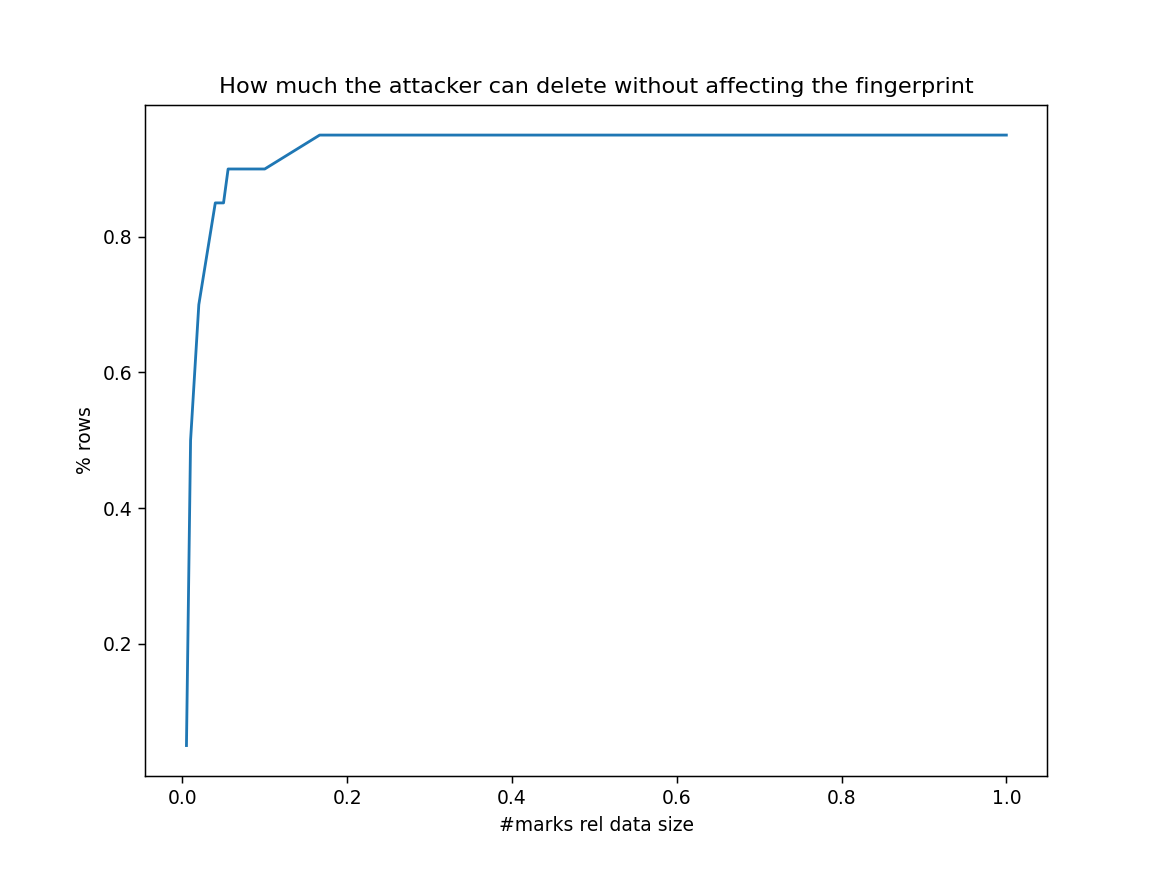

Text(0, 0.5, '% rows')

In [18]:
%matplotlib notebook
file_string = 'inverse_robustness_horizontal_universal_c{}_ag{}_e{}.pickle'.format(format(confidence_rate,".2f")[-2:], 
                                                                                   format(attack_granularity,".2f")[-2:], 
                                                                                   n_experiments)
with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
    resutls = pickle.load(infile)

plt.plot([1.0/g for g in resutls.keys()], [1 - inv_robustness for inv_robustness in resutls.values()])
plt.title('How much the attacker can delete without affecting the fingerprint')
plt.xlabel('#marks rel data size') 
plt.ylabel('% rows')

## 2. Attack utility decrease

In [19]:
results = {}
attack_granularity = 0.05
n_folds = 5
file_string = 'attack_utility_horizontal_universal_knn_{}_ag{}_nf{}.pickle'.format(target, 
                                                                               format(attack_granularity,".2f")[-2:], 
                                                                                   n_folds)
# check if results exist
# ---------------------- #
if not os.path.isfile('parameter_guidelines/evaluation/adult/'+file_string):
    # returns estimated utility drop for each attack strength
    attack_utility_knn = attack_utility_knn(Adult().preprocessed(), target, attack, attack_granularity=attack_granularity, 
                                            n_folds=n_folds)


    with open('parameter_guidelines/evaluation/adult/'+file_string, 'wb') as outfile:
        pickle.dump(attack_utility_knn, outfile)
else:
    print('Results already exist. Not taking any action.')
# ---------------------- #

Results already exist. Not taking any action.


In [20]:
file_string = 'attack_utility_horizontal_universal_knn_{}_ag{}_nf{}.pickle'.format(target, 
                                                                               format(attack_granularity,".2f")[-2:], 
                                                                                   n_folds)
with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
    attack_utility_knn = pickle.load(infile)
attack_utility_knn = dict(sorted(attack_utility_knn.items()))

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


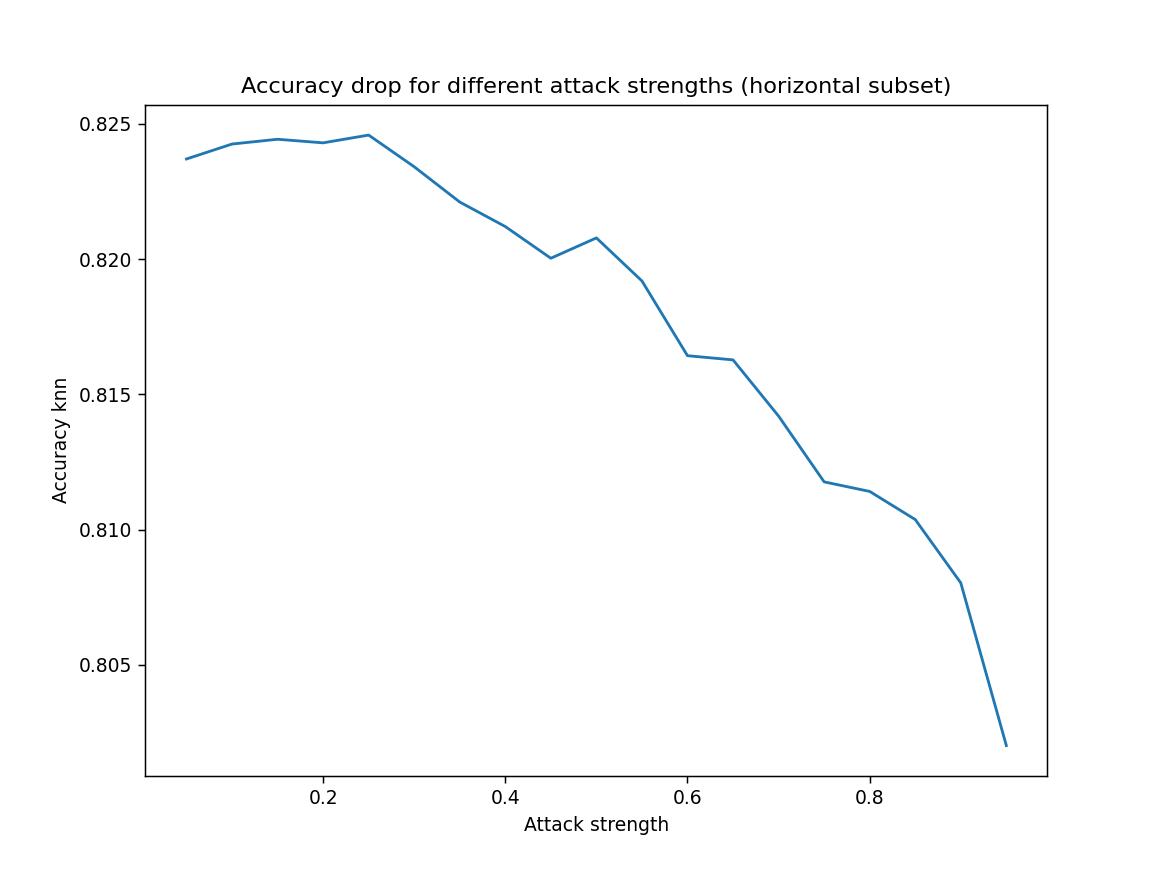

Text(0.5, 1.0, 'Accuracy drop for different attack strengths (horizontal subset)')

In [21]:
%matplotlib
plt.plot(attack_utility_knn.keys(), [np.mean(acc) for acc in attack_utility_knn.values()])
plt.xlabel('Attack strength')
plt.ylabel('Accuracy knn')
plt.title('Accuracy drop for different attack strengths (horizontal subset)')

In [16]:
# original accuracy
file_string = 'utility_knn_{}_nf{}.pickle'.format(target, n_folds)
if not os.path.isfile('parameter_guidelines/evaluation/adult/'+file_string):
    # from how much remaining data can the fingerprint still be extracted?
    original_utility_knn = original_utility_knn(Adult().preprocessed(), target, n_folds=n_folds)

    with open('parameter_guidelines/evaluation/adult/'+file_string, 'wb') as outfile:
        pickle.dump(original_utility_knn, outfile)
else:
    print('Results for KNN already exist. Not taking any action.')
    
file_string = 'utility_dt_{}_nf{}.pickle'.format(target, n_folds)
if not os.path.isfile('parameter_guidelines/evaluation/adult/'+file_string):
    # from how much remaining data can the fingerprint still be extracted?
    original_utility_DT = original_utility_dt(Adult().preprocessed(), target, n_folds=n_folds)

    with open('parameter_guidelines/evaluation/adult/'+file_string, 'wb') as outfile:
        pickle.dump(original_utility_dt, outfile)
else:
    print('Results for Decision Tree already exist. Not taking any action.')
    
file_string = 'utility_gb_{}_nf{}.pickle'.format(target, n_folds)
if not os.path.isfile('parameter_guidelines/evaluation/adult/'+file_string):
    # from how much remaining data can the fingerprint still be extracted?
    original_utility_gb = original_utility_gb(Adult().preprocessed(), target, n_folds=n_folds)

    with open('parameter_guidelines/evaluation/adult/'+file_string, 'wb') as outfile:
        pickle.dump(original_utility_gb, outfile)
else:
    print('Results for Gradient Boosting already exist. Not taking any action.')

Results for KNN already exist. Not taking any action.


TypeError: 'list' object is not callable

In [19]:
file_string = 'utility_knn_{}_nf{}.pickle'.format(target, n_folds)
with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
    original_utility_knn = pickle.load(infile)
file_string = 'utility_dt_{}_nf{}.pickle'.format(target, n_folds)
with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
    original_utility_dt = pickle.load(infile)
file_string = 'utility_gb_{}_nf{}.pickle'.format(target, n_folds)
with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
    original_utility_gb = pickle.load(infile)

In [20]:
#acceptable_utility_drop = 0.01
#utility_preserving_attack_strength = max([strength for strength in attack_utility_knn 
#                                         if np.mean(original_utility_knn)-np.mean(attack_utility_knn[strength])<=acceptable_utility_drop])
# alternative
# attacks that yield at least 1% of accuracy loss
#attacks_1p = max([strength for strength in attack_utility_knn 
#                  if np.mean(original_utility_knn)-np.mean(attack_utility_knn[strength])<=0.01])
# attacks that yield at least 2% of accuracy loss
#attacks_2p = max([strength for strength in attack_utility_knn 
#                                         if np.mean(original_utility_knn)-np.mean(attack_utility_knn[strength])<=0.02])
#
#attacks_3p = max([strength for strength in attack_utility_knn
#                 if np.mean(original_utility_knn)-np.mean(attack_utility_knn[strength])<=0.03])

In [21]:
#max_utility_drop = np.mean(original_utility_knn) - min(np.mean(acc) for acc in attack_utility_knn.values())

In [23]:
# retruns a list [attack_with_1%_loss, attack_with_2%_loss, ... , max_abs_utility_loss]
att_utility_bounds = attack_utility_bounds(original_utility_knn, attack_utility_knn) 

TypeError: unsupported operand type(s) for /: 'function' and 'int'

<IPython.core.display.Javascript object>


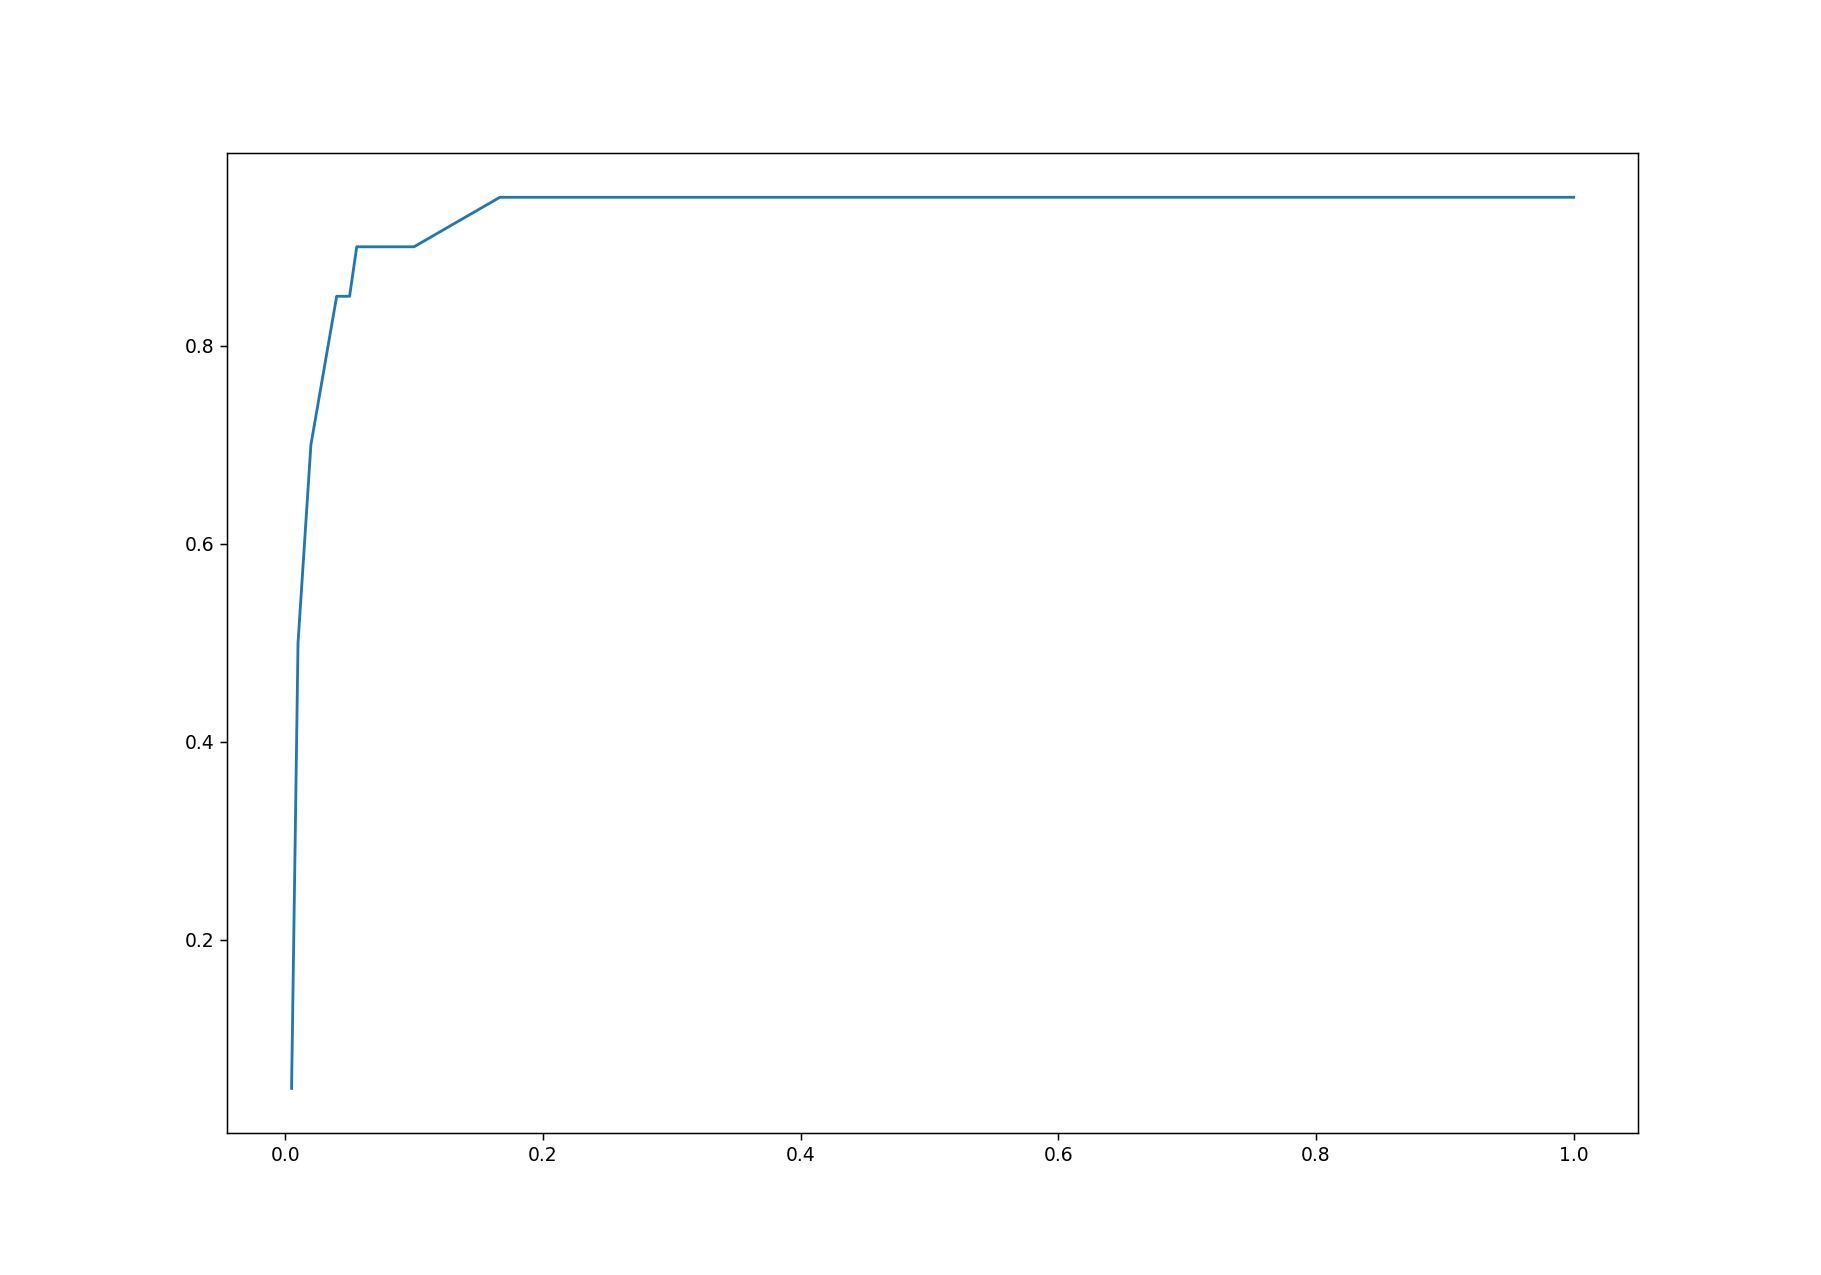

NameError: name 'att_utility_bounds' is not defined

In [22]:
%matplotlib notebook
with open('parameter_guidelines/evaluation/adult/inverse_robustness_horizontal_universal_c95_ag05_e100.pickle', 'rb') as infile:
    resutls = pickle.load(infile)
fig, ax = plt.subplots(figsize=(10, 7))

lines = []
fill = []

lines.append(ax.plot([1.0/g for g in resutls.keys()], [1 - inv_robustness for inv_robustness in resutls.values()], label='robustness'))
lines.append(ax.plot([1.0/g for g in resutls.keys()], [att_utility_bounds[0] for x in resutls], label='1% drop in accuracy'))
fill.append(ax.fill_between([1.0/g for g in resutls.keys()], [att_utility_bounds[0] for x in resutls], 1.0, color='green', alpha=0.1))
lines.append(ax.plot([1.0/g for g in resutls.keys()], [att_utility_bounds[1] for x in resutls], label='2% drop in accuracy'))
fill.append(ax.fill_between([1.0/g for g in resutls.keys()], [att_utility_bounds[1] for x in resutls], 1.0, color='green', alpha=0.15))

plt.title('How much the attacker can delete without affecting the fingerprint (via horizontal subset attack and KNN accuracy)')
plt.xlabel('#marks rel data size') 
plt.ylabel('Robustness (% rows deleted)')

legend = plt.legend()
line_legends = legend.get_lines()
for line in line_legends:
    line.set_picker(True)
    line.set_pickradius(10)
graphs = {}
graphs[line_legends[0]] = [lines[0][0]]
graphs[line_legends[1]] = [lines[1][0], fill[0]]
graphs[line_legends[2]] = [lines[2][0], fill[1]]
   
def on_pick(event):
    legend = event.artist
    isVisible = legend.get_visible()
    for element in graphs[legend]:
        element.set_visible(not isVisible)
    legend.set_visible(not isVisible)
    fig.canvas.draw()
    
plt.connect('pick_event', on_pick)
plt.show()

## 3. Utility after fingerprinting

### 3.1. KNN 

In [ ]:
#gammae = [1, 3, 6, 12, 25, 50, 100]
fp_utility_results = {}
n_folds = 5
n_experiments = 10

file_string = 'utility_universal_knn_{}_nf{}_e{}.pickle'.format(target, n_folds, n_experiments)

# check if results exist
# ---------------------- #
if os.path.isfile('parameter_guidelines/evaluation/adult/'+file_string):
    with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
            fp_utility_results = pickle.load(infile)
gammae_new = []
for gamma in gammae:
    if gamma not in fp_utility_results.keys():
        gammae_new.append(gamma)
# ---------------------- #        
# update results
for gamma in gammae_new:
    fp_utility_knn = fingerprint_utility_knn(Adult(), target, gamma, n_folds=n_folds, n_experiments=n_experiments) 
    # [cv_acc_1, cv_acc_2, ..., cv_acc_n_exp]
    fp_utility_results[gamma] = fp_utility_knn
    
fp_utility_results =  dict(sorted(fp_utility_results.items()))
with open('parameter_guidelines/evaluation/adult/'+file_string, 'wb') as outfile:
        pickle.dump(fp_utility_results, outfile)

In [ ]:
%matplotlib
file_string = 'utility_universal_knn_{}_nf{}_e{}.pickle'.format(target, n_folds, n_experiments)
with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
        fp_utility_results = pickle.load(infile)
        
x_axis = [1.0/g for g in fp_utility_results.keys()]
y_axis = [np.mean([np.mean(cv_res) for cv_res in fp_utility_results[gamma]]) for gamma in fp_utility_results.keys()]
plt.plot(x_axis, y_axis, label='utility after fingerprint')
plt.title('Utility of fingerprinted data')
plt.xlabel('#marks rel data size')
plt.ylabel('Accuracy knn')

### 3.2. Decision Tree

In [ ]:
#gammae = [1, 2, 3, 4, 6, 12, 25, 50, 100]
fp_utility_results_DT = {}
n_folds = 5
n_experiments = 10

file_string = 'utility_universal_dt_{}_nf{}_e{}.pickle'.format(target, n_folds, n_experiments)

# check if results exist
# ---------------------- #
if os.path.isfile('parameter_guidelines/evaluation/adult/'+file_string):
    with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
            fp_utility_results_DT = pickle.load(infile)
    print('Results already exist for gammae: ' + str(fp_utility_results_DT.keys()))
gammae_new = []
for gamma in gammae:
    if gamma not in fp_utility_results_DT.keys():
        gammae_new.append(gamma)
# ---------------------- #        
# update results
for gamma in gammae_new:
    print('Updating results for gamma='+str(gamma))
    fp_utility_dt = fingerprint_utility_dt(Adult(), target, gamma, n_folds=n_folds, n_experiments=n_experiments) 
    # [cv_acc_1, cv_acc_2, ..., cv_acc_n_exp]
    fp_utility_results_DT[gamma] = fp_utility_dt
    
fp_utility_results_DT =  dict(sorted(fp_utility_results_DT.items()))
with open('parameter_guidelines/evaluation/adult/'+file_string, 'wb') as outfile:
        pickle.dump(fp_utility_results_DT, outfile)

In [ ]:
%matplotlib notebook
file_string = 'utility_universal_dt_{}_nf{}_e{}.pickle'.format(target, n_folds, n_experiments)
with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
        fp_utility_results_DT = pickle.load(infile)
        
x_axis = [1.0/g for g in fp_utility_results_DT.keys()]
y_axis = [np.mean([np.mean(cv_res) for cv_res in fp_utility_results_DT[gamma]]) for gamma in fp_utility_results_DT.keys()]
plt.plot(x_axis, y_axis, label='utility after fingerprint')
plt.title('Utility of fingerprinted data')
plt.xlabel('#marks rel data size')
plt.ylabel('Accuracy knn')
plt.show()

### 3.3 Gradient Boosting

In [ ]:
#gammae = [1, 2, 3, 4, 6, 12, 25, 50, 100]
fp_utility_results_GB = {}
n_folds = 5
n_experiments = 10

file_string = 'utility_universal_gb_{}_nf{}_e{}.pickle'.format(target, n_folds, n_experiments)

# check if results exist
# ---------------------- #
if os.path.isfile('parameter_guidelines/evaluation/adult/'+file_string):
    with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
            fp_utility_results_GB = pickle.load(infile)
    print('Results already exist for gammae: ' + str(fp_utility_results_GB.keys()))
gammae_new = []
for gamma in gammae:
    if gamma not in fp_utility_results_GB.keys():
        gammae_new.append(gamma)
# ---------------------- #        
# update results
for gamma in gammae_new:
    print('Updating results for gamma='+str(gamma))
    fp_utility_gb = fingerprint_utility_gb(Adult(), target, gamma, n_folds=n_folds, n_experiments=n_experiments) 
    # [cv_acc_1, cv_acc_2, ..., cv_acc_n_exp]
    fp_utility_results_GB[gamma] = fp_utility_gb
    
fp_utility_results_GB =  dict(sorted(fp_utility_results_GB.items()))
with open('parameter_guidelines/evaluation/adult/'+file_string, 'wb') as outfile:
        pickle.dump(fp_utility_results_GB, outfile)

In [ ]:
%matplotlib notebook
file_string = 'utility_universal_gb_{}_nf{}_e{}.pickle'.format(target, n_folds, n_experiments)
with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
        fp_utility_results_GB = pickle.load(infile)
        
x_axis = [1.0/g for g in fp_utility_results_GB.keys()]
y_axis = [np.mean([np.mean(cv_res) for cv_res in fp_utility_results_GB[gamma]]) for gamma in fp_utility_results_GB.keys()]
plt.plot(x_axis, y_axis, label='utility after fingerprint')
plt.title('Utility of fingerprinted data')
plt.xlabel('#marks rel data size')
plt.ylabel('Accuracy knn')
plt.show()

## COMBINED RESULTS

In [36]:
with open('parameter_guidelines/evaluation/adult/inverse_robustness_horizontal_universal_c95_ag05_e100.pickle', 'rb') as infile:
    resutls = pickle.load(infile)

In [37]:
# interceptions
x_intercept_0 = 1.0/(max([x for x in resutls if 1-resutls[x]>=att_utility_bounds[0]]))
x_intercept_1 = 1.0/(max([x for x in resutls if 1-resutls[x]>=att_utility_bounds[1]]))

In [ ]:
# incorporate in the full analysis
%matplotlib notebook
fig, ax = plt.subplots(2, sharex=True, figsize=(10, 7))  # sharey=True

lines = []
fill = []
helpers = []

x_axis = [1.0 / g for g in gammae]

# ---------------------------- #
# robustness
# ---------------------------- #
y_robustness = [1 - inv_robustness for inv_robustness in resutls.values()]
lines.append(ax[0].plot(x_axis, y_robustness, label='robustness'))

# --------------------------- #
# utility (start)
# --------------------------- #
y_utility = [np.mean([np.mean(cv_res) for cv_res in fp_utility_results[g]])
             for g in fp_utility_results.keys()] + [np.mean(original_utility_knn)]
y_utility_DT = [np.mean([np.mean(cv_res) for cv_res in fp_utility_results_DT[g]])
                for g in fp_utility_results_DT.keys()] + [np.mean(original_utility_dt)]
y_utility_GB = [np.mean([np.mean(cv_res) for cv_res in fp_utility_results_GB[g]])
                for g in fp_utility_results_GB.keys()] + [np.mean(original_utility_gb)]
y_utility_all = y_utility + y_utility_DT + y_utility_GB

# --------------------------- #
# attack utility
# --------------------------- #
lw = 0.8

lines.append(ax[0].plot(x_axis, [att_utility_bounds[0] for x in resutls], label='1% drop in accuracy', linewidth=lw,
                        color='#a2d180'))
fill.append(ax[0].fill_between(x_axis, [att_utility_bounds[0] for x in resutls], 1.0, color='#e1ffcc'))
helpers.append(ax[0].vlines(x=x_intercept_0, ymin=min(y_robustness), ymax=att_utility_bounds[0], linewidth=lw,
                            linestyles='dashed'))
helpers.append(
    ax[1].vlines(x=x_intercept_0, ymin=min(y_utility_all), ymax=max(y_utility_all), linewidth=lw,
                 linestyles='dashed', color='#a2d180'))
fill.append(ax[1].fill_between([x for x in x_axis if x >= x_intercept_0], min(y_utility_all),
                               max(y_utility_all),
                               color='#e1ffcc'))

lines.append(ax[0].plot(x_axis, [att_utility_bounds[1] for x in resutls], label='2% drop in accuracy', linewidth=lw,
                        color='green'))
fill.append(ax[0].fill_between(x_axis, [att_utility_bounds[1] for x in resutls], 1.0, color='#c3e3ac'))
helpers.append(ax[0].vlines(x=x_intercept_1, ymin=min(y_robustness), ymax=att_utility_bounds[1], linewidth=lw,
                            linestyles='dashed'))
helpers.append(
    ax[1].vlines(x=x_intercept_1, ymin=min(y_utility_all), ymax=max(y_utility_all), linewidth=lw,
                 linestyles='dashed', color='green'))
fill.append(ax[1].fill_between([x for x in x_axis if x >= x_intercept_1], min(y_utility_all),
                               max(y_utility_all),
                               color='#c3e3ac'))

# todo: mark on the first subplot (ax[0]) when the utility gets way too low; eg. -1%, -2% etc

# ---------------------------- #
# utility
# ---------------------------- #
# KNN
lines.append(ax[1].plot(x_axis + [0.0], y_utility, label='KNN after fp'))
# Decision Tree
lines.append(ax[1].plot(x_axis + [0.0], y_utility_DT, label='Decision tree after fp'))
# Gradient Boosting
lines.append(ax[1].plot(x_axis + [0.0] , y_utility_GB, label='Gradient boosting after fp'))
ax[1].set_ylabel('Accuracy')


# relative delta utility
rel_delta_utility_knn = [ut_fp - np.mean(original_utility_knn) for ut_fp in y_utility]
rel_delta_utility_dt = [ut_fp - np.mean(original_utility_dt) for ut_fp in y_utility_DT]
# ---------------------------- #

fig.suptitle(
    'How much the attacker can delete without affecting the fingerprint (via horizontal subset attack and KNN' +
    'accuracy)', size=10)
plt.xlabel('#marks rel data size')
ax[0].set_ylabel('Robustness (% rows deleted)')

plt.rcParams['axes.grid'] = True

legend = fig.legend()
line_legends = legend.get_lines()
for line in line_legends:
    line.set_picker(True)
    line.set_pickradius(10)
graphs = {}
graphs[line_legends[0]] = [lines[0][0]]  # -> robustness
graphs[line_legends[1]] = [lines[1][0], fill[0], helpers[0], fill[1], helpers[1]]  # -> attack utility
graphs[line_legends[2]] = [lines[2][0], fill[2], helpers[2], fill[3], helpers[3]]
graphs[line_legends[3]] = [lines[3][0]]  # -> utility
graphs[line_legends[4]] = [lines[4][0]]
graphs[line_legends[5]] = [lines[5][0]]

def on_pick(event):
    legend = event.artist
    isVisible = legend.get_visible()
    for element in graphs[legend]:
        element.set_visible(not isVisible)
    legend.set_visible(not isVisible)
    fig.canvas.draw()

plt.connect('pick_event', on_pick)
plt.show()

Robustness plot (above):
- in the dark green area, the utility of the attacker's data is expected to drop at least 2% for the observed attacks, in addition to the increased robustness for that area. This helps determining the lower boundary on what is considered a robust scheme. Therefore, on the one hand, while choosing the number of marks (x axis), the user can say "if the attacker needs to modify at least 50% of data (i.e. robustness=50%), the scheme is robust", or on the other hand "if the attacker loses more than 2% of accuracy by modifying the data, the scheme is considered robust", or a combination of both. 
- the light green area represents where the utility is expected to drop at least 1% due to the attack strength

Utility plot (below):
- the dark and light green areas are transposed to help find the lower boundary of number of marks that the user wants to chose
- users wants to choose the #marks (x axis) with the highest accuracy
- the idea for the alternative plot regarding utility might be to plot relative delta accuracy (real_acc-original_acc)/original_acc -> for each classifier and cumulative